# Analisis Exploratorio

A continuación se analizaran los datos otorgados por la empresa Navent para poder sacar algunas conclusiones

## 1) Ordenar los datos

Lo que haremos en el siguiente apartado es verificar los datos y asi mismo ordenarlos para facilitar su posterior analisis

In [6]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

%matplotlib inline
plt.style.use('default')
sns.set(style="whitegrid")

In [2]:
#Cargamos los datos en dataframes
educacion=pd.read_csv('../Data/fiuba_1_postulantes_educacion.csv')
genero_edad=pd.read_csv('../Data/fiuba_2_postulantes_genero_y_edad.csv')
vistas=pd.read_csv('../Data/fiuba_3_vistas.csv')
postulaciones=pd.read_csv('../Data/fiuba_4_postulaciones.csv')
avisos_online=pd.read_csv('../Data/fiuba_5_avisos_online.csv')
avisos_detalle=pd.read_csv('../Data/fiuba_6_avisos_detalle.csv')

In [3]:
#Verificamos si hay algún elemento nulo
#En el primer archivo no hay elementos nulos
educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


In [4]:
#En 'fechanacimiento' hay elementos nulos
genero_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [5]:
#En vistas no hay elementos nulos
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


In [6]:
#En postulaciones no hay elementos nulos
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB


In [7]:
#En este archivo no hay elementos nulos
avisos_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 1 columns):
idaviso    5028 non-null int64
dtypes: int64(1)
memory usage: 39.4 KB


In [8]:
#Hay elementos nulos en 'ciudad' , 'mapacalle' y 'denominacion_empresa'
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [3]:
#Cambiamos los nombres de las columnas para que sea más sencillo identificarlas
educacion.rename(columns={'nombre':'Nivel','estado':'Estado'},inplace=True)
genero_edad.rename(columns={'fechanacimiento':'Fecha_Nacimiento','sexo':'Sexo'},inplace=True)
vistas.rename(columns={'idAviso':'idaviso'},inplace=True)
postulaciones.rename(columns={'fechapostulacion':'Fecha_Postulacion'},inplace=True)
avisos_detalle.rename(columns={'titulo':'Titulo','descripcion':'Descripcion','nombre_zona':'Zona','ciudad':'Ciudad','tipo_de_trabajo':'Tipo_de_Trabajo','nivel_laboral':'Nivel_Laboral','nombre_area':'Nombre_Area'},inplace=True)

In [4]:
#Realizamos la convesion de las fechas
postulaciones['Fecha_Postulacion']=pd.to_datetime(postulaciones['Fecha_Postulacion'])
vistas['timestamp']=pd.to_datetime(vistas['timestamp'])
genero_edad['Fecha_Nacimiento'] = pd.to_datetime(genero_edad['Fecha_Nacimiento'],errors='coerce')

## 2) Áreas de Trabajo

En el siguiente apartado analizaremos las postulaciones principales y su relación con las visitas, principalmente por genero y la edad promedio de las postulaciones por area de trabajo. Tomaremos cuales son las áreas con más postulaciones y todas las operaciones posteriores se realizaran en relacion a las mismas

### 2.1) Áreas de trabajo con más avisos

Text(0,0.5,'Areas de Trabajo')

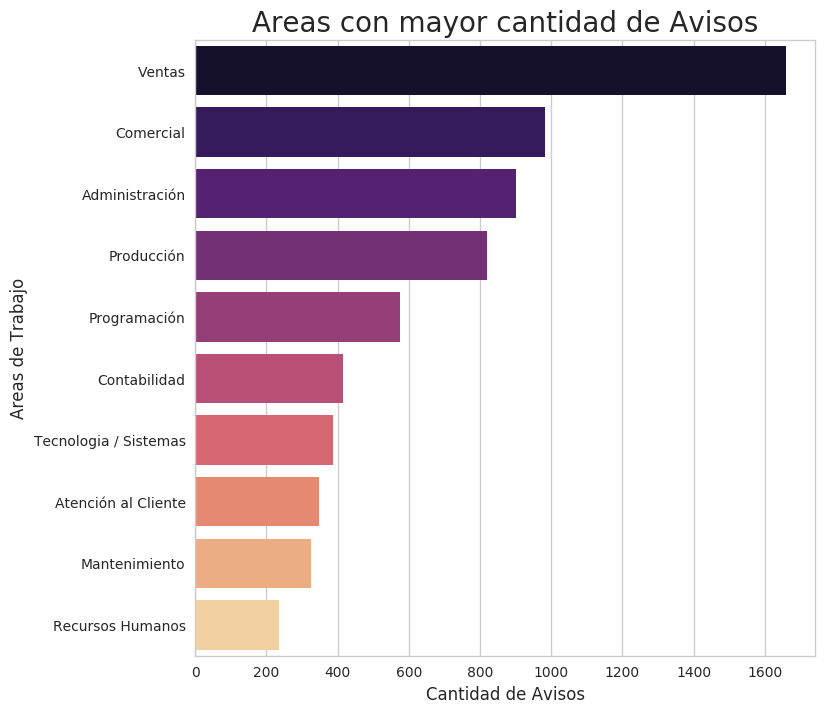

In [7]:
#Calculamos cuales son las areas de trabajo con mayor cantidad de avisos publicados
nombre_area=avisos_detalle[['idaviso','Nombre_Area']]
top_avisos=nombre_area['Nombre_Area'].value_counts().head(10)
plt.subplots(figsize=(8,8))
grafico_top_avisos=sns.barplot(x=top_avisos.values,y=top_avisos.index,orient='h',palette="magma")
grafico_top_avisos.set_title("Areas con mayor cantidad de Avisos",fontsize=20)
grafico_top_avisos.set_xlabel("Cantidad de Avisos",fontsize=12)
grafico_top_avisos.set_ylabel("Areas de Trabajo",fontsize=12)

Se puede ver con mucha claridad que el área de trabajo con mayor cantidad de avisos es la de Ventas y también se observa que hay una importante diferencia con la segunda, que en este caso es Comercial, luego de la misma no parece haber tanta diferencia entre las cantidad de avisos

### 2.2) Áreas de trabajo con más postulaciones

Text(0,0.5,'Areas de Trabajo')

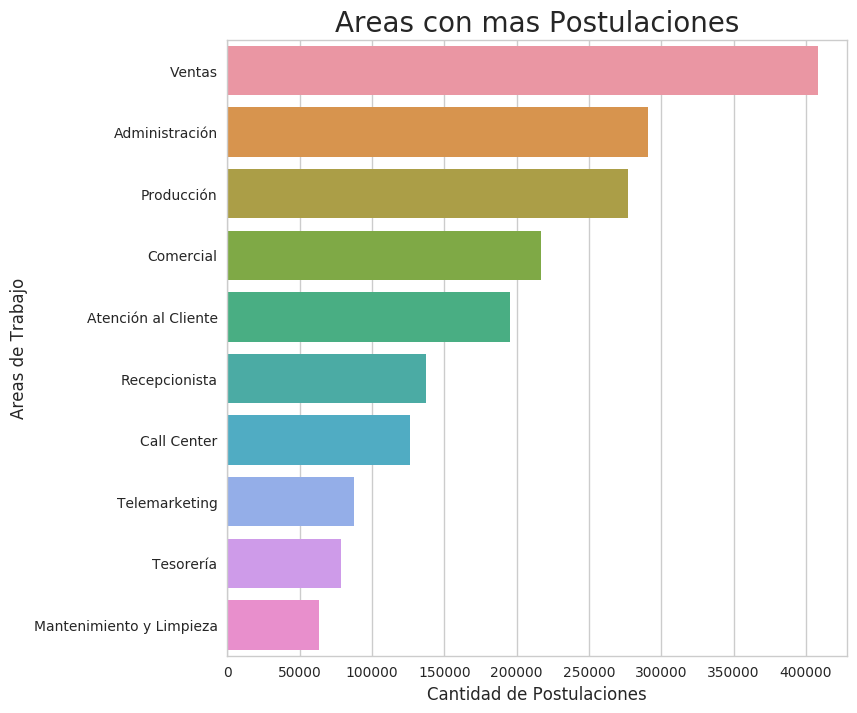

In [8]:
postulaciones_area=pd.merge(postulaciones,nombre_area,on='idaviso',how='inner')
vistas_area=pd.merge(vistas,nombre_area,on='idaviso',how='inner')
top_postulaciones=postulaciones_area['Nombre_Area'].value_counts().head(10)
plt.subplots(figsize=(8,8))
grafico_top_postulaciones=sns.barplot(x=top_postulaciones.values,y=top_postulaciones.index,orient='h')
grafico_top_postulaciones.set_title("Areas con mas Postulaciones",fontsize=20)
grafico_top_postulaciones.set_xlabel("Cantidad de Postulaciones",fontsize=12)
grafico_top_postulaciones.set_ylabel("Areas de Trabajo",fontsize=12)

Se puede observar que siguiente con la tendencia de la cantidad de avisos, Ventas es el área que presenta mayor cantidad de postulaciones y sigue liderando con una amplia diferencia pero donde difiere es en las categorias siguientes ya que en segundo lugar esta Administación, cuando en la tabla de avisos se encuentra en tercera posición y, Comercial que se encontraba segunda en la primera tabla, ahora se encuentra en cuarto lugar. La diferencia se observa a partir del cuarto lugar para abajo, ya que no se repite ninguna de las que categorias que se encuentran en la primera figura por lo que se puede concluir que, si bien en las principales categorias hay una tendencia de que si hay más avisos hay más postulaciones, luego eso deja de ser verdad.

### 2.3) Comparación entre principales Areas de Trabajo en cuanto las Postulaciones y Visitas

In [9]:
df_post=top_postulaciones.reset_index()
df_top_post=df_post[['index']]
df_top_post.rename(columns={'index':'Nombre_Area'},inplace=True)
comp_post_vis=top_postulaciones.reset_index()
comp_post_vis.rename(columns={'index':'Nombre_Area','Nombre_Area':'Postulaciones'},inplace=True)
top_vistas=vistas_area['Nombre_Area'].value_counts().head(10)
df_top_vistas=top_vistas.reset_index()
comp_post_vis['Vistas']=df_top_vistas['Nombre_Area']
comp_post_vis

/home/sergio/.local/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Nombre_Area  Postulaciones  Vistas
0                    Ventas         408148  128025
1            Administración         291135  102812
2                Producción         277089   64485
3                 Comercial         216677   58885
4       Atención al Cliente         195636   49203
5             Recepcionista         137485   48756
6               Call Center         126430   33344
7             Telemarketing          87506   25258
8                 Tesorería          78450   23682
9  Mantenimiento y Limpieza          63308   23499

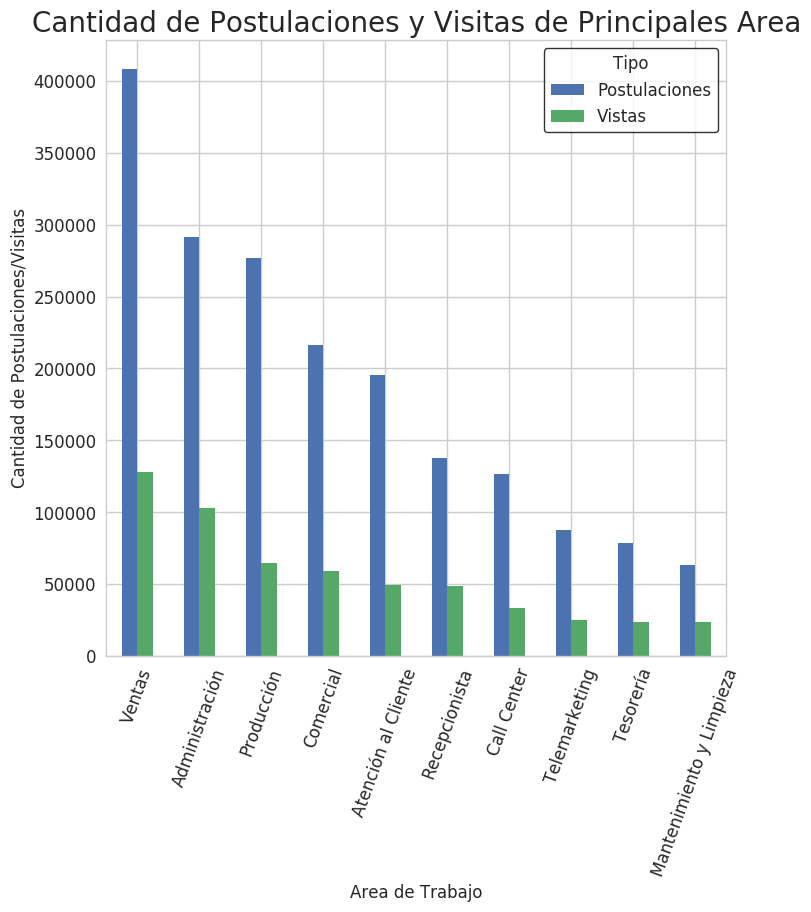

In [20]:
grafico_comp_post_vista=comp_post_vis.plot(kind='bar',x='Nombre_Area',fontsize=12,figsize=(8,8),rot=70)
grafico_comp_post_vista.set_title("Cantidad de Postulaciones y Visitas de Principales Area",fontsize=20)
grafico_comp_post_vista.set_xlabel("Area de Trabajo",fontsize=12)
grafico_comp_post_vista.set_ylabel("Cantidad de Postulaciones/Visitas",fontsize=12)
leyenda=plt.legend(['Postulaciones','Vistas'],fontsize=12,title='Tipo',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

Se puede ver que no hay mucha diferencia entre las principales áreas que se postulan con las principales en las que se visitan, lo que si se puede ver a simple vista es que la diferencia entre las vistas de las primeras categorias no hay tanta diferencia como la hay en la cantidad de postulaciones y a su vez, en las siguientes categorias tampoco hay tanta diferencia pero lo que si se puede confirmar, es que las principales categorias en las que se suele postular son las mismas en las cuales se visitan

### 2.4) Postulaciones y Vistas por género

### 2.4.A) Por Postulaciones

En el siguiente apartado analizaremos cuales son las áreas principales en las que se postulan los hombres y las mujeres y si hay alguna diferencia entre el género. ACLARACIÓN: Se descartaron los géneros que figuran como "NO_DECLARA" ya que no tienen incidencia en el siguiente apartado

In [10]:
genero=genero_edad[['idpostulante','Sexo']]
genero_femenino=genero[(genero_edad['Sexo']=='FEM')]
genero_masculino=genero[(genero_edad['Sexo']=='MASC')]

In [11]:
#Agregamos a las postulaciones y a las vistas el género del usuario
postulantes_femenino=pd.merge(postulaciones_area,genero_femenino,on='idpostulante',how='inner')
postulantes_masculino=pd.merge(postulaciones_area,genero_masculino,on='idpostulante',how='inner')
vistas_femenino=pd.merge(vistas_area,genero_femenino,on='idpostulante',how='inner')
vistas_masculino=pd.merge(vistas_area,genero_masculino,on='idpostulante',how='inner')

In [12]:
#Filtramos en postulaciones y vistas por genero, las áreas de trabajo más importantes
top_post_fem=pd.merge(df_top_post,postulantes_femenino,on='Nombre_Area',how='inner')
top_post_masc=pd.merge(df_top_post,postulantes_masculino,on='Nombre_Area',how='inner')
top_vistas_fem=pd.merge(df_top_post,vistas_femenino,on='Nombre_Area',how='inner')
top_vistas_masc=pd.merge(df_top_post,vistas_masculino,on='Nombre_Area',how='inner')

In [13]:
#Vemos la cantidad de postulaciones por genero que hay en las áreas más importantes
post_genero=top_post_masc.groupby(['Nombre_Area']).agg({'idpostulante':'count'})
post_fem=top_post_fem.groupby(['Nombre_Area']).agg({'idpostulante':'count'})
post_genero['Femenino']=post_fem['idpostulante']
post_genero.rename(columns={'idpostulante':'Masculino'},inplace=True)
post_genero

Masculino  Femenino
Nombre_Area                                  
Administración               118377    170082
Atención al Cliente           72786    120674
Call Center                   40505     84383
Comercial                    102438    111656
Mantenimiento y Limpieza      28649     33092
Producción                   227363     45077
Recepcionista                 10716    125446
Telemarketing                 30455     55845
Tesorería                     30394     47126
Ventas                       172813    229674

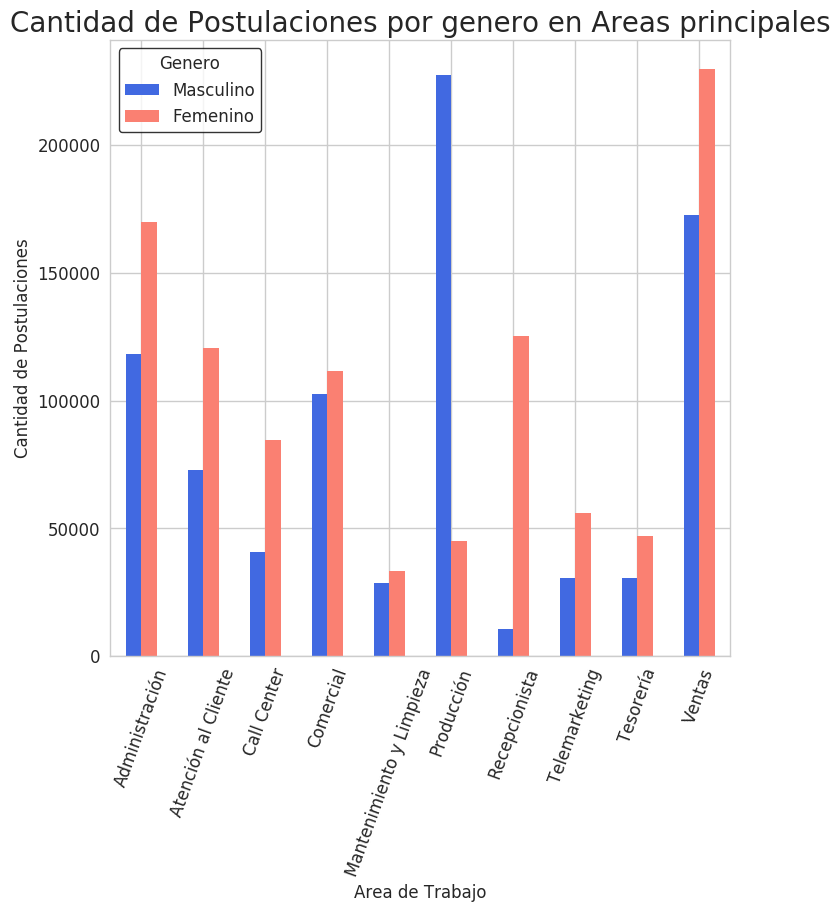

In [19]:
grafico_post_genero=post_genero.plot(kind='bar',color=['royalblue','salmon'],fontsize=12,figsize=(8,8),rot=70)
grafico_post_genero.set_title("Cantidad de Postulaciones por genero en Areas principales",fontsize=20)
grafico_post_genero.set_xlabel("Area de Trabajo",fontsize=12)
grafico_post_genero.set_ylabel("Cantidad de Postulaciones",fontsize=12)
leyenda=plt.legend(['Masculino','Femenino'],fontsize=12,title='Genero',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

Podemos ver que el genero femenino siguen con la tendencia vista hasta ahora, donde más cantidad de postulaciones hay es en el área de Ventas mientras que el masculino donde mas postulaciones hay, y con amplia diferencia, es en Produccion. Luego sigue con lo visto anteriormente, las áreas que le siguen son generalmente las mismas vistas anteriormente

### 2.4.B) Por Vistas

In [20]:
vistas_genero=top_vistas_masc.groupby(['Nombre_Area']).agg({'idpostulante':'count'})
vistas_fem=top_vistas_fem.groupby(['Nombre_Area']).agg({'idpostulante':'count'})
vistas_genero['Femenino']=vistas_fem['idpostulante']
vistas_genero.rename(columns={'idpostulante':'Masculino'},inplace=True)
vistas_genero

Masculino  Femenino
Nombre_Area                                  
Administración                36432     64648
Atención al Cliente           14407     33810
Call Center                    8058     24683
Comercial                     24327     33350
Mantenimiento y Limpieza       8231     14201
Producción                    46822     15071
Recepcionista                  3405     44377
Telemarketing                  6761     17981
Tesorería                      8010     15220
Ventas                        46600     78425

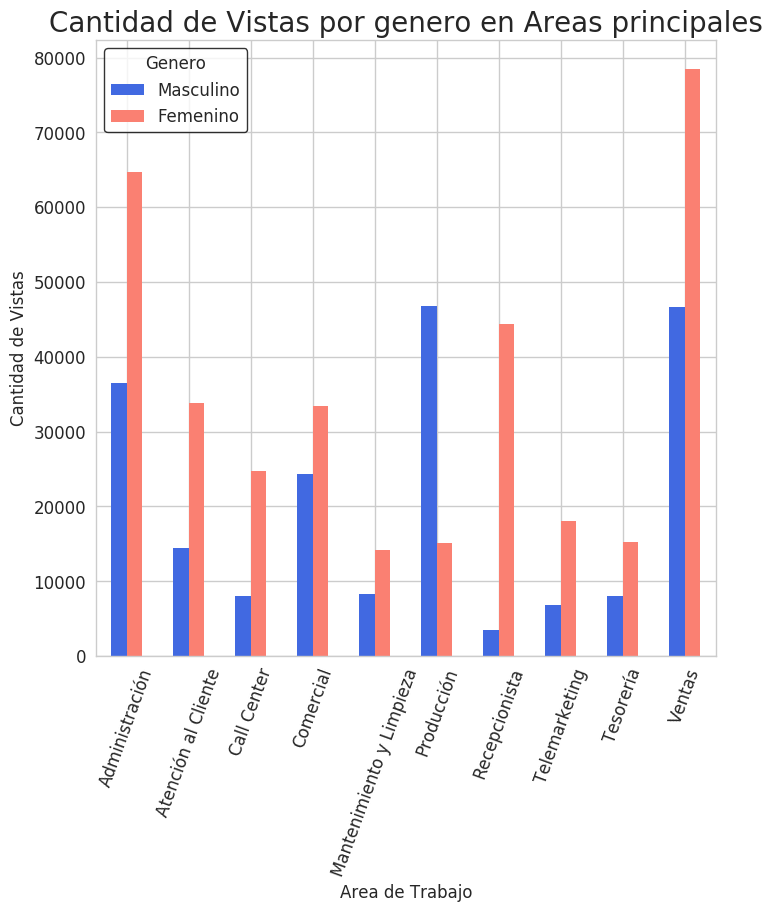

In [21]:
grafico_vistas_genero=vistas_genero.plot(kind='bar',color=['royalblue','salmon'],figsize=(8,8),fontsize=12,rot=70)
grafico_vistas_genero.set_title("Cantidad de Vistas por genero en Areas principales",fontsize=20)
grafico_vistas_genero.set_xlabel("Area de Trabajo",fontsize=12)
grafico_vistas_genero.set_ylabel("Cantidad de Vistas",fontsize=12)
leyenda=plt.legend(['Masculino','Femenino'],fontsize=12,title='Genero',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

A raíz de este grafico se puede observar que no hay tanta diferencia con lo visto en el gráfico anterior de las postulaciones, lo que si se puede ver es que en el caso del genero masculino no hay tanta diferencia entre Producción y Ventas como lo había en la parte de postulaciones.

### 2.5) Postulaciones por Edad

In [11]:
#Primero calculamos la edad de cada postulante
#La fecha actual es la del día 12-4-2018
fechaActual=pd.Timestamp(datetime.datetime.now())
genero_edad['Edad']=(fechaActual - genero_edad['Fecha_Nacimiento']).astype('<m8[Y]')
genero_declarado=genero_edad[(genero_edad['Sexo'] != 'NO_DECLARA')]
genero_declarado_filtrado=genero_declarado[(genero_declarado['Edad']>=18) & (genero_declarado['Edad']<=66)]
edad=genero_declarado_filtrado[['idpostulante','Sexo','Edad']]
postulaciones_edad=pd.merge(postulaciones_area,edad,on='idpostulante',how='inner')
top_postulaciones_edad=pd.merge(postulaciones_edad,df_top_post,on='Nombre_Area',how='inner')
edad_post_general=top_postulaciones_edad.groupby(['Nombre_Area']).agg({'Edad':'mean'})
edad_post_general

Edad
Nombre_Area                        
Administración            29.135463
Atención al Cliente       27.304175
Call Center               27.089231
Comercial                 29.405073
Mantenimiento y Limpieza  29.187366
Producción                29.045074
Recepcionista             27.139787
Telemarketing             26.143532
Tesorería                 28.167414
Ventas                    27.366048

(0, 31)

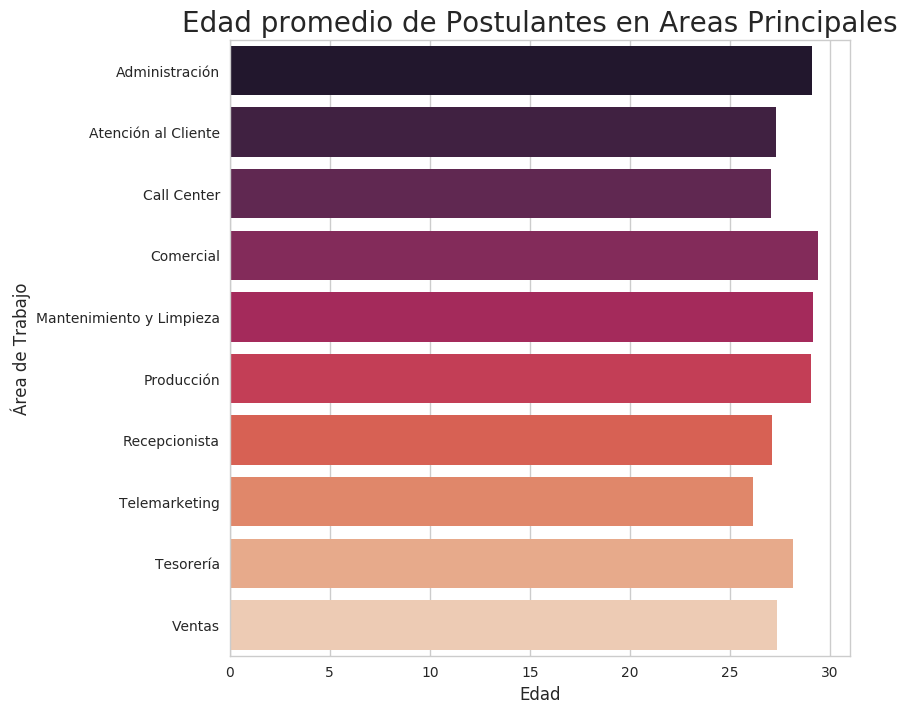

In [15]:
plt.subplots(figsize=(8,8))
grafico_edad_post_general=sns.barplot(y=edad_post_general.index,x=edad_post_general['Edad'],orient='h',palette="rocket")
grafico_edad_post_general.set_title("Edad promedio de Postulantes en Areas Principales",fontsize=20)
grafico_edad_post_general.set_ylabel("Área de Trabajo",fontsize=12)
grafico_edad_post_general.set_xlabel("Edad",fontsize=12)
plt.xlim([0,31])

Analizando en detalle, se puede ver que el promedio de edad más joven lo tiene Telemarketing mientras que el mayor promedio de edad es el de Comercial, a continuación veremos el promedio de edad por género

### 2.5.A) Edad promedio por Áreas principales por género Femenino

In [16]:
top_postulaciones_edad_fem=top_postulaciones_edad[(top_postulaciones_edad['Sexo']=='FEM')]
edad_post_fem=top_postulaciones_edad_fem.groupby(['Nombre_Area']).agg({'Edad':'mean'})
edad_post_fem

Edad
Nombre_Area                        
Administración            28.812544
Atención al Cliente       27.292517
Call Center               27.161037
Comercial                 28.181944
Mantenimiento y Limpieza  29.284297
Producción                28.373545
Recepcionista             27.216709
Telemarketing             26.267382
Tesorería                 27.846926
Ventas                    26.453273

(0, 31)

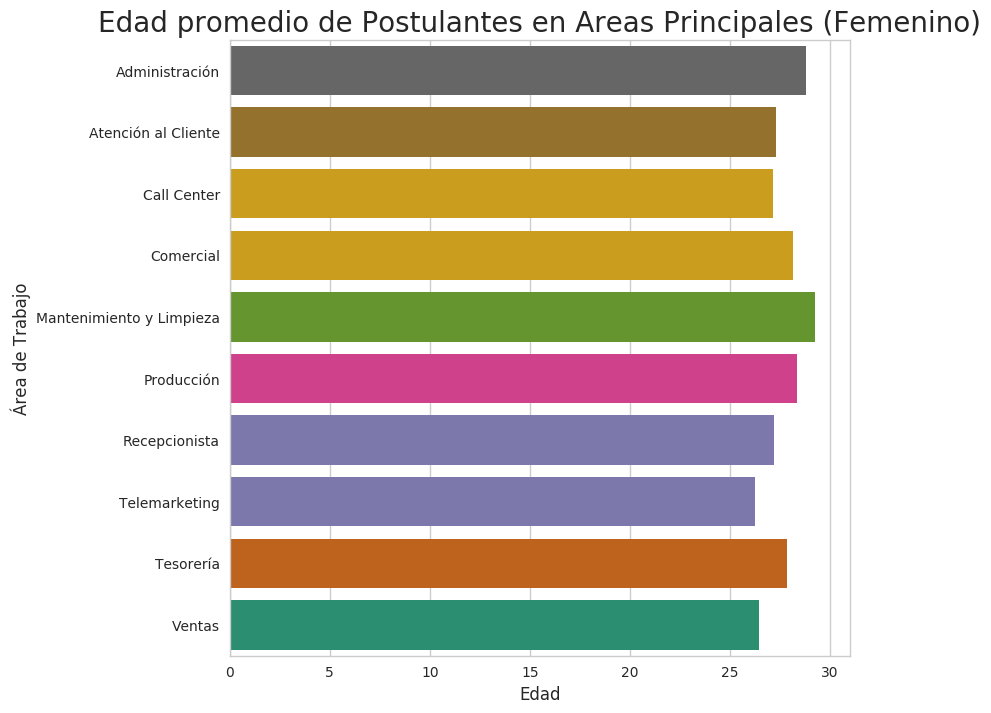

In [17]:
plt.subplots(figsize=(8,8))
grafico_edad_post_fem=sns.barplot(y=edad_post_fem.index,x=edad_post_fem['Edad'],orient='h',palette="Dark2_r")
grafico_edad_post_fem.set_title("Edad promedio de Postulantes en Areas Principales (Femenino)",fontsize=20)
grafico_edad_post_fem.set_xlabel("Edad",fontsize=12)
grafico_edad_post_fem.set_ylabel("Área de Trabajo",fontsize=12)
plt.xlim([0,31])

### 2.5.B) Edad promedio por Áreas principales por género Masculino

In [18]:
top_postulaciones_edad_masc=top_postulaciones_edad[(top_postulaciones_edad['Sexo']=='MASC')]
edad_post_masc=top_postulaciones_edad_masc.groupby(['Nombre_Area']).agg({'Edad':'mean'})
edad_post_masc

Edad
Nombre_Area                        
Administración            29.586742
Atención al Cliente       27.308508
Call Center               26.921815
Comercial                 30.726205
Mantenimiento y Limpieza  29.061586
Producción                29.168935
Recepcionista             26.178177
Telemarketing             25.900389
Tesorería                 28.651986
Ventas                    28.566760

(0, 33)

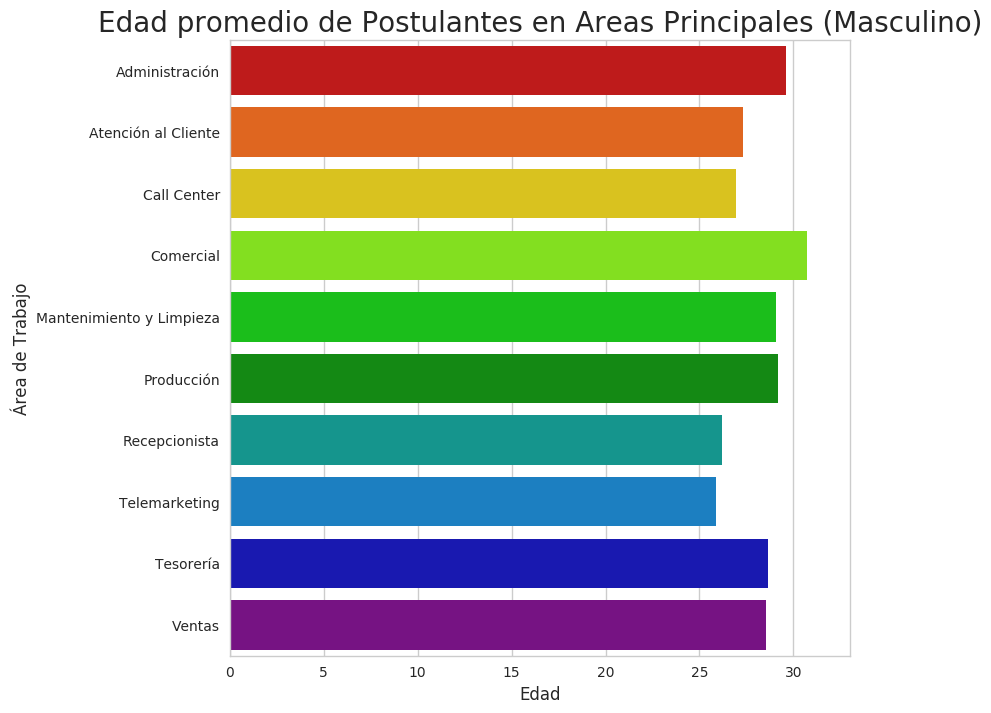

In [19]:
plt.subplots(figsize=(8,8))
grafico_edad_post_masc=sns.barplot(y=edad_post_masc.index,x=edad_post_masc['Edad'],orient='h',palette="nipy_spectral_r")
grafico_edad_post_masc.set_title("Edad promedio de Postulantes en Areas Principales (Masculino)",fontsize=20)
grafico_edad_post_masc.set_xlabel("Edad",fontsize=12)
grafico_edad_post_masc.set_ylabel("Área de Trabajo",fontsize=12)
plt.xlim([0,33])

Se puede observar que el promedio de edad más joven en ambos generos es Telemarketing, luego tambíen que en el sector de Ventas, en el género femenino el promedio suele ser menor que en el masculino, lo mismo sucede en el Comercial, aunque en este último hay una diferencia muy marcada. En conclusión, salvo en Recepcionista, el promedio de edad del género femenino es menor al del masculino.

### 2.6) Postulaciones por Nivel 

### 2.6.A) Postulaciones con estado 'En Curso'

In [14]:
en_curso=educacion[(educacion['Estado']=='En Curso')]
postulaciones_en_curso=pd.merge(postulaciones_area,en_curso,on='idpostulante',how='inner')
top_postulaciones_en_curso=pd.merge(postulaciones_en_curso,df_top_post,on='Nombre_Area',how='inner')
top_postulaciones_en_curso['Valor']=1
nivel_top_postulaciones_en_curso=top_postulaciones_en_curso.pivot_table(index='Nombre_Area',columns='Nivel',values='Valor',aggfunc='count')
nivel_top_postulaciones_en_curso

Nivel                     Doctorado  Master   Otro  Posgrado  Secundario  \
Nombre_Area                                                                
Administración                  196    1676   9782      2614        2167   
Atención al Cliente             111     533   6852       879        2916   
Call Center                      84     289   4072       611        1912   
Comercial                       100    1695   6609      1955        2531   
Mantenimiento y Limpieza         11      62   1347       103        3864   
Producción                       46     804   4735       971       10112   
Recepcionista                    80     215   6401       923        1228   
Telemarketing                    57     197   2589       345        1747   
Tesorería                        30     369   2525       423        1023   
Ventas                          119    1163  11863      1936        8067   

Nivel                     Terciario/Técnico  Universitario  
Nombre_Area                                                 
Administración                        29845         117664  
Atención al Cliente                   21592          67522  
Call Center                           13590          47522  
Comercial                             19108          68133  
Mantenimiento y Limpieza               3319           5858  
Producción                            11196          23644  
Recepcionista                         16713          51500  
Telemarketing                          8976          31405  
Tesorería                              7188          27622  
Ventas                                37627         106867

[Text(0.5,0,'Doctorado'),
 Text(1.5,0,'Master'),
 Text(2.5,0,'Otro'),
 Text(3.5,0,'Posgrado'),
 Text(4.5,0,'Secundario'),
 Text(5.5,0,'Terciario/Técnico'),
 Text(6.5,0,'Universitario')]

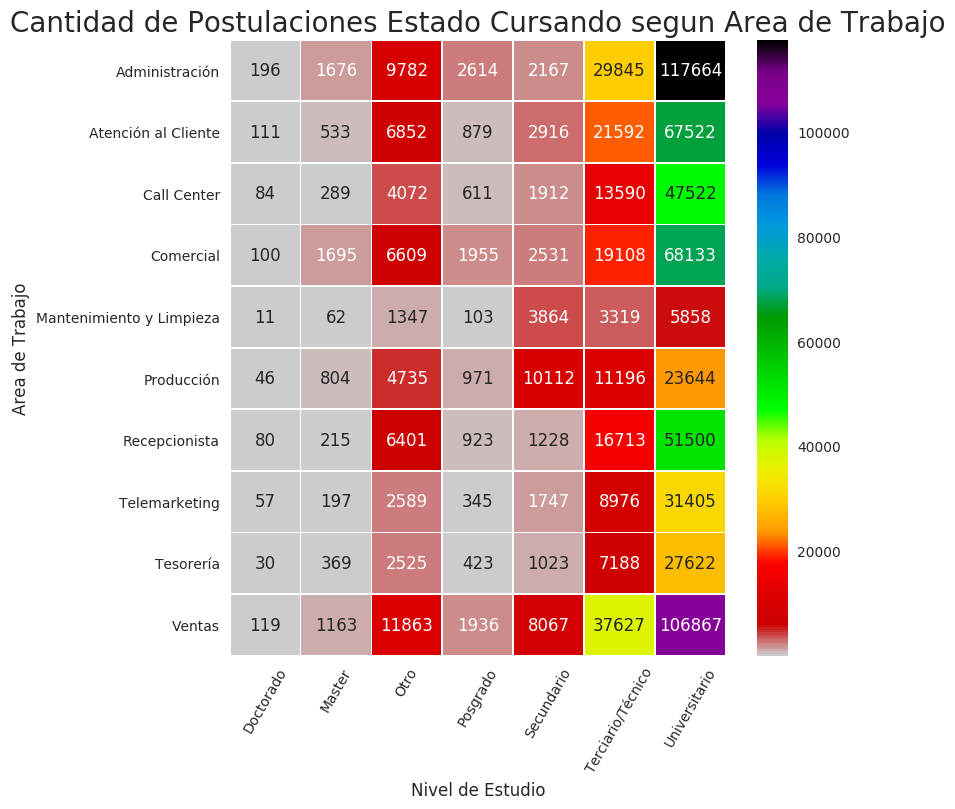

In [19]:
plt.subplots(figsize=(8,8))
grafico_postulaciones_en_curso=sns.heatmap(nivel_top_postulaciones_en_curso,linewidths=.5,fmt="d",annot=True,cmap="nipy_spectral_r")
grafico_postulaciones_en_curso.set_title("Cantidad de Postulaciones Estado Cursando segun Area de Trabajo",fontsize=20)
grafico_postulaciones_en_curso.set_xlabel("Nivel de Estudio",fontsize=12)
grafico_postulaciones_en_curso.set_ylabel("Area de Trabajo",fontsize=12)
grafico_postulaciones_en_curso.set_xticklabels(grafico_postulaciones_en_curso.get_xticklabels(),rotation=60)

En relacion al gráfico superior, puede observarse que en la mayoria de las áreas hay muy pocos postulantes cursando actualmente un Doctorado y un Master mientras que la mayoria tiende a postularse cursando una Terciario/Técnico o una carrera Universitaria

### 2.6.B) Postulaciones con estado 'Graduado'

In [17]:
graduados=educacion[(educacion['Estado']=='Graduado')]
postulaciones_graduados=pd.merge(postulaciones_area,graduados,on='idpostulante',how='inner')
top_postulaciones_graduados=pd.merge(postulaciones_graduados,df_top_post,on='Nombre_Area',how='inner')
top_postulaciones_graduados['Valor']=1
nivel_top_postulaciones_graduados=top_postulaciones_graduados.pivot_table(index='Nombre_Area',columns='Nivel',values='Valor',aggfunc='count')
nivel_top_postulaciones_graduados

Nivel                     Doctorado  Master   Otro  Posgrado  Secundario  \
Nombre_Area                                                                
Administración                   84    1967  33278      5594      154170   
Atención al Cliente              65     725  22519      1933      126762   
Call Center                      24     416  13792      1233       79021   
Comercial                       109    2075  24815      5472      118629   
Mantenimiento y Limpieza          8     189   6850       474       41280   
Producción                       93    1548  27758      2980      204776   
Recepcionista                    25     445  18426      1308       85188   
Telemarketing                    13     285   9298       854       56389   
Tesorería                        37     396   8503       982       46811   
Ventas                           89    2275  45119      5280      266842   

Nivel                     Terciario/Técnico  Universitario  
Nombre_Area                                                 
Administración                        48766          61599  
Atención al Cliente                   27393          18119  
Call Center                           17190          12848  
Comercial                             35697          44555  
Mantenimiento y Limpieza               4143           1708  
Producción                            18983          16694  
Recepcionista                         23668          16599  
Telemarketing                         10630           8076  
Tesorería                             10494          11368  
Ventas                                54494          43128

[Text(0.5,0,'Doctorado'),
 Text(1.5,0,'Master'),
 Text(2.5,0,'Otro'),
 Text(3.5,0,'Posgrado'),
 Text(4.5,0,'Secundario'),
 Text(5.5,0,'Terciario/Técnico'),
 Text(6.5,0,'Universitario')]

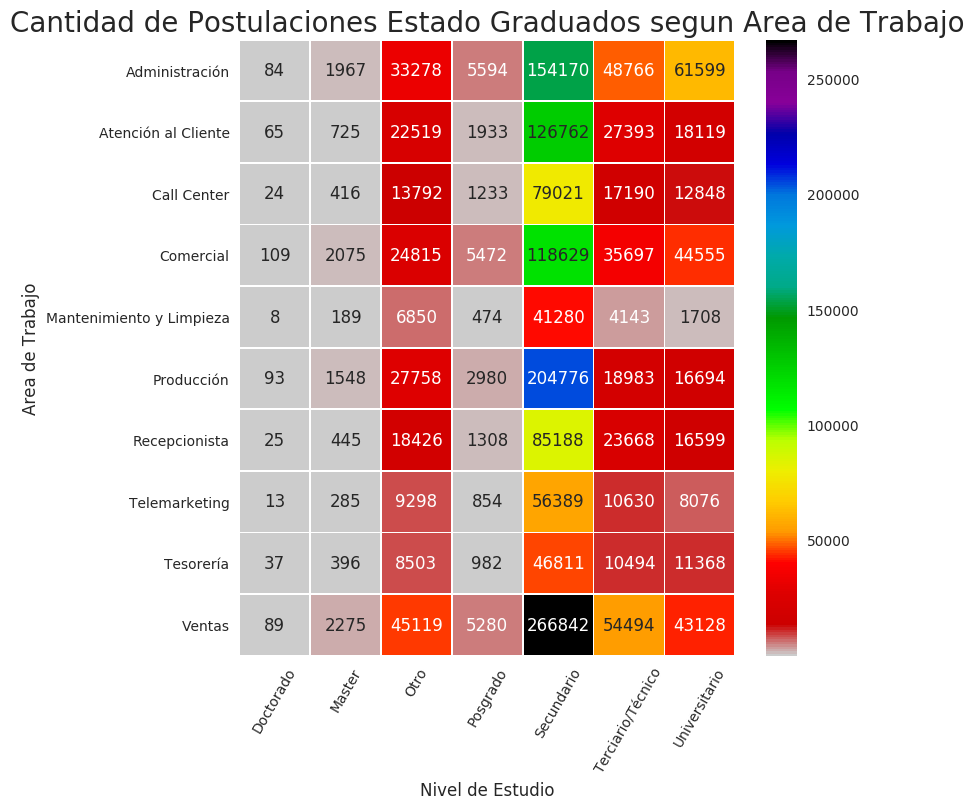

In [18]:
plt.subplots(figsize=(8,8))
grafico_postulaciones_graduados=sns.heatmap(nivel_top_postulaciones_graduados,linewidths=.5,fmt="d",annot=True,cmap="nipy_spectral_r")
grafico_postulaciones_graduados.set_title("Cantidad de Postulaciones Estado Graduados segun Area de Trabajo",fontsize=20)
grafico_postulaciones_graduados.set_xlabel("Nivel de Estudio",fontsize=12)
grafico_postulaciones_graduados.set_ylabel("Area de Trabajo",fontsize=12)
grafico_postulaciones_graduados.set_xticklabels(grafico_postulaciones_graduados.get_xticklabels(),rotation=60)

Podemos observar que en todas las áreas de trabajo, lo que tienen en común es que la mayor cantidad de graduados es del Secundario, mientras que en el nivel en el que hay menos graduados es Doctorado y Master. Ahora bien, si se lo compara con el gráfico de los postulantes que se encuentran cursando, se puede observar que no hay tantos graduados en los niveles donde más gente hay cursando, siendo el caso del nivel Universitario y del Terciario/Técnico

### 2.7) Conclusión General

En el apartado anterior pudimos ver cuales eran las áreas de trabajo con la mayor cantidad de avisos y que, salvo Ventas que se encuentra en primer lugar en ambos, las demas áreas difieren en las que tienen más cantidad de avisos y cantidad de Postulaciones. También se pudo observar que las áreas con mayor cantidad de postulaciones son las mismas con mayor cantidad de avisos vistos, asi mismo, pudimos ver que las postulaciones difieren entre género, siendo en el sexo masculino peferente el área de Producción mientras que en el femenino el de Ventas, y a su vez, las demás áreas tambien presentan cambios de posiciones. La relación entre postulaciones y vistas entre género no generó mucha diferencia en relación con el analisis general, en ambos géneros el área con mayor cantidad de postulaciones tiene la mayor cantidad de vistas. En cuanto a la edad, en general, Comercial y Administracion presentan el mayor promedio de edad mientras que el menor se encuentra en Telemarketing, en cuanto a género no hay tampoco cambios muy sustanciales aunque la mayor diferencia se puede ver en el area de Recepcionista, mientras que en el sexo masculino presenta un promedio de Edad normal en relacion a las otras áreas, en el femenino es en el que el promedio es menor. Y por último se analizó por estado, el nivel general en que se postulan en las áreas principales, la mayor cantidad de los postulantes se encuentran actualmente cursando una carrera Universitaria o Terciaria/Técnica sin importar el área de trabajo y en muy baja cantidad, Doctorado, Master y Secundario. Mientras que en el caso de los graduados, la mayor cantidad de los postulantes se encuentra graduado del Secundario en cualquier área, mientras que en los otros niveles no hay tantos, sin importar el área.

## 3) Postulaciones durante el Tiempo

Ahora analizaremos las postulaciones a lo largo del tiempo, como en este caso tenemos las postulaciones durante el mes de Enero y Febrero, ya que en nuestro país es pleno Verano y por consiguiente, fecha de vacaciones, vamos a ver si hya alguna diferencia en la quincena o en el mes o semana de postuacion.

### 3.1) Cantidad de Postulaciones por Quincena

In [47]:
segunda_enero=postulaciones[(postulaciones['Fecha_Postulacion']>='2018-01-15') & (postulaciones['Fecha_Postulacion']<='2018-01-31')]
segunda_enero['Dia']=segunda_enero['Fecha_Postulacion'].dt.day
quincenas=segunda_enero['Dia'].value_counts().sort_index().reset_index()
quincenas.replace({15:1,16:2,17:3,18:4,19:5,20:6,21:7,22:8,23:9,24:10,25:11,26:12,27:13,28:14,29:15,30:16},inplace=True)
quincenas.rename(columns={'index':'Dia','Dia':'2° Enero'},inplace=True)
primera_febrero=postulaciones[(postulaciones['Fecha_Postulacion']>='2018-02-01') & (postulaciones['Fecha_Postulacion']<'2018-02-16')]
primera_febrero['Solo_Dia']=primera_febrero['Fecha_Postulacion'].dt.day
primera_quincena_feb=primera_febrero['Solo_Dia'].value_counts().sort_index().reset_index()
quincenas['1° Febrero']=primera_quincena_feb['Solo_Dia']
segunda_febrero=postulaciones[(postulaciones['Fecha_Postulacion']>'2018-02-15') & (postulaciones['Fecha_Postulacion']<'2018-02-28')]
segunda_febrero['Solo_Dia']=postulaciones['Fecha_Postulacion'].dt.day
segunda_quincena_feb=segunda_febrero['Solo_Dia'].value_counts().sort_index().reset_index()
quincenas['2° Febrero']=segunda_quincena_feb['Solo_Dia']

/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

In [48]:
group_quincenas=quincenas.groupby(['Dia']).agg('sum')
group_quincenas

2° Enero  1° Febrero  2° Febrero
Dia                                  
1       90934     77554.0     94183.0
2       86954     69328.0     83448.0
3       88855     32543.0     40588.0
4       81241     35350.0     43008.0
5       68489     91680.0    137104.0
6       32711     85786.0    132726.0
7       35019     75788.0    123054.0
8       95935     67579.0    105738.0
9       91402     66963.0     85024.0
10      97773     32138.0     43718.0
11      79867     28138.0     49924.0
12      73446     33669.0    122688.0
13      35633     44363.0    119845.0
14      35418     85201.0         0.0
15      96300     94184.0         0.0
16      97352         0.0         0.0

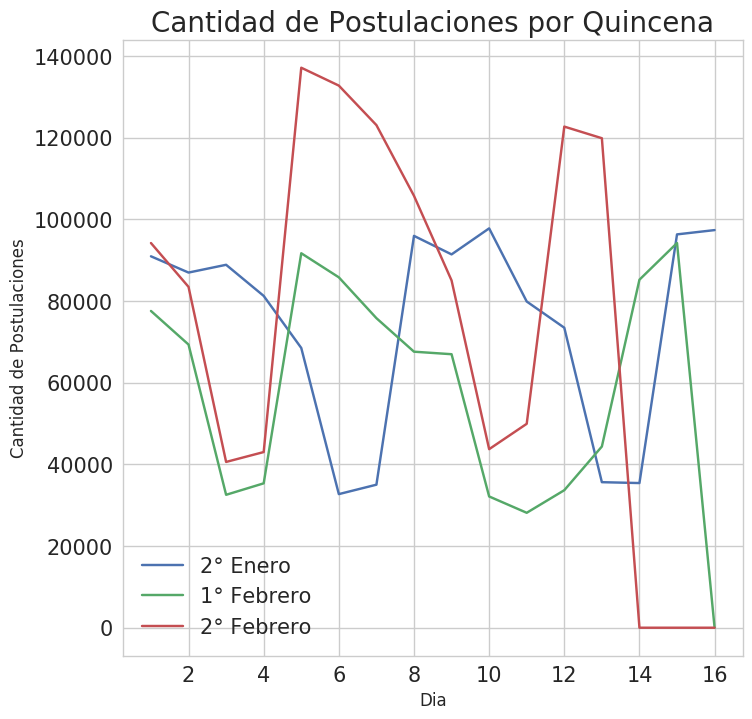

In [49]:
grafico_quincena=group_quincenas.plot(kind='line',figsize=(8,8),fontsize=15)
grafico_quincena.set_title("Cantidad de Postulaciones por Quincena",fontsize=20)
grafico_quincena.set_xlabel("Dia",fontsize=12)
grafico_quincena.set_ylabel("Cantidad de Postulaciones",fontsize=12)
plt.legend(['2° Enero','1° Febrero','2° Febrero'],fontsize=15)

Por el gráfico se puede ver que tanto las dos quincenas de Febrero comenzaron de la misma manera pero en la segunda de Febrero es donde más postulaciones hubo, promediando la mitad de la quincena, en Enero fue donde hubo más postulaciones (al igual que al principio de la misma) pero llegando casi al final de la misma en la Segunda de Febrero comenzaron las postulaciones nuevamente, alcanzando otro pico. En conclusión, en la segunda quincena de Febrero es donde más postulaciones hubo

### 3.2) ¿Qué día de la semana hubo más postulaciones?

In [58]:
semana=postulaciones[['Fecha_Postulacion']]
semana['Dia_Semana']=semana['Fecha_Postulacion'].dt.weekday
semana['Dia_Semana']=(semana['Dia_Semana']+1)
semana['Semana']=semana['Fecha_Postulacion'].dt.week
semana['Valor']=1
pivot_dia_semana=semana.pivot_table(index='Semana',columns='Dia_Semana',values='Valor',aggfunc='sum')
semana.drop(columns={'Valor'},inplace=True)
pivot_dia_semana.rename(index={3:'3° Enero',4:'4° Enero',5:'5° Enero',6:'1° Febrero',7:'2° Febrero',8:'3° Febrero',9:"4° Febrero"},inplace=True)
pivot_dia_semana.rename(columns={1:'Lunes',2:'Martes',3:'Miercoles',4:'Jueves',5:'Viernes',6:'Sabado',7:'Domingo'},inplace=True)
pivot_dia_semana

/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Dia_Semana     Lunes    Martes  Miercoles    Jueves  Viernes   Sabado  Domingo
Semana                                                                        
3° Enero     90934.0   86954.0    88855.0   81241.0  68489.0  32711.0  35019.0
4° Enero     95935.0   91402.0    97773.0   79867.0  73446.0  35633.0  35418.0
5° Enero     96300.0   97352.0    88869.0   77554.0  69328.0  32543.0  35350.0
1° Febrero   91680.0   85786.0    75788.0   67579.0  66963.0  32138.0  28138.0
2° Febrero   33669.0   44363.0    85201.0   94184.0  83448.0  40588.0  43008.0
3° Febrero  137104.0  132726.0   123054.0  105738.0  85024.0  43718.0  49924.0
4° Febrero  122688.0  119845.0   118296.0       NaN      NaN      NaN      NaN

[Text(0,0.5,'3° Enero'),
 Text(0,1.5,'4° Enero'),
 Text(0,2.5,'5° Enero'),
 Text(0,3.5,'1° Febrero'),
 Text(0,4.5,'2° Febrero'),
 Text(0,5.5,'3° Febrero'),
 Text(0,6.5,'4° Febrero')]

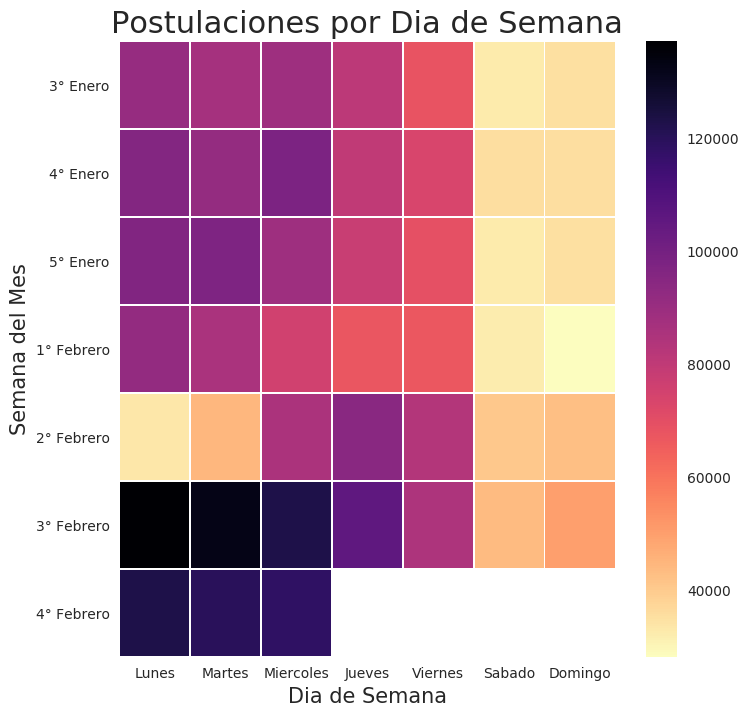

In [71]:
plt.subplots(figsize=(8,8))
grafico_semana=sns.heatmap(pivot_dia_semana,linewidths=.5,cmap="magma_r")
grafico_semana.set_title("Postulaciones por Dia de Semana",fontsize=22)
grafico_semana.set_xlabel("Dia de Semana",fontsize=15)
grafico_semana.set_ylabel("Semana del Mes",fontsize=15)
grafico_semana.set_yticklabels(grafico_semana.get_yticklabels(),rotation=0)

Como se puede observar, efectivamente en la segunda quincena de Febrero es donde más postulaciones hubo como lo habíamos verificado anteriormente, lo que cabe destacar es que la mayor cantidad de postulaciones suelen realizarse los días Lunes, Martes y Miércoles mientras que en los fines de semana no hay tanto movimiento. También se puede ver que en la primer semana de Febrero, recién a partir de mitad de semana comienzan a postularse pero como también pudo verse en el gráfico anterior, es la quincena con menos movimiento

### 3.3) ¿A que hora hubo más postulaciones?

Text(0,0.5,'Cantidad de Postulaciones')

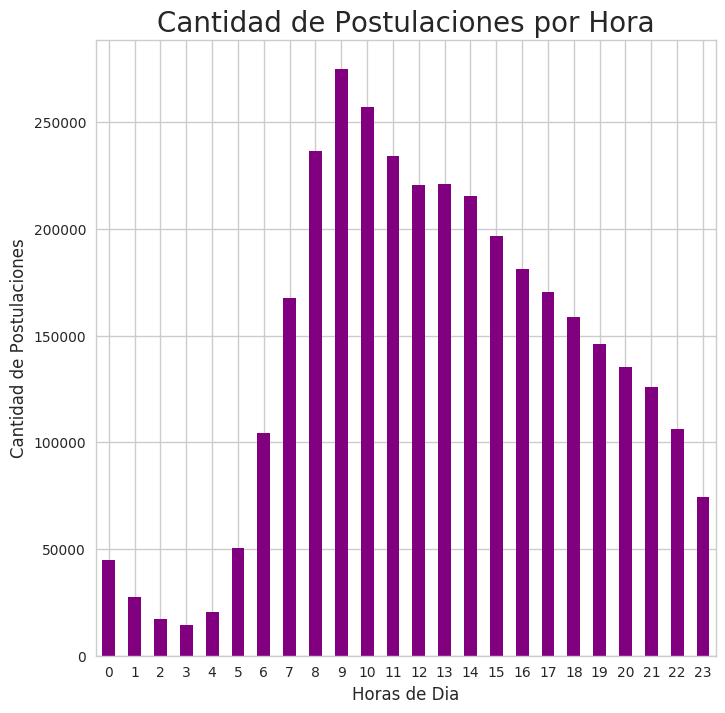

In [21]:
#Extraigo las horas de 'Fecha_Postulacion'
postulaciones['Hora']=postulaciones['Fecha_Postulacion'].dt.hour
hora_general=postulaciones['Hora'].value_counts().sort_index()
grafico_hora_general=hora_general.plot(rot=0,figsize=(8,8),kind='bar',color='purple')
grafico_hora_general.set_title("Cantidad de Postulaciones por Hora",fontsize=20)
grafico_hora_general.set_xlabel("Horas de Dia",fontsize=12)
grafico_hora_general.set_ylabel("Cantidad de Postulaciones",fontsize=12)

Se puede observa que las horas picos para la postulación son por la mañana entre las 9 y las 11, luego comienza a decrecer lentamente hasta llegar a las horas de la madrugada, de 0 a 5 horas donde se registran los picos de postulacines más bajos.

### 3.4) Postulacion por hora por Edad

(0, 40)

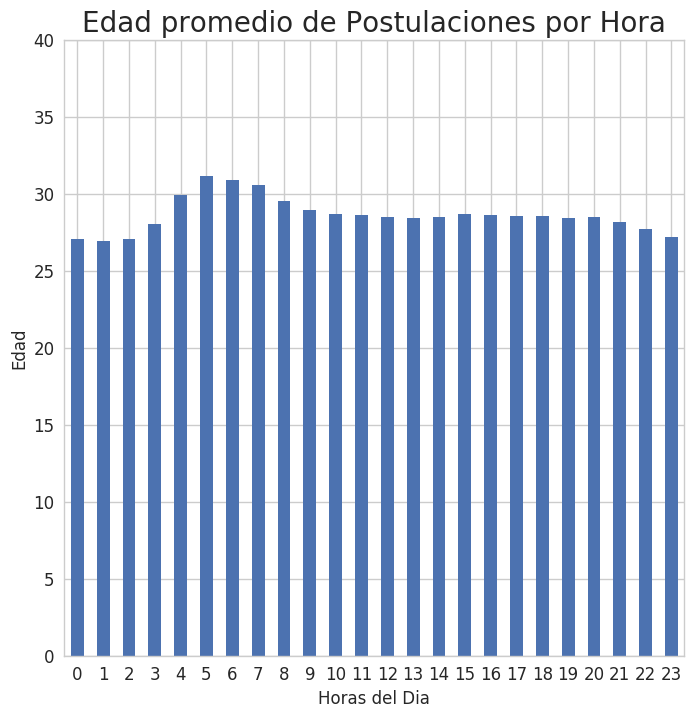

In [22]:
#Ahora vamos a juntar la hora de Postulacion con la edad de los postulantes
hora_edad=postulaciones[['idpostulante','Hora']]
hora_edad_general=pd.merge(hora_edad,edad,on='idpostulante',how='inner')
group_hora_edad=hora_edad_general.groupby(['Hora']).agg({'Edad':'mean'})
grafico_group_edad=group_hora_edad.plot(kind='bar',rot=0,figsize=(8,8),fontsize=12,legend=False)
grafico_group_edad.set_title("Edad promedio de Postulaciones por Hora",fontsize=20)
grafico_group_edad.set_xlabel("Horas del Dia",fontsize=12)
grafico_group_edad.set_ylabel("Edad",fontsize=12)
plt.ylim([0,40])

Podemos ver que el mayor promedio de edad de los postulantes lo hacen por la mañana entre las 5 y las 7, mientras que los promedios de los más jóvenes es durante la madrugada, entre las 0 y las 2 de la mañana,por lo que comparando con el grafico anterior, cuando menos postulaciones hay son cuando se postulan los más jovenes mientras que donde más cantidad de postulaciones hay el promedio es mayor

### 3.5) ¿A que hora hubo más Vistas?

Text(0,0.5,'Cantidad de Vistas')

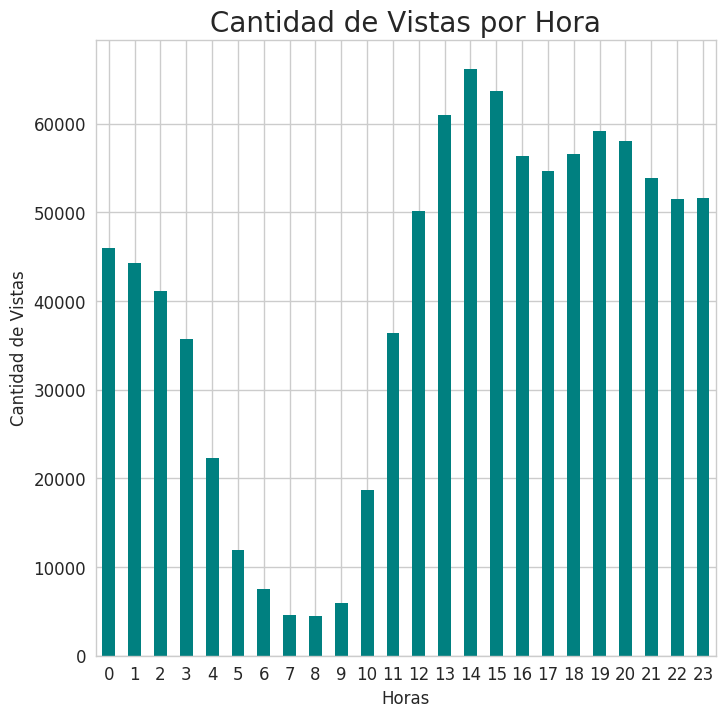

In [9]:
vistas['Hora']=vistas['timestamp'].dt.hour
hora_vistas=vistas['Hora'].value_counts().sort_index()
grafico_horas_vistas=hora_vistas.plot(kind='bar',figsize=(8,8),fontsize=12,rot=0,color='teal')
grafico_horas_vistas.set_title("Cantidad de Vistas por Hora",fontsize=20)
grafico_horas_vistas.set_xlabel("Horas",fontsize=12)
grafico_horas_vistas.set_ylabel("Cantidad de Vistas",fontsize=12)

Se puede ver que la mayor cantidad de vistas ocurren durante las horas del mediodía y luego se mantiene dentro de todo constante hasta las 2 de la mañana, cuando comienza a decrecer de manera bastante abrupta hasta llegar a las 5 de la mañana, la cual se encuentra en el rango de menor cantidad de vistas.

### 3.6) Cantidad de Vistas y Postulaciones por fecha

ACLARACION: Para este apartado solamente utilizaremos las fechas que se encuentran en común entre las Postulaciones y las Vistas, en este caso son las fechas entre el 23-02-2018 y 28-02-2018

In [ ]:
#Separo las fechas con la hora y las dejo solo con la fecha
vistas['Fecha_Vista']=vistas['timestamp'].dt.date
postulaciones['Fecha_sin_hora']=postulaciones['Fecha_Postulacion'].dt.date
postulacion_igual_vista=postulaciones[(postulaciones['Fecha_Postulacion']>='2018-02-23') & (postulaciones['Fecha_Postulacion']<'2018-03-01')]
vistas_igual_postulacion=vistas[(vistas['timestamp']<'2018-03-01')]

In [25]:
fin_feb=postulacion_igual_vista['Fecha_sin_hora'].value_counts().sort_index().reset_index()
vistas_fin_feb=vistas_igual_postulacion['Fecha_Vista'].value_counts().sort_index().reset_index()
fin_feb['Vistas']=vistas_fin_feb['Fecha_Vista']
fin_feb.rename(columns={'index':'Dia','Fecha_sin_hora':'Postulaciones'},inplace=True)
fin_feb.set_index('Dia',inplace=True)
fin_feb

Postulaciones  Vistas
Dia                              
2018-02-23          85024   47236
2018-02-24          43718   95930
2018-02-25          49924   90646
2018-02-26         122688  227957
2018-02-27         119845  232145
2018-02-28         118296  227160

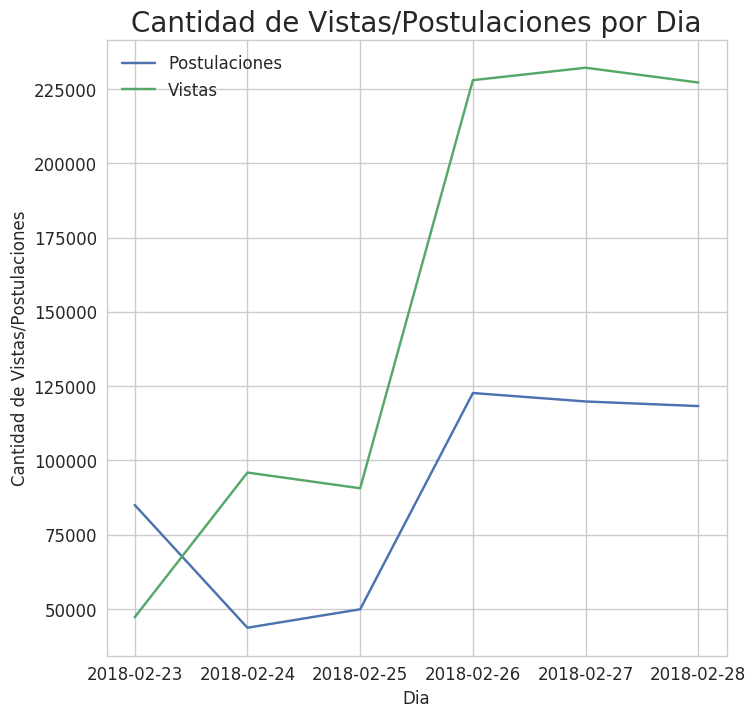

In [26]:
grafico_fin_feb=fin_feb.plot(kind='line',figsize=(8,8),fontsize=12)
grafico_fin_feb.set_title("Cantidad de Vistas/Postulaciones por Dia",fontsize=20)
grafico_fin_feb.set_xlabel("Dia",fontsize=12)
grafico_fin_feb.set_ylabel("Cantidad de Vistas/Postulaciones",fontsize=12)
plt.legend(['Postulaciones','Vistas'],fontsize=12)

Podemos ver que salvo el primer día, el comportamiento durante los dias siguientes es muy parecido, y cabe destacar, que cada en cada día la cantidad de vistas supera al de postulaciones, por lo que tiene sentido ya que en general, la gente observa y analiza cada aviso para luego postularse en el cual le parezca conveniente

### 3.7) Conclusión General

En este apartado se analizo el tiempo de las postulaciones, al ser los datos en el verano de nuestras zona, queríamos analizar cuantas postulaciones hubo por quincena, siendo la de mayor actividad la segunda de Febrero. Así mismo, pudimos ver que la mayor cantidad de postulaciones fueron en el mes de Febrero, y a su vez, durante los primeros días de la semana es donde hubo mayor cantidad de postulaciones. En cuanto a las horas, el pico de postulaciones se registro durante la mañana mientras que la menor cantidad durante la madrugadas, y en relacion a la edad, el promedio de más jovenes se postulo durante la madrugada mientas que el promedio de edad más grande fue durante la mañana. En la relación entre cantidad de postulaciones y vistas, durante los mismos días, no se noto ninguna irregularidad.

## 4) Tipo y Nivel de Trabajo

### 4.1) ¿Que tipo de Trabajo ofrecen más en los avisos?

In [15]:
tipo_avisos=avisos_detalle['Tipo_de_Trabajo'].value_counts()
tipo_avisos_top=tipo_avisos.head(2)
tipo_avisos_resto=tipo_avisos.tail(7)
tipo_avisos

Full-time          12339
Part-time            863
Teletrabajo          110
Pasantia              63
Por Horas             63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: Tipo_de_Trabajo, dtype: int64

Text(0,0.5,'Tipo de Trabajo')

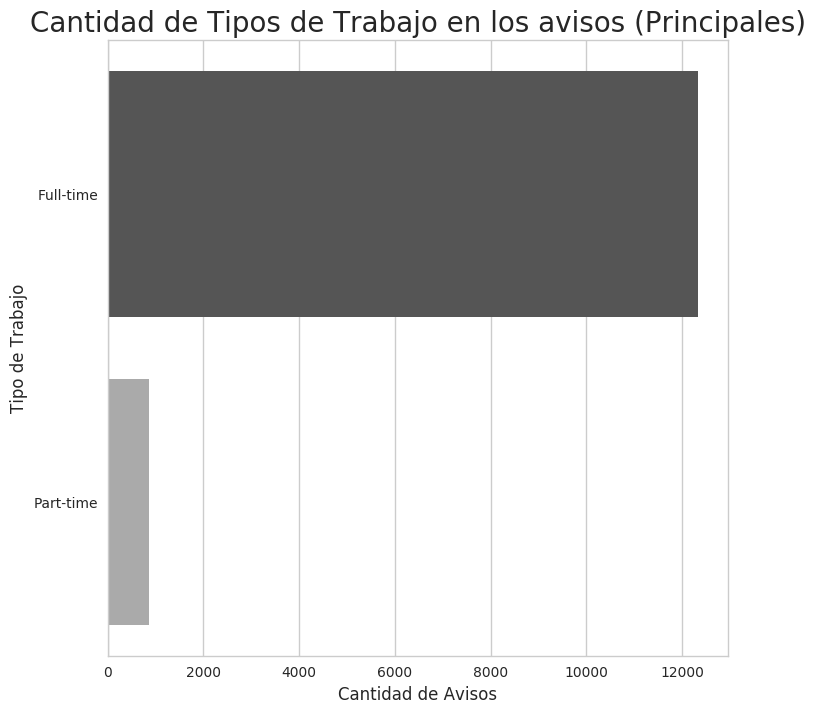

In [22]:
plt.subplots(figsize=(8,8))
grafico_tipo_avisos_top=sns.barplot(x=tipo_avisos_top.values,y=tipo_avisos_top.index,orient='h',palette="binary_r")
grafico_tipo_avisos_top.set_title("Cantidad de Tipos de Trabajo en los avisos (Principales)",fontsize=20)
grafico_tipo_avisos_top.set_xlabel("Cantidad de Avisos",fontsize=12)
grafico_tipo_avisos_top.set_ylabel("Tipo de Trabajo",fontsize=12)

Text(0,0.5,'Tipo de Trabajo')

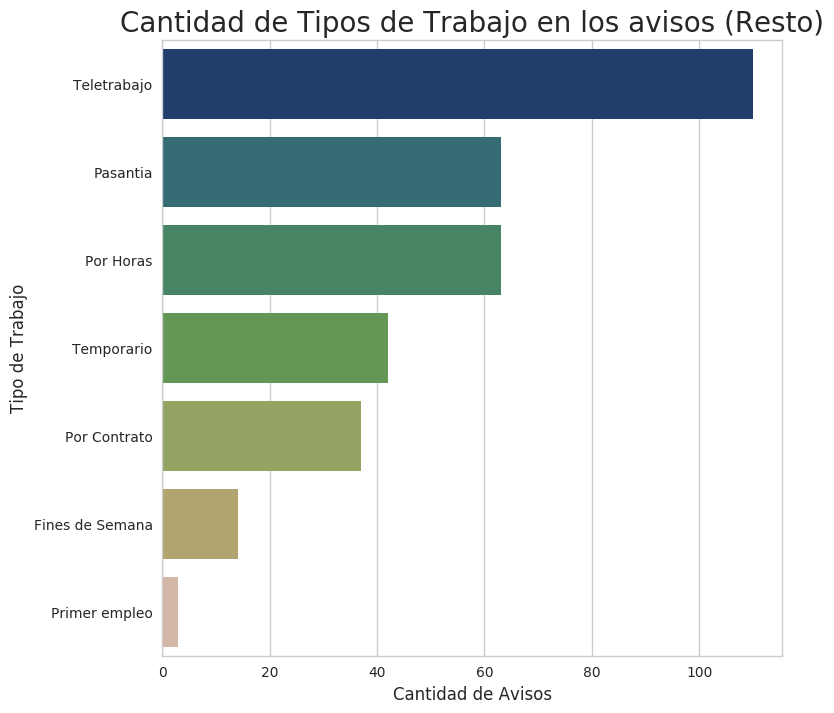

In [91]:
plt.subplots(figsize=(8,8))
grafico_tipo_avisos_resto=sns.barplot(x=tipo_avisos_resto.values,y=tipo_avisos_resto.index,orient='h',palette="gist_earth")
grafico_tipo_avisos_resto.set_title("Cantidad de Tipos de Trabajo en los avisos (Resto)",fontsize=20)
grafico_tipo_avisos_resto.set_xlabel("Cantidad de Avisos",fontsize=12)
grafico_tipo_avisos_resto.set_ylabel("Tipo de Trabajo",fontsize=12)

En este análisis tuvimos que hacer dos gráficos para que se pueda diferenciar la cantidad de tipos de trabajo por avisos ya que hay una diferencia enorme entre Full-Time y los otros tipos de trabajo, fuera de la mencionada anteriormente, la otra diferencia es entre Part-Time y Teletrabajo, aunque no hay una diferencia tan grande como con Full-Time. Fuera de ello, la cantidad comienza a decrementarse hasta llegar a Primer Trabajo, la cual es la que se encuentra en menos cantidad de avisos

### 4.2) Tipo de Trabajo por Postulaciones y Vistas

### 4.2.A) Por postulaciones

In [14]:
tipo_trabajo=avisos_detalle[['idaviso','Tipo_de_Trabajo']]
postulantes_tipo=pd.merge(tipo_trabajo,postulaciones,on='idaviso',how='inner')
cantidad_tipo_post=postulantes_tipo['Tipo_de_Trabajo'].value_counts()
cantidad_tipo_post_resto=cantidad_tipo_post.tail(7)
cantidad_tipo_post_top=cantidad_tipo_post.head(2)
cantidad_tipo_post

Full-time          2633145
Part-time           394677
Pasantia             15457
Por Horas            11863
Temporario            9411
Por Contrato          3826
Teletrabajo           3804
Fines de Semana       1900
Primer empleo          123
Name: Tipo_de_Trabajo, dtype: int64

Text(0,0.5,'Tipo de Trabajo')

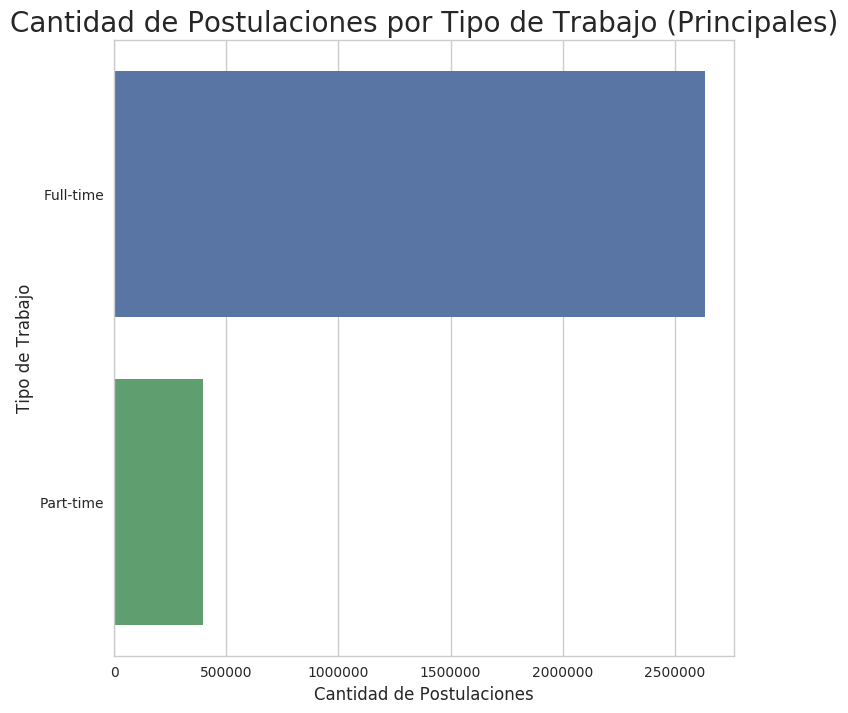

In [93]:
plt.subplots(figsize=(8,8))
grafico_cantidad_tipo_post_top=sns.barplot(x=cantidad_tipo_post_top.values,y=cantidad_tipo_post_top.index,orient='h')
grafico_cantidad_tipo_post_top.set_title("Cantidad de Postulaciones por Tipo de Trabajo (Principales)",fontsize=20)
grafico_cantidad_tipo_post_top.set_xlabel("Cantidad de Postulaciones",fontsize=12)
grafico_cantidad_tipo_post_top.set_ylabel("Tipo de Trabajo",fontsize=12)

Text(0,0.5,'Tipo de Trabajo')

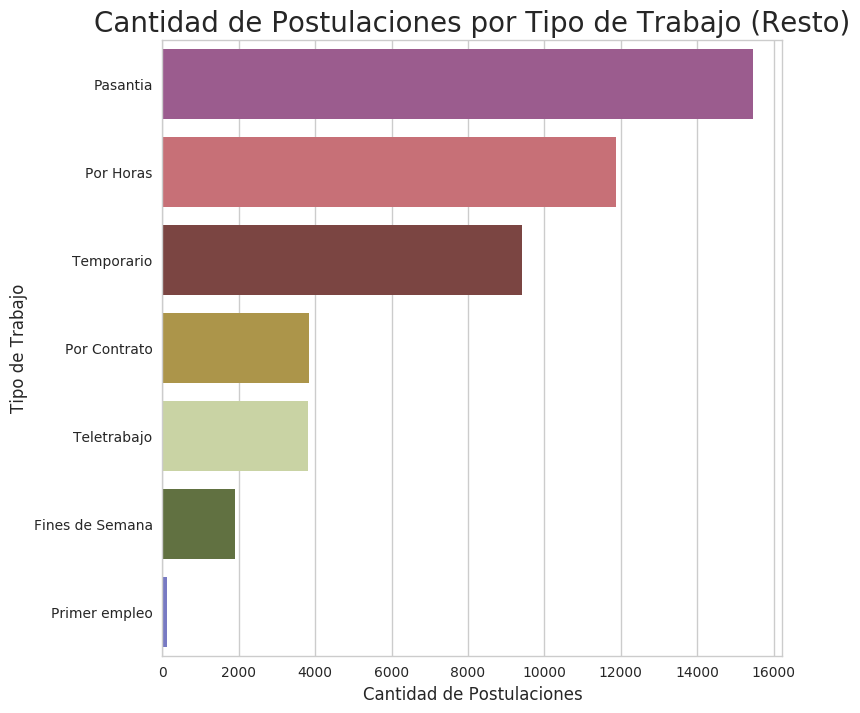

In [94]:
plt.subplots(figsize=(8,8))
grafico_cantidad_tipo_post_resto=sns.barplot(x=cantidad_tipo_post_resto.values,y=cantidad_tipo_post_resto.index,orient='h',palette="tab20b_r")
grafico_cantidad_tipo_post_resto.set_title("Cantidad de Postulaciones por Tipo de Trabajo (Resto)",fontsize=20)
grafico_cantidad_tipo_post_resto.set_xlabel("Cantidad de Postulaciones",fontsize=12)
grafico_cantidad_tipo_post_resto.set_ylabel("Tipo de Trabajo",fontsize=12)

Podemos observar que con los Tipos principales no hay ningún cambio, sigue liderando con una cantidad imponente Full-Time y le sigue Part-Time con una diferencia significativa. Ahora bien, en los siguientes tipo comienzan a haber diferencias, se puede ver que los últimos dos lugares siguen perteneciendo a los mismos tipos (Fines de Semana y Primer Empleo), en cambio se puede obsevar que hay un gran incremento en las Pasantías mientras que Teletrabajo bajó considerablemente

### 4.2.B) Por Vistas

In [95]:
vistas_tipo=pd.merge(tipo_trabajo,vistas,on='idaviso',how='inner')
cantidad_tipo_vistas=vistas_tipo['Tipo_de_Trabajo'].value_counts()
cantidad_tipo_vistas_top=cantidad_tipo_vistas.head(2)
cantidad_tipo_vistas_resto=cantidad_tipo_vistas.tail(7)
cantidad_tipo_vistas

Full-time          835421
Part-time          109022
Por Horas            5356
Pasantia             4360
Temporario           3182
Teletrabajo          2981
Fines de Semana       846
Por Contrato          727
Primer empleo           2
Name: Tipo_de_Trabajo, dtype: int64

Text(0,0.5,'Tipo de Trabajo')

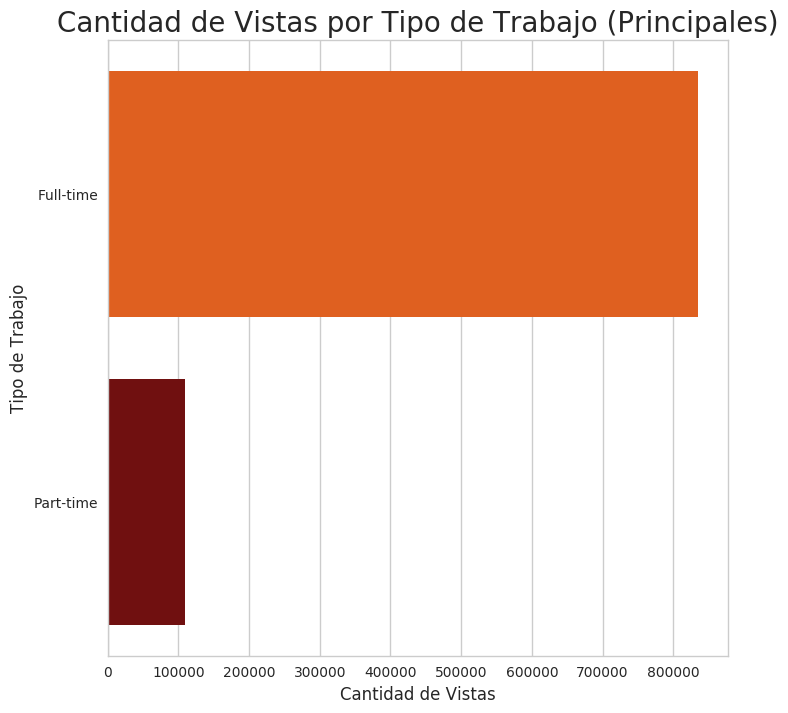

In [96]:
plt.subplots(figsize=(8,8))
grafico_cantidad_tipo_vistas_top=sns.barplot(x=cantidad_tipo_vistas_top.values,y=cantidad_tipo_vistas_top.index,orient='h',palette="gist_heat_r")
grafico_cantidad_tipo_vistas_top.set_title("Cantidad de Vistas por Tipo de Trabajo (Principales)",fontsize=20)
grafico_cantidad_tipo_vistas_top.set_xlabel("Cantidad de Vistas",fontsize=12)
grafico_cantidad_tipo_vistas_top.set_ylabel("Tipo de Trabajo",fontsize=12)

Text(0,0.5,'Tipo de Trabajo')

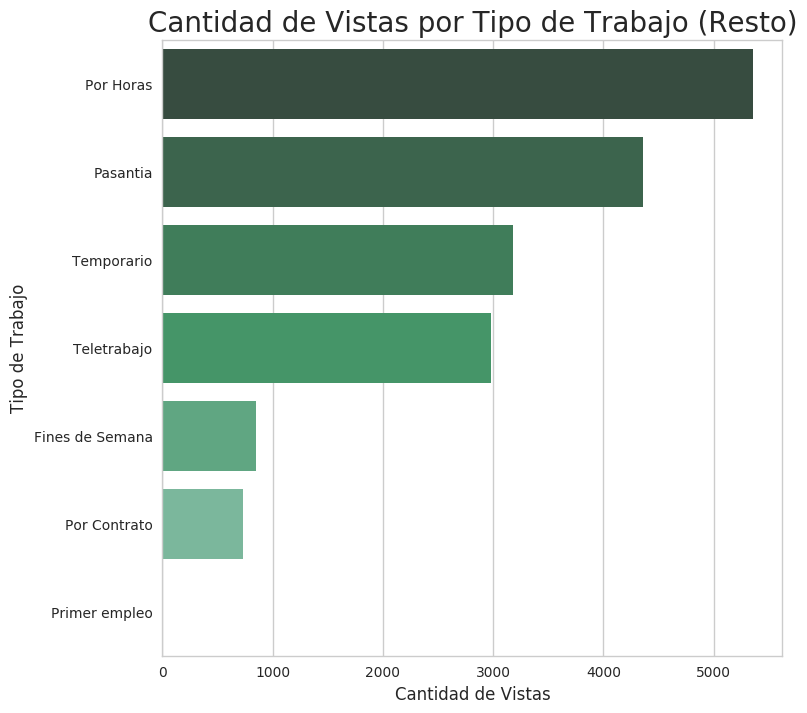

In [97]:
plt.subplots(figsize=(8,8))
grafico_cantidad_tipo_vistas_resto=sns.barplot(x=cantidad_tipo_vistas_resto.values,y=cantidad_tipo_vistas_resto.index,orient='h',palette='BuGn_d')
grafico_cantidad_tipo_vistas_resto.set_title("Cantidad de Vistas por Tipo de Trabajo (Resto)",fontsize=20)
grafico_cantidad_tipo_vistas_resto.set_xlabel("Cantidad de Vistas",fontsize=12)
grafico_cantidad_tipo_vistas_resto.set_ylabel("Tipo de Trabajo",fontsize=12)

Podemos ver que como sucedió con las Postulaciones y la cantidad de Avisos, en los primeros dos lugares se encuentan los mismos tipo, Full-Time y Part-Time, pero luego comienzan a haber diferencias en relación con las Postulaciones. En tercer lugar se encuentra el tipo de trabajo Por Horas, lo cuál ya establece una diferencia con relación con las Postulaciones, y a su vez, la otra gran diferencia es la cantidad de tipo de trabajo Por Contrato con relación con la de Postulaciones, ya que bajó de manera notoria en relación con los otros tipo de Trabajo

### 4.3) Tipos de Trabajo por género

In [25]:
postulantes_tipo_femenino=pd.merge(postulantes_tipo,genero_femenino,on='idpostulante',how='inner')
postulantes_tipo_masculino=pd.merge(postulantes_tipo,genero_masculino,on='idpostulante',how='inner')
cantidad_tipo_femenino=postulantes_tipo_femenino['Tipo_de_Trabajo'].value_counts()
cantidad_tipo_femenino_top=cantidad_tipo_femenino.head(2).sort_index()
cantidad_tipo_femenino_resto=cantidad_tipo_femenino.tail(7).sort_index()
cantidad_tipo_masculino=postulantes_tipo_masculino['Tipo_de_Trabajo'].value_counts()
cantidad_tipo_masculino_top=cantidad_tipo_masculino.head(2).sort_index()
cantidad_tipo_masculino_resto=cantidad_tipo_masculino.tail(7).sort_index()

In [26]:
df_cantidad_masculino_top=cantidad_tipo_masculino_top.reset_index()
cantidad_top_general=cantidad_tipo_femenino_top.reset_index()
cantidad_top_general['Masculino']=df_cantidad_masculino_top['Tipo_de_Trabajo']
cantidad_top_general.rename(columns={'index':'Tipo_de_Trabajo','Tipo_de_Trabajo':'Femenino'},inplace=True)
cantidad_top_general.set_index('Tipo_de_Trabajo',inplace=True)
cantidad_top_general

Femenino  Masculino
Tipo_de_Trabajo                     
Full-time         1252075    1347490
Part-time          259388     130130

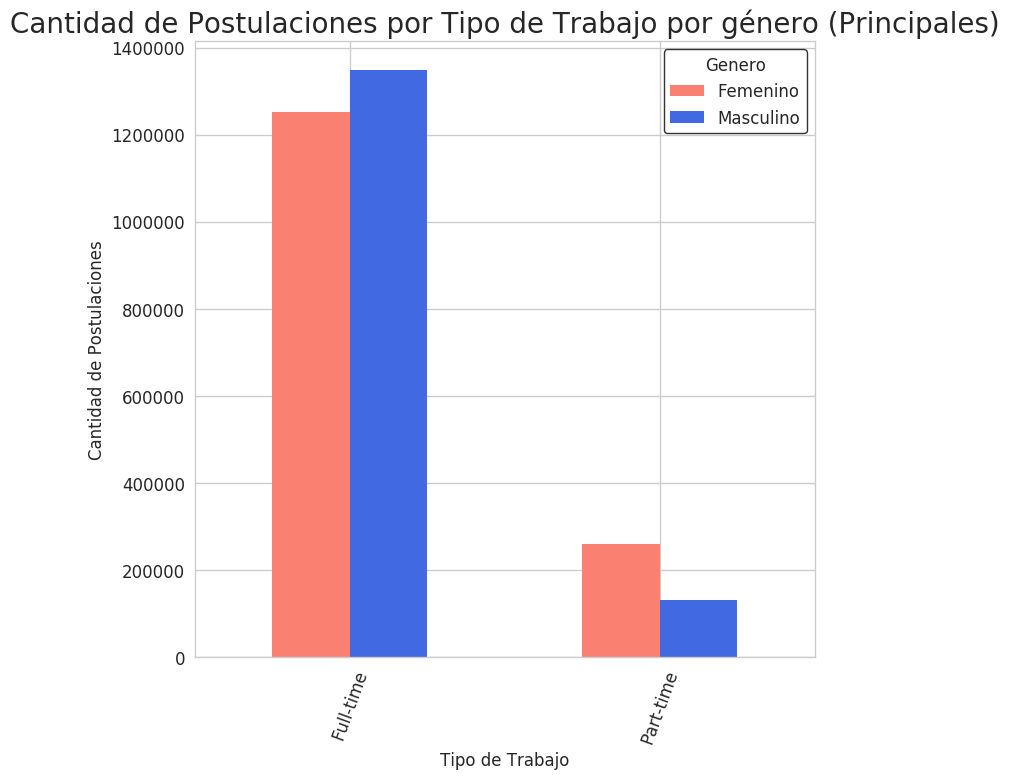

In [29]:
grafico_cantidad_top_general=cantidad_top_general.plot(kind='bar',figsize=(8,8),fontsize=12,color=['salmon','royalblue'],rot=70)
grafico_cantidad_top_general.set_title("Cantidad de Postulaciones por Tipo de Trabajo por género (Principales)",fontsize=20)
grafico_cantidad_top_general.set_xlabel("Tipo de Trabajo",fontsize=12)
grafico_cantidad_top_general.set_ylabel("Cantidad de Postulaciones",fontsize=12)
leyenda=plt.legend(['Femenino','Masculino'],fontsize=12,title='Genero',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

In [30]:
df_cantidad_masculino_resto=cantidad_tipo_masculino_resto.reset_index()
cantidad_resto_general=cantidad_tipo_femenino_resto.reset_index()
cantidad_resto_general['Masculino']=df_cantidad_masculino_resto['Tipo_de_Trabajo']
cantidad_resto_general.rename(columns={'index':'Tipo_de_Trabajo','Tipo_de_Trabajo':'Femenino'},inplace=True)
cantidad_resto_general.set_index('Tipo_de_Trabajo',inplace=True)
cantidad_resto_general

Femenino  Masculino
Tipo_de_Trabajo                     
Fines de Semana      1335        514
Pasantia             9074       6178
Por Contrato         1636       2143
Por Horas            6095       5510
Primer empleo          39         83
Teletrabajo          1426       2336
Temporario           4408       4864

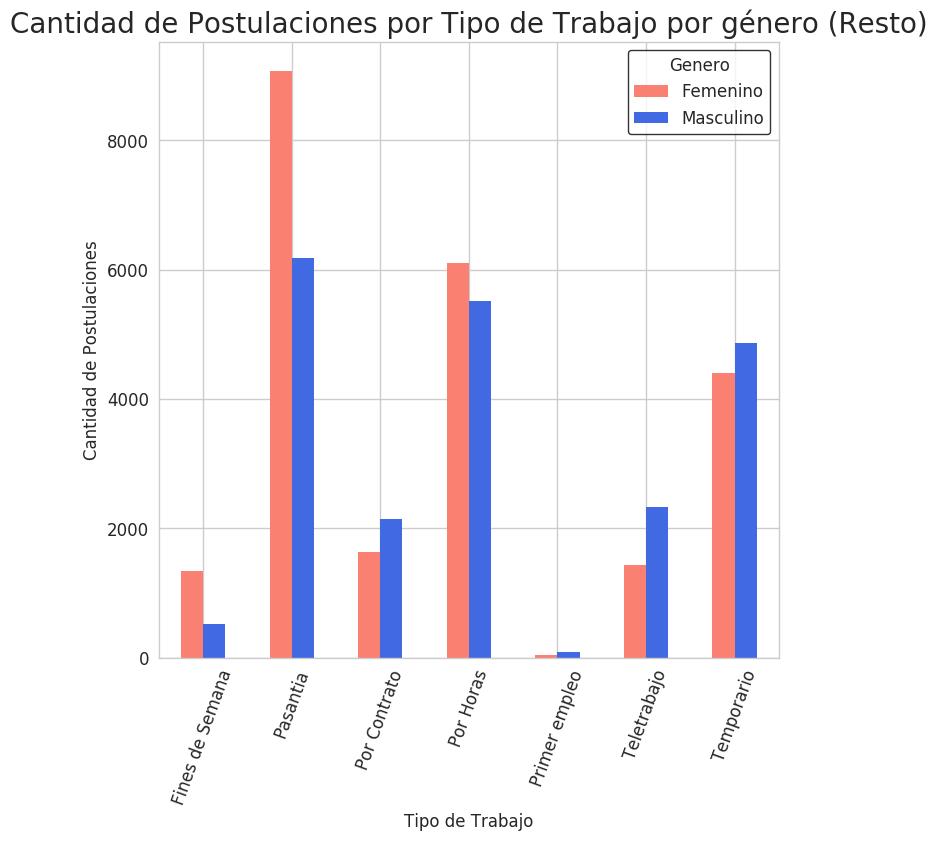

In [31]:
grafico_cantidad_resto_general=cantidad_resto_general.plot(kind='bar',figsize=(8,8),fontsize=12,color=['salmon','royalblue'],rot=70)
grafico_cantidad_resto_general.set_title("Cantidad de Postulaciones por Tipo de Trabajo por género (Resto)",fontsize=20)
grafico_cantidad_resto_general.set_xlabel("Tipo de Trabajo",fontsize=12)
grafico_cantidad_resto_general.set_ylabel("Cantidad de Postulaciones",fontsize=12)
leyenda=plt.legend(['Femenino','Masculino'],fontsize=12,title='Genero',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

Podemos observar que el género masculino tiende a postularse más en trabajos Full-Time que el femenino, en contraparte, el femenino se postula más en el Part-Time en relación con el masculino. En las otra áreas de trabajo, si tomamos por género, cada uno tiende a decrecer como sucede en la cantidad de Postulaciones, en lo único que difieren es que en el género masculino Teletrabajo se encuentra un escalón arriba que Por Contrato, mientras que en femenino sucede lo contrario. Si comparamos entre género por cada tipo, podemos ver que el femenino supera con amplia diferencia en las Pasantias y en Findes de Semana, mientras que el masculino supera en Temporario, Teletrabajo y por Contrato

### 4.4) Tipo de Trabajo por Postulaciones por Edad

In [24]:
postulantes_tipo_edad=pd.merge(postulantes_tipo,edad,on='idpostulante',how='inner')
tipo_edad_general=postulantes_tipo_edad.groupby(['Tipo_de_Trabajo']).agg({'Edad':'mean'})
tipo_edad_general

Edad
Tipo_de_Trabajo           
Fines de Semana  27.033769
Full-time        29.133041
Part-time        26.451962
Pasantia         25.079758
Por Contrato     30.327591
Por Horas        28.136650
Primer empleo    26.172131
Teletrabajo      28.406825
Temporario       28.538920

(0, 34)

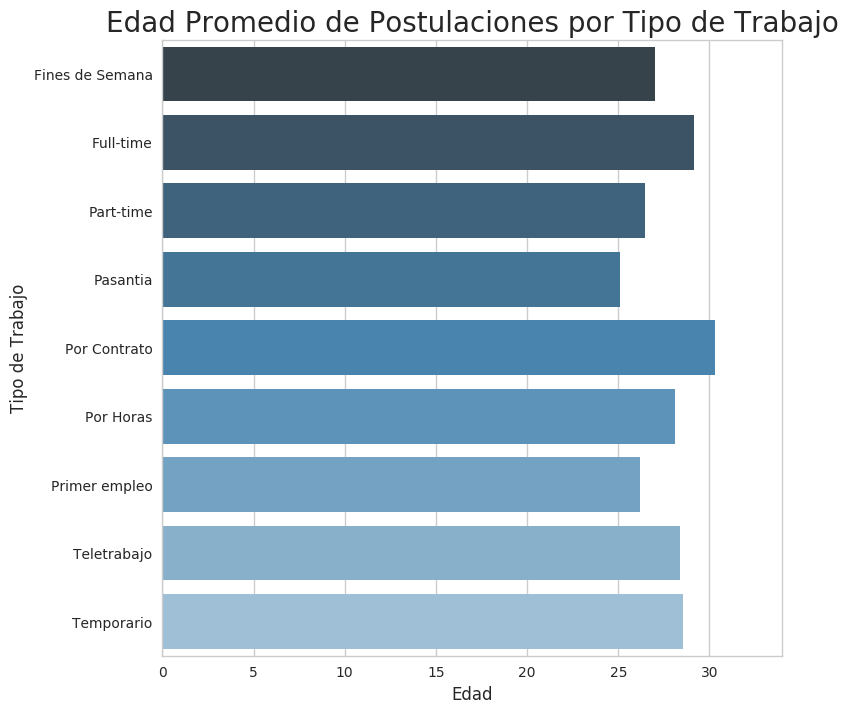

In [25]:
plt.subplots(figsize=(8,8))
grafico_tipo_edad_general=sns.barplot(y=tipo_edad_general.index,x=tipo_edad_general['Edad'],orient='h',palette="Blues_d")
grafico_tipo_edad_general.set_title("Edad Promedio de Postulaciones por Tipo de Trabajo",fontsize=20)
grafico_tipo_edad_general.set_ylabel("Tipo de Trabajo",fontsize=12)
grafico_tipo_edad_general.set_xlabel("Edad",fontsize=12)
plt.xlim([0,34])

### 4.4.A) Tipo de Trabajo por Postulaciones por Edad (Género Femenino)

In [26]:
postulantes_tipo_edad_femenino=postulantes_tipo_edad[(postulantes_tipo_edad['Sexo']=='FEM')]
tipo_edad_femenino=postulantes_tipo_edad_femenino.groupby(['Tipo_de_Trabajo']).agg({'Edad':'mean'})
tipo_edad_femenino

Edad
Tipo_de_Trabajo           
Fines de Semana  27.098793
Full-time        28.238548
Part-time        26.494447
Pasantia         25.048145
Por Contrato     29.331292
Por Horas        28.228148
Primer empleo    26.384615
Teletrabajo      28.161381
Temporario       28.029151

(0, 32)

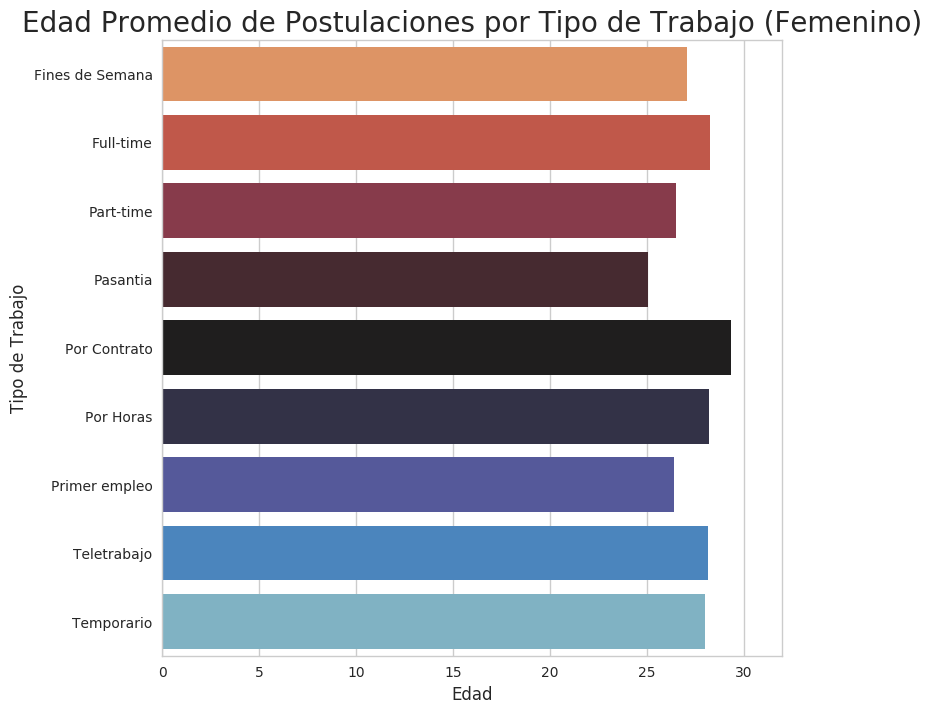

In [27]:
plt.subplots(figsize=(8,8))
grafico_tipo_edad_femenino=sns.barplot(y=tipo_edad_femenino.index,x=tipo_edad_femenino['Edad'],orient='h',palette="icefire_r")
grafico_tipo_edad_femenino.set_title("Edad Promedio de Postulaciones por Tipo de Trabajo (Femenino)",fontsize=20)
grafico_tipo_edad_femenino.set_ylabel("Tipo de Trabajo",fontsize=12)
grafico_tipo_edad_femenino.set_xlabel("Edad",fontsize=12)
plt.xlim([0,32])

### 4.4.B) Tipo de Trabajo por Postulaciones por Edad (Género Masculino)

In [28]:
postulantes_tipo_edad_masculino=postulantes_tipo_edad[(postulantes_tipo_edad['Sexo']=='MASC')]
tipo_edad_masculino=postulantes_tipo_edad_masculino.groupby(['Tipo_de_Trabajo']).agg({'Edad':'mean'})
tipo_edad_masculino

Edad
Tipo_de_Trabajo           
Fines de Semana  26.864706
Full-time        29.964685
Part-time        26.367207
Pasantia         25.126196
Por Contrato     31.087850
Por Horas        28.035623
Primer empleo    26.072289
Teletrabajo      28.556175
Temporario       29.000825

(0, 34)

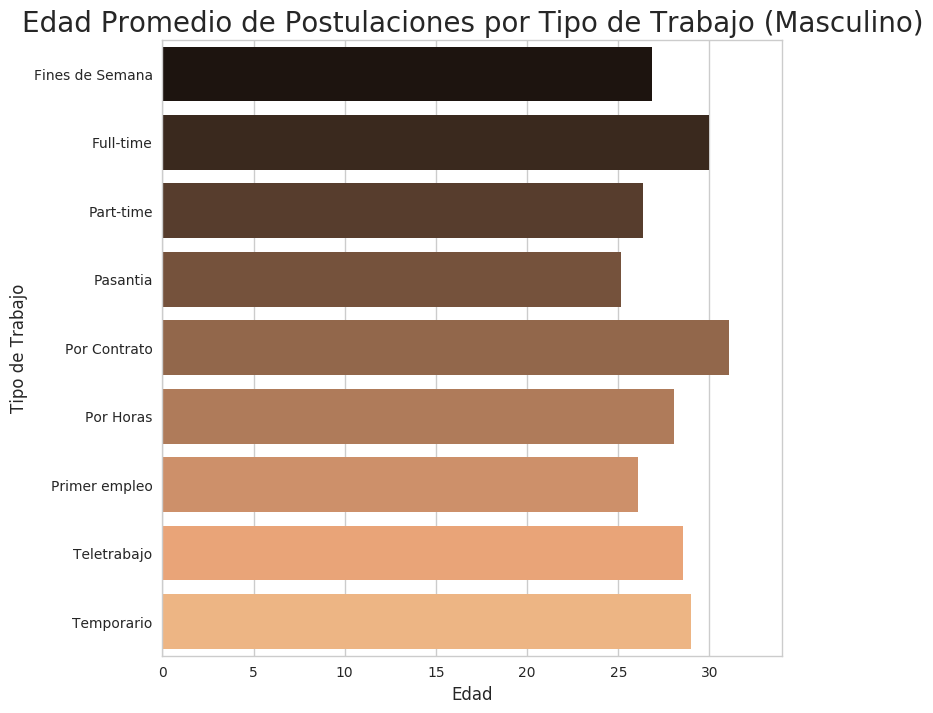

In [29]:
plt.subplots(figsize=(8,8))
grafico_tipo_edad_masculino=sns.barplot(y=tipo_edad_masculino.index,x=tipo_edad_masculino['Edad'],orient='h',palette="copper")
grafico_tipo_edad_masculino.set_title("Edad Promedio de Postulaciones por Tipo de Trabajo (Masculino)",fontsize=20)
grafico_tipo_edad_masculino.set_ylabel("Tipo de Trabajo",fontsize=12)
grafico_tipo_edad_masculino.set_xlabel("Edad",fontsize=12)
plt.xlim([0,34])

En la edad general puede verse que la menor edad prmedio en la que se Postulan es en las Pasantías, inclusive menor al tipo de Primer Trabajo, en contraparte, el mayor promedio es en tipo de Trabajo Por Contrato. Analizando por género, tanto en el femenino como en el masculino, no hay mucha diferencia con relación a la general, ya que el menor promedio puede verse en la pasantía mientras que el mayor en Por Contrato. Si comparamos por género, puede verse que el promedio de edad de pasantía es muy similar, siendo ligeramente menor el del femenino, en cambio, en el de mayor promedio, que es el de Por Contrato, hay una diferencia a favor del masculino de casi un año y medio de ventaja

### 4.5)  Tipos de Trabajo principales en Áreas de Trabajo principales

Lo que veremos a continuación es como se manejan los principales tipos de trabajo en las áreas principales, para este caso utilizaremos los tipos de Trabajo, Full-Time, Part-Time y Pasantías, por el hecho de que:

     • Full-Time por ser el tipo de trabajo en la mayor cantidad de avisos y de postulaciones
     • Part-Time por ser el segundo tipo de trabajo con la mayor cantidad de avisos, de postulaciones
     • Pasantía por ser el tipo de trabajo con menor promedio de edad y tercera en cantidad de postulaciones

### 4.5.A) Full-Time

In [116]:
tipo_area=avisos_detalle[['idaviso','Tipo_de_Trabajo','Nombre_Area']]
postulaciones_tipo_area=pd.merge(tipo_area,postulaciones,on='idaviso',how='inner')
postulaciones_full_area=postulaciones_tipo_area[(postulaciones_tipo_area['Tipo_de_Trabajo']=='Full-time')]
postulaciones_full_top=pd.merge(postulaciones_full_area,df_top_post,on='Nombre_Area',how='inner')
cantidad_full_top=postulaciones_full_top['Nombre_Area'].value_counts()
cantidad_full_top

Ventas                      319988
Administración              273955
Producción                  269713
Comercial                   188404
Atención al Cliente         135940
Recepcionista               124212
Tesorería                    69848
Mantenimiento y Limpieza     57183
Call Center                  48523
Telemarketing                17941
Name: Nombre_Area, dtype: int64

Text(0,0.5,'Área de Trabajo')

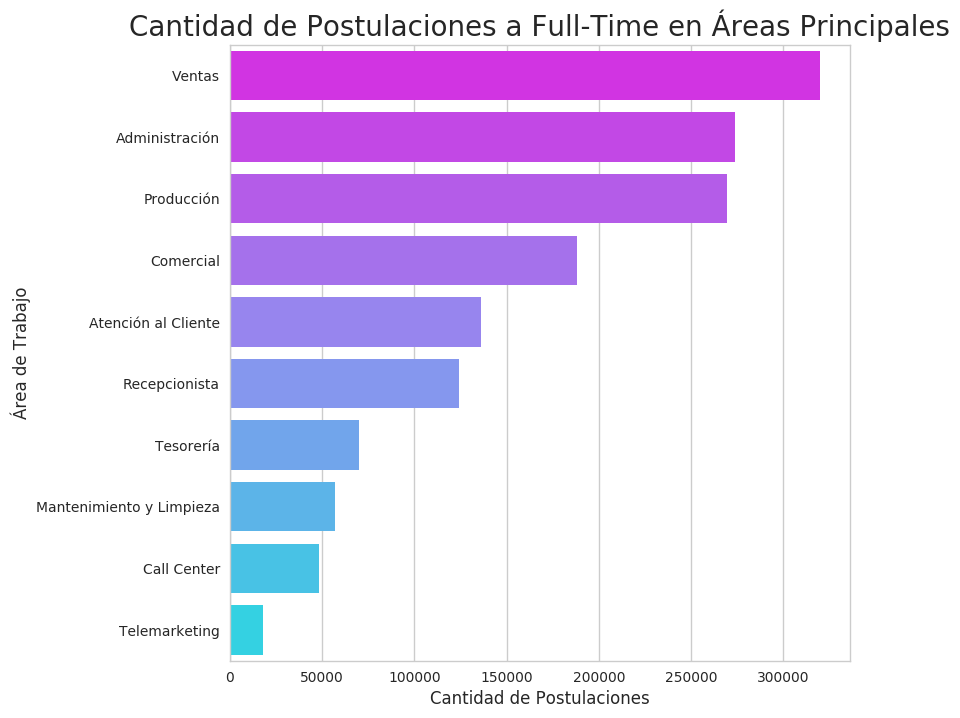

In [117]:
plt.subplots(figsize=(8,8))
grafico_cantidad_full_top=sns.barplot(x=cantidad_full_top.values,y=cantidad_full_top.index,orient='h',palette="cool_r")
grafico_cantidad_full_top.set_title("Cantidad de Postulaciones a Full-Time en Áreas Principales",fontsize=20)
grafico_cantidad_full_top.set_xlabel("Cantidad de Postulaciones",fontsize=12)
grafico_cantidad_full_top.set_ylabel("Área de Trabajo",fontsize=12)

Podemos ver que la cantidad de Postulaciones en Full-Time concuerda con el área de trabajo donde más postulaciones hay, siguiendo con la misma tendencia durante las cuatro primeras categorias, luego comienza a haber variaciones

### 4.5.B) Part-Time

In [118]:
postulaciones_part_area=postulaciones_tipo_area[(postulaciones_tipo_area['Tipo_de_Trabajo']=='Part-time')]
postulaciones_part_top=pd.merge(postulaciones_part_area,df_top_post,on='Nombre_Area',how='inner')
cantidad_part_top=postulaciones_part_top['Nombre_Area'].value_counts()
cantidad_part_top

Ventas                      85697
Call Center                 77907
Telemarketing               69565
Atención al Cliente         57334
Comercial                   25714
Administración              16157
Recepcionista               11789
Tesorería                    7663
Mantenimiento y Limpieza     3870
Producción                    108
Name: Nombre_Area, dtype: int64

Text(0,0.5,'Área de Trabajo')

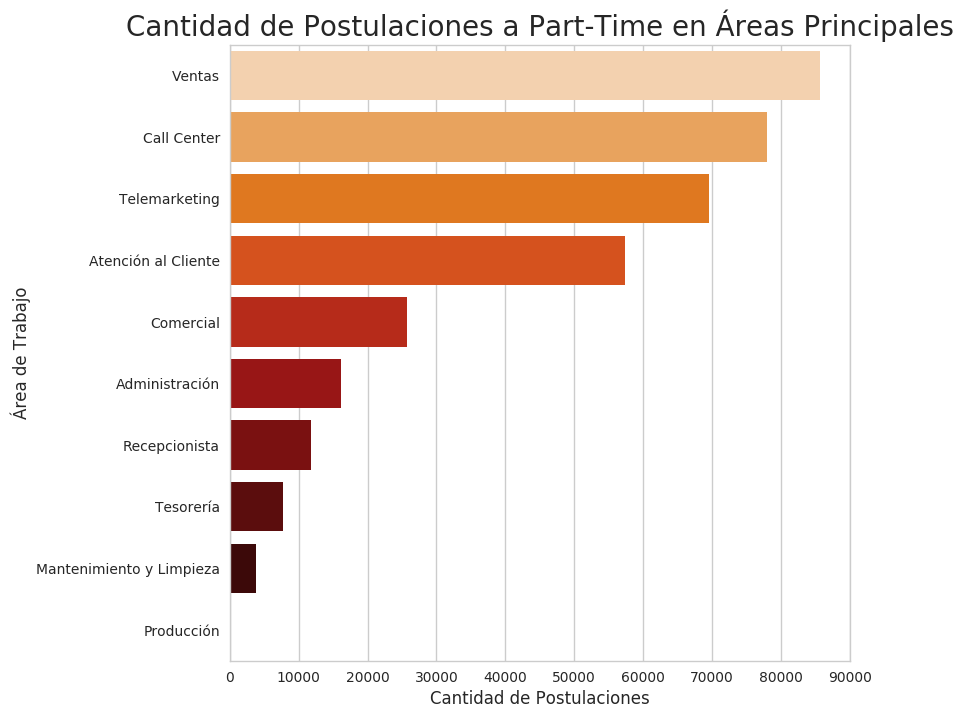

In [119]:
plt.subplots(figsize=(8,8))
grafico_cantidad_part_top=sns.barplot(x=cantidad_part_top.values,y=cantidad_part_top.index,orient='h',palette="gist_heat_r")
grafico_cantidad_part_top.set_title("Cantidad de Postulaciones a Part-Time en Áreas Principales",fontsize=20)
grafico_cantidad_part_top.set_xlabel("Cantidad de Postulaciones",fontsize=12)
grafico_cantidad_part_top.set_ylabel("Área de Trabajo",fontsize=12)

Podemos observar que Ventas sigue liderando como de costumbre mientras que Call Center está en el segundo lugar,y si se observa con atención la edad promedio de postulacion por área, Call Center era de las que tenía menor promedio de Edad junto con Telemarketing, lo cuál vale aclarar que en esta caso esta tercero. A lo que se quiere llegar es que, los promedios de edad más jóvenes tienden a buscar trabajo Part-Time

### 4.5.C) Pasantía

In [120]:
postulaciones_pasantia_area=postulaciones_tipo_area[(postulaciones_tipo_area['Tipo_de_Trabajo']=='Pasantia')]
postulaciones_pasantia_top=pd.merge(postulaciones_pasantia_area,df_top_post,on='Nombre_Area',how='inner')
cantidad_pasantia_top=postulaciones_pasantia_top['Nombre_Area'].value_counts()
cantidad_pasantia_top

Comercial         1921
Recepcionista     1212
Tesorería          438
Administración     174
Producción          30
Ventas              18
Name: Nombre_Area, dtype: int64

Text(0,0.5,'Área de Trabajo')

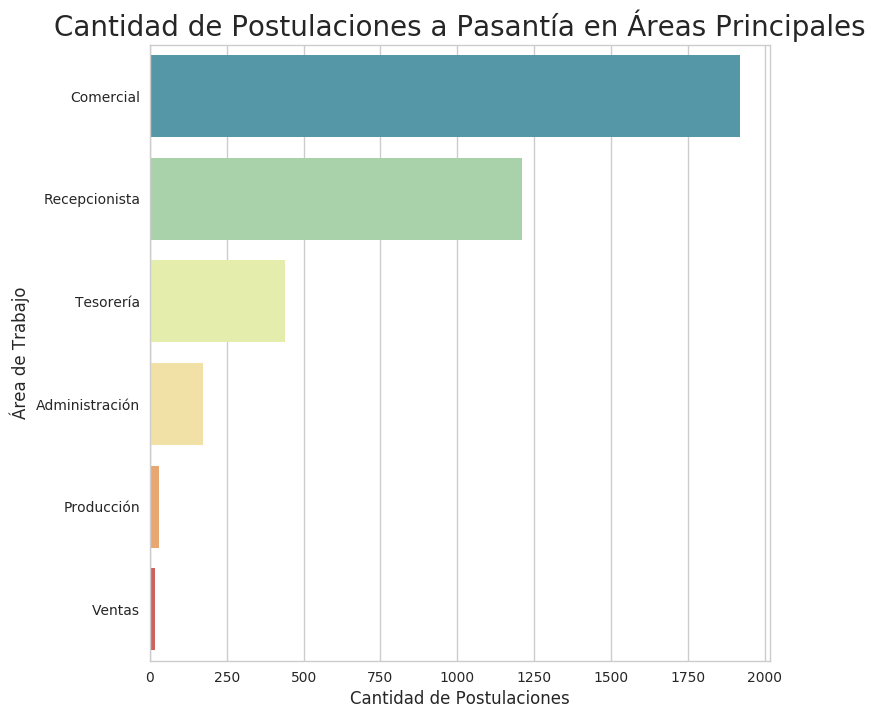

In [121]:
plt.subplots(figsize=(8,8))
grafico_cantidad_pasantia_top=sns.barplot(x=cantidad_pasantia_top.values,y=cantidad_pasantia_top.index,orient='h',palette="Spectral_r")
grafico_cantidad_pasantia_top.set_title("Cantidad de Postulaciones a Pasantía en Áreas Principales",fontsize=20)
grafico_cantidad_pasantia_top.set_xlabel("Cantidad de Postulaciones",fontsize=12)
grafico_cantidad_pasantia_top.set_ylabel("Área de Trabajo",fontsize=12)

Text(0,0.5,'Área de Trabajo')

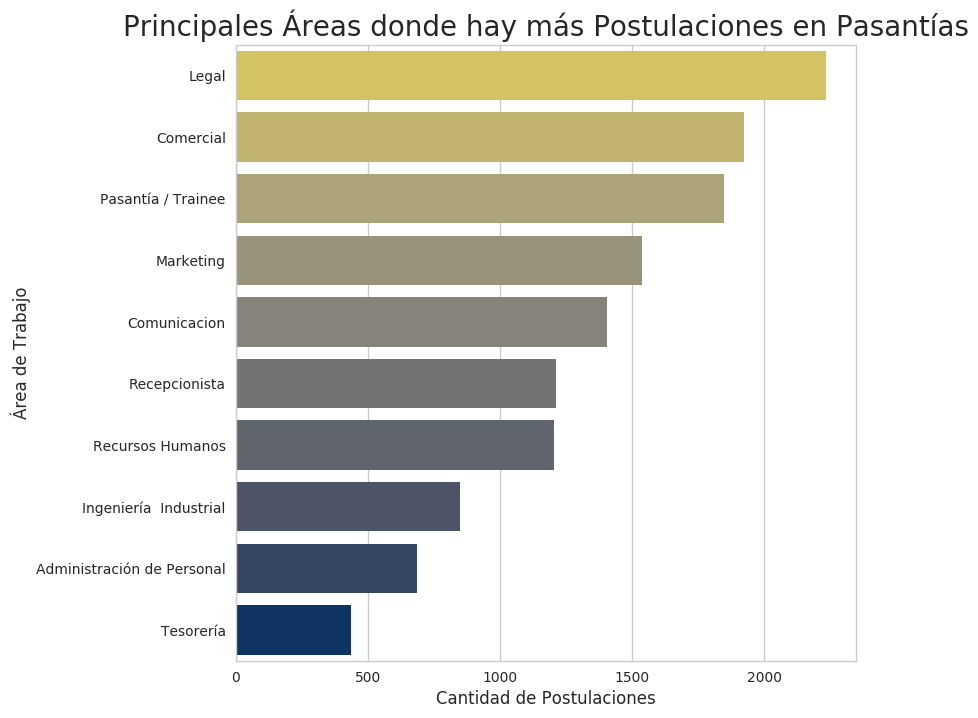

In [122]:
#Como hay poca cantidad de Pasantias en las áreas principales, veremos en donde hay más postulaciones en Pasantía
pasantias_mejores=postulaciones_pasantia_area['Nombre_Area'].value_counts().head(10)
plt.subplots(figsize=(8,8))
grafico_pasantias_mejores=sns.barplot(x=pasantias_mejores.values,y=pasantias_mejores.index,orient='h',palette="cividis_r")
grafico_pasantias_mejores.set_title("Principales Áreas donde hay más Postulaciones en Pasantías",fontsize=20)
grafico_pasantias_mejores.set_xlabel("Cantidad de Postulaciones",fontsize=12)
grafico_pasantias_mejores.set_ylabel("Área de Trabajo",fontsize=12)

Se puede ver que en las áreas principales de trabajo no hay tantas postulaciones en Pasantías por lo que decidimos ver cuales son las áreas de trabajo con mayor cantidad de Postulaciones en Pasantía y se pudo ver que lidera el área Legal, siguiendo con Comercial, la cuál pertenece al área de trabajo con mayor cantidad de Postulaciones. También se puede ver que solo cuatro de diez de las principales áreas donde hay postulaciones figuran en las principales áreas con más postulaciones en Pasantías

### 4.6) Tipo de Trabajo por Educación

### 4.6.A) Graduados

### 4.6.A.1) Full-Time y Part-Time

In [15]:
educacion_graduados=educacion[(educacion['Estado']=='Graduado')]
postulaciones_tipo_graduado=pd.merge(postulantes_tipo,educacion_graduados,on='idpostulante',how='inner')
postulaciones_tipo_graduado['Valor']=1
postulaciones_tipo_graduado_top=postulaciones_tipo_graduado[(postulaciones_tipo_graduado['Tipo_de_Trabajo']=='Full-time') | (postulaciones_tipo_graduado['Tipo_de_Trabajo']=='Part-time')]
pivot_postulaciones_tipo_graduado_top=postulaciones_tipo_graduado_top.pivot_table(index='Nivel',columns='Tipo_de_Trabajo',values='Valor',aggfunc='sum')
pivot_postulaciones_tipo_graduado_top

Tipo_de_Trabajo    Full-time  Part-time
Nivel                                  
Doctorado               1232         74
Master                 26719       1431
Otro                  300606      43631
Posgrado               65282       4047
Secundario           1486532     250080
Terciario/Técnico     381764      50156
Universitario         556570      39001

Text(70.7222,0.5,'Nivel de Educacion')

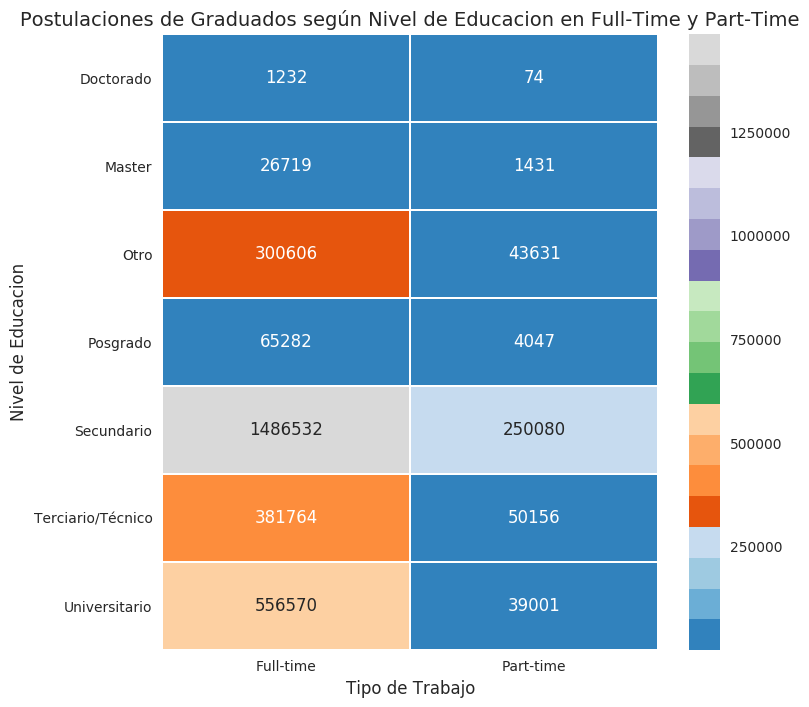

In [17]:
plt.subplots(figsize=(8,8))
grafico_pivot_postulaciones_tipo_graduado_top=sns.heatmap(pivot_postulaciones_tipo_graduado_top,linewidths=.5,fmt="d",annot=True,cmap="tab20c")
grafico_pivot_postulaciones_tipo_graduado_top.set_title("Postulaciones de Graduados según Nivel de Educacion en Full-Time y Part-Time",fontsize=14)
grafico_pivot_postulaciones_tipo_graduado_top.set_xlabel("Tipo de Trabajo",fontsize=12)
grafico_pivot_postulaciones_tipo_graduado_top.set_ylabel("Nivel de Educacion",fontsize=12)

### 4.6.A.2) Resto

In [19]:
postulaciones_tipo_graduado_resto=postulaciones_tipo_graduado[(postulaciones_tipo_graduado['Tipo_de_Trabajo'] != 'Full-time') & (postulaciones_tipo_graduado['Tipo_de_Trabajo'] != 'Part-time')]
pivot_postulaciones_tipo_graduado_resto=postulaciones_tipo_graduado_resto.pivot_table(index='Nivel',columns='Tipo_de_Trabajo',values='Valor',aggfunc='sum')
pivot_postulaciones_tipo_graduado_resto.fillna(0,inplace=True)
pivot_postulaciones_tipo_graduado_resto

Tipo_de_Trabajo    Fines de Semana  Pasantia  Por Contrato  Por Horas  \
Nivel                                                                   
Doctorado                      0.0       3.0           1.0        0.0   
Master                         3.0      63.0          83.0       60.0   
Otro                         211.0    1499.0         474.0     1321.0   
Posgrado                      50.0     180.0         192.0      167.0   
Secundario                  1067.0    7522.0        1767.0     7419.0   
Terciario/Técnico            272.0    1831.0         559.0     1263.0   
Universitario                406.0    3046.0        1294.0     1061.0   

Tipo_de_Trabajo    Primer empleo  Teletrabajo  Temporario  
Nivel                                                      
Doctorado                    0.0          3.0         7.0  
Master                       1.0         77.0        65.0  
Otro                        15.0        554.0      1122.0  
Posgrado                     6.0        158.0       157.0  
Secundario                  70.0       2039.0      5771.0  
Terciario/Técnico           26.0        552.0      1336.0  
Universitario               21.0        944.0      1415.0

[Text(0.5,0,'Fines de Semana'),
 Text(1.5,0,'Pasantia'),
 Text(2.5,0,'Por Contrato'),
 Text(3.5,0,'Por Horas'),
 Text(4.5,0,'Primer empleo'),
 Text(5.5,0,'Teletrabajo'),
 Text(6.5,0,'Temporario')]

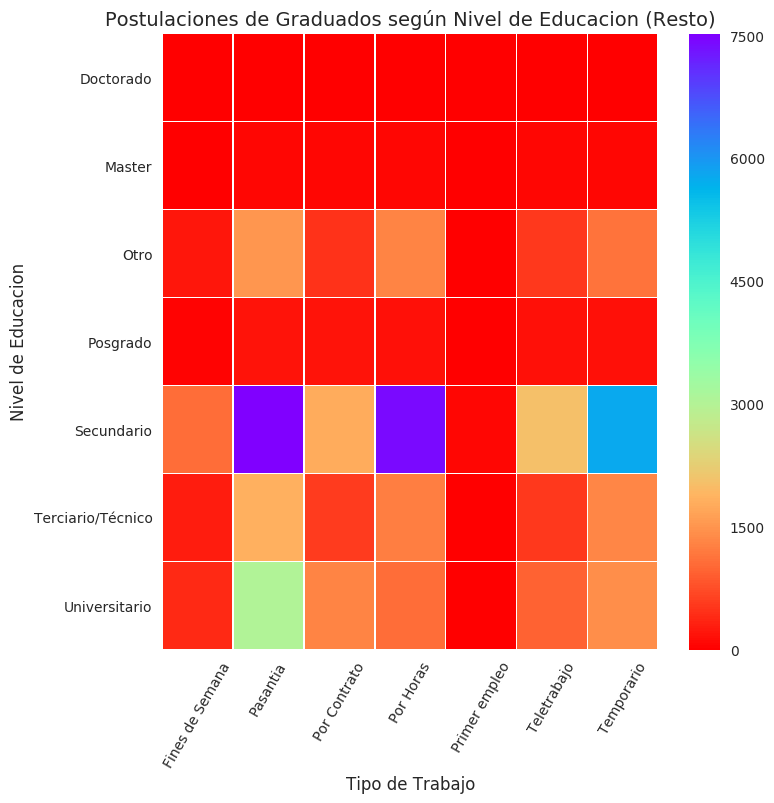

In [27]:
plt.subplots(figsize=(8,8))
grafico_pivot_postulaciones_tipo_graduado_resto=sns.heatmap(pivot_postulaciones_tipo_graduado_resto,linewidths=.5,cmap="rainbow_r")
grafico_pivot_postulaciones_tipo_graduado_resto.set_title("Postulaciones de Graduados según Nivel de Educacion (Resto)",fontsize=14)
grafico_pivot_postulaciones_tipo_graduado_resto.set_xlabel("Tipo de Trabajo",fontsize=12)
grafico_pivot_postulaciones_tipo_graduado_resto.set_ylabel("Nivel de Educacion",fontsize=12)
grafico_pivot_postulaciones_tipo_graduado_resto.set_xticklabels(grafico_pivot_postulaciones_tipo_graduado_resto.get_xticklabels(),rotation=60)

### 4.6.B) En Curso

### 4.6.B.1) Full-Time y Part-Time

In [30]:
educacion_cursando=educacion[(educacion['Estado']=='En Curso')]
postulaciones_tipo_cursando=pd.merge(postulantes_tipo,educacion_cursando,on='idpostulante',how='inner')
postulaciones_tipo_cursando['Valor']=1
postulaciones_tipo_cursando_top=postulaciones_tipo_cursando[(postulaciones_tipo_cursando['Tipo_de_Trabajo']=='Full-time') | (postulaciones_tipo_cursando['Tipo_de_Trabajo']=='Part-time')]
pivot_postulaciones_tipo_cursando_top=postulaciones_tipo_cursando_top.pivot_table(index='Nivel',columns='Tipo_de_Trabajo',values='Valor',aggfunc='sum')
pivot_postulaciones_tipo_cursando_top

Tipo_de_Trabajo    Full-time  Part-time
Nivel                                  
Doctorado               1407        213
Master                 20933        995
Otro                   79262      12445
Posgrado               28688       2065
Secundario             46407       6778
Terciario/Técnico     210800      41126
Universitario         721841     148122

Text(70.7222,0.5,'Nivel de Educacion')

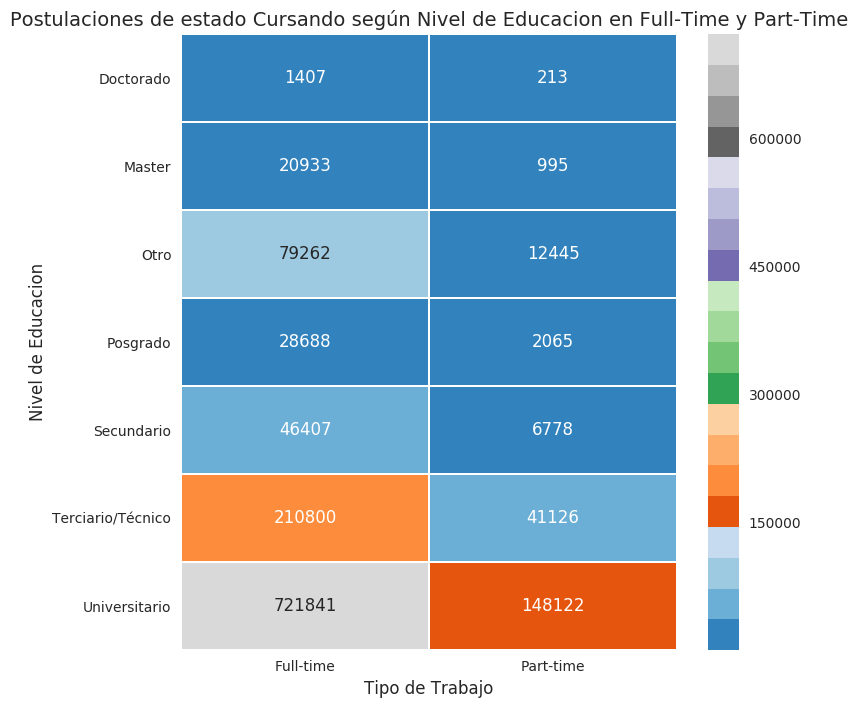

In [31]:
plt.subplots(figsize=(8,8))
grafico_pivot_postulaciones_tipo_cursando_top=sns.heatmap(pivot_postulaciones_tipo_cursando_top,linewidths=.5,fmt="d",annot=True,cmap="tab20c")
grafico_pivot_postulaciones_tipo_cursando_top.set_title("Postulaciones de estado Cursando según Nivel de Educacion en Full-Time y Part-Time",fontsize=14)
grafico_pivot_postulaciones_tipo_cursando_top.set_xlabel("Tipo de Trabajo",fontsize=12)
grafico_pivot_postulaciones_tipo_cursando_top.set_ylabel("Nivel de Educacion",fontsize=12)

### 4.6.B.2) Resto

In [34]:
postulaciones_tipo_cursando_resto=postulaciones_tipo_cursando[(postulaciones_tipo_cursando['Tipo_de_Trabajo'] != 'Full-time') & (postulaciones_tipo_cursando['Tipo_de_Trabajo'] != 'Part-time')]
pivot_postulaciones_tipo_cursando_resto=postulaciones_tipo_cursando_resto.pivot_table(index='Nivel',columns='Tipo_de_Trabajo',values='Valor',aggfunc='sum')
pivot_postulaciones_tipo_cursando_resto.fillna(0,inplace=True)
pivot_postulaciones_tipo_cursando_resto

Tipo_de_Trabajo    Fines de Semana  Pasantia  Por Contrato  Por Horas  \
Nivel                                                                   
Doctorado                      0.0       4.0           7.0        5.0   
Master                         7.0      84.0          57.0       31.0   
Otro                          54.0     449.0         114.0      300.0   
Posgrado                      20.0     161.0          72.0       60.0   
Secundario                    73.0     138.0          45.0      515.0   
Terciario/Técnico            168.0    1035.0         265.0      851.0   
Universitario                351.0   10408.0        1016.0     2121.0   

Tipo_de_Trabajo    Primer empleo  Teletrabajo  Temporario  
Nivel                                                      
Doctorado                    0.0          0.0         2.0  
Master                       1.0         55.0        44.0  
Otro                         5.0        136.0       285.0  
Posgrado                     1.0         41.0        67.0  
Secundario                   2.0         65.0       177.0  
Terciario/Técnico           17.0        362.0       772.0  
Universitario               54.0       1193.0      2536.0

[Text(0.5,0,'Fines de Semana'),
 Text(1.5,0,'Pasantia'),
 Text(2.5,0,'Por Contrato'),
 Text(3.5,0,'Por Horas'),
 Text(4.5,0,'Primer empleo'),
 Text(5.5,0,'Teletrabajo'),
 Text(6.5,0,'Temporario')]

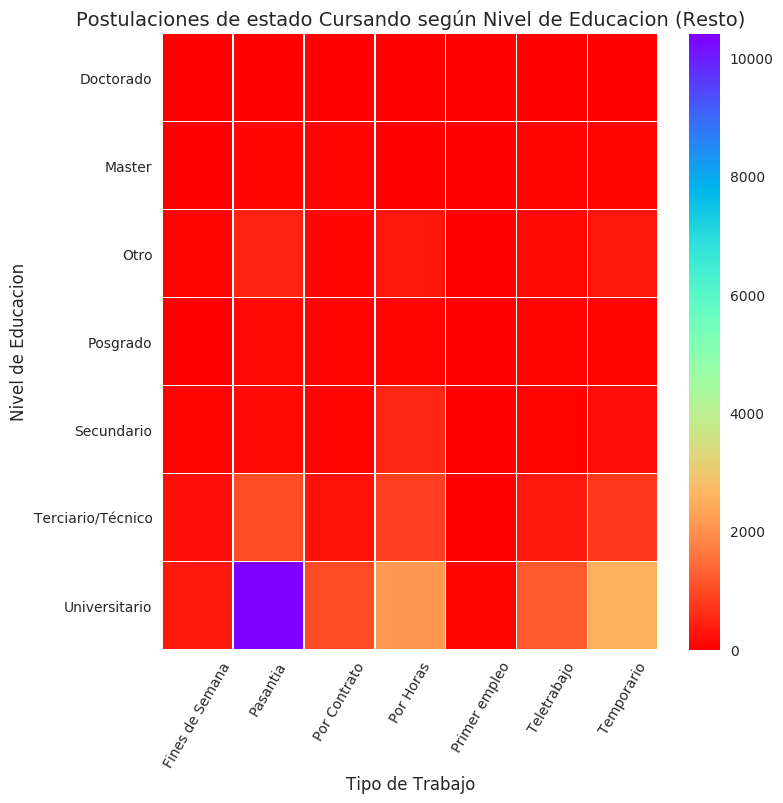

In [35]:
plt.subplots(figsize=(8,8))
grafico_pivot_postulaciones_tipo_cursando_resto=sns.heatmap(pivot_postulaciones_tipo_cursando_resto,linewidths=.5,cmap="rainbow_r")
grafico_pivot_postulaciones_tipo_cursando_resto.set_title("Postulaciones de estado Cursando según Nivel de Educacion (Resto)",fontsize=14)
grafico_pivot_postulaciones_tipo_cursando_resto.set_xlabel("Tipo de Trabajo",fontsize=12)
grafico_pivot_postulaciones_tipo_cursando_resto.set_ylabel("Nivel de Educacion",fontsize=12)
grafico_pivot_postulaciones_tipo_cursando_resto.set_xticklabels(grafico_pivot_postulaciones_tipo_cursando_resto.get_xticklabels(),rotation=60)

### 4.7) Conclusion General

En este apartado pudimos observar que el tipo de trabajo Full-Time es el que predomina en todas las áreas, ya sea cantidad de avisos, de Postulaciones y de vistas, seguido por Part-Time aunque con una diferencia importante. También pudimos ver que en las postulaciones por género en los primeros puestos sigue la tendencia comentada anteriormente, en cambio en los ultimos puestos se puede llegar a notar una diferencia.En el caso de la edad no hay demasiadas diferenias ya sea en la general o la de por género, en primer lugar se encuentra Por Contrato como mayor promedio de edad mientras que la Pasantía es la de menor edad. Y por último, viendo en detenimiento los principales tipos de trabajo en relaciones con las áreas de trabajo, pudimos observar que hay diferencias bien marcadas entre los tres tipos que se analizaron, aunque en dos de las tres Ventas se mantuvo en la delantera.

## 5) Nivel Laboral

### 5.1) ¿Qué niveles laborales hay en los avisos publicados y en que cantidad?

In [123]:
tipo_nivel_trabajo=avisos_detalle['Nivel_Laboral'].value_counts()
tipo_nivel_trabajo

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: Nivel_Laboral, dtype: int64

Text(0,0.5,'Tipo de Nivel Laboral')

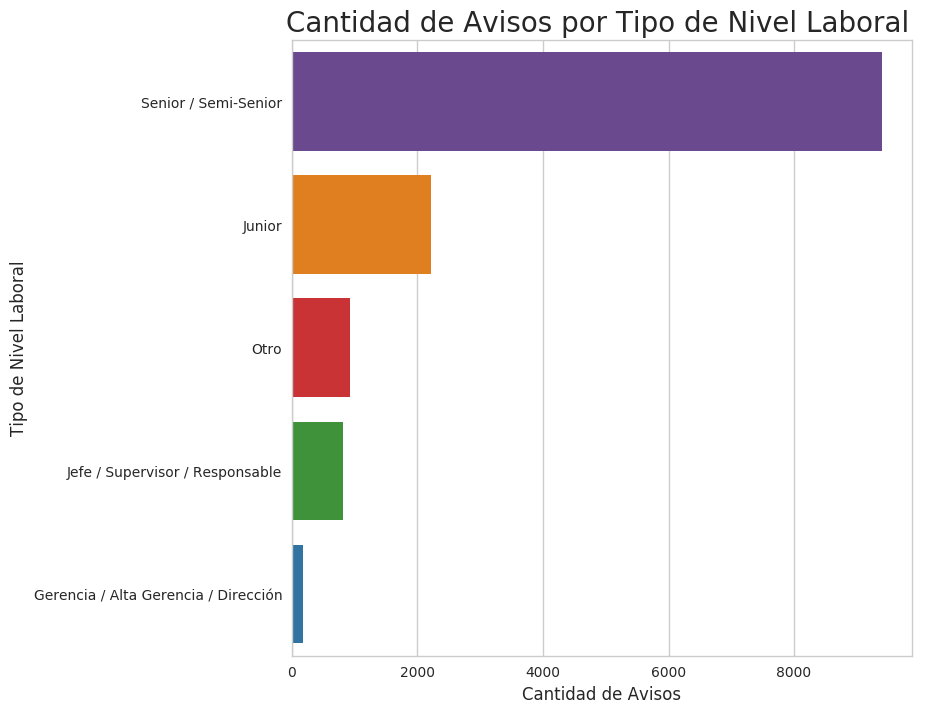

In [124]:
plt.subplots(figsize=(8,8))
grafico_tipo_nivel_trabajo=sns.barplot(x=tipo_nivel_trabajo.values,y=tipo_nivel_trabajo.index,orient='h',palette="Paired_r")
grafico_tipo_nivel_trabajo.set_title("Cantidad de Avisos por Tipo de Nivel Laboral ",fontsize=20)
grafico_tipo_nivel_trabajo.set_xlabel("Cantidad de Avisos",fontsize=12)
grafico_tipo_nivel_trabajo.set_ylabel("Tipo de Nivel Laboral",fontsize=12)

La mayor cantidad de avisos tienen un nivel Senior / Semi-Senior con una amplia mayoria, luego le sigue Junior y a partir de ello, la comienzan a decrecer la cantidad de avisos pero de manera paulatina

### 5.2) Niveles laborales en Postulaciones y Vistas

### 5.2.A) Postulaciones

In [10]:
nivel_trabajo=avisos_detalle[['idaviso','Nivel_Laboral','Nombre_Area']]
postulaciones_nivel_trabajo=pd.merge(postulaciones,nivel_trabajo,on='idaviso',how='inner')
cantidad_nivel_trabajo_postulaciones=postulaciones_nivel_trabajo['Nivel_Laboral'].value_counts()
cantidad_nivel_trabajo_postulaciones

Senior / Semi-Senior                    2017228
Junior                                   690632
Otro                                     258204
Jefe / Supervisor / Responsable           84469
Gerencia / Alta Gerencia / Dirección      23673
Name: Nivel_Laboral, dtype: int64

Text(0,0.5,'Tipo de Nivel Laboral')

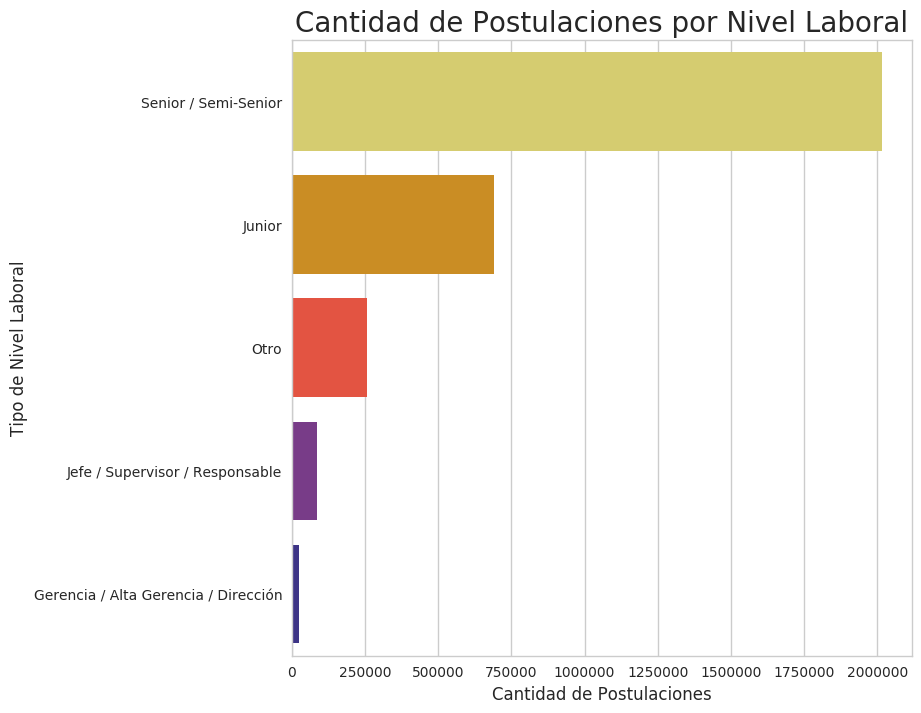

In [126]:
plt.subplots(figsize=(8,8))
grafico_cantidad_nivel_trabajo_postulaciones=sns.barplot(x=cantidad_nivel_trabajo_postulaciones.values,y=cantidad_nivel_trabajo_postulaciones.index,orient='h',palette="CMRmap_r")
grafico_cantidad_nivel_trabajo_postulaciones.set_title("Cantidad de Postulaciones por Nivel Laboral",fontsize=20)
grafico_cantidad_nivel_trabajo_postulaciones.set_xlabel("Cantidad de Postulaciones",fontsize=12)
grafico_cantidad_nivel_trabajo_postulaciones.set_ylabel("Tipo de Nivel Laboral",fontsize=12)

### 5.2.B) Por Vistas

In [127]:
vistas_nivel_trabajo=pd.merge(vistas,nivel_trabajo,on='idaviso',how='inner')
cantidad_nivel_trabajo_vistas=vistas_nivel_trabajo['Nivel_Laboral'].value_counts()
cantidad_nivel_trabajo_vistas

Senior / Semi-Senior                    617012
Junior                                  216640
Otro                                     81296
Jefe / Supervisor / Responsable          35658
Gerencia / Alta Gerencia / Dirección     11291
Name: Nivel_Laboral, dtype: int64

Text(0,0.5,'Tipo de Nivel Laboral')

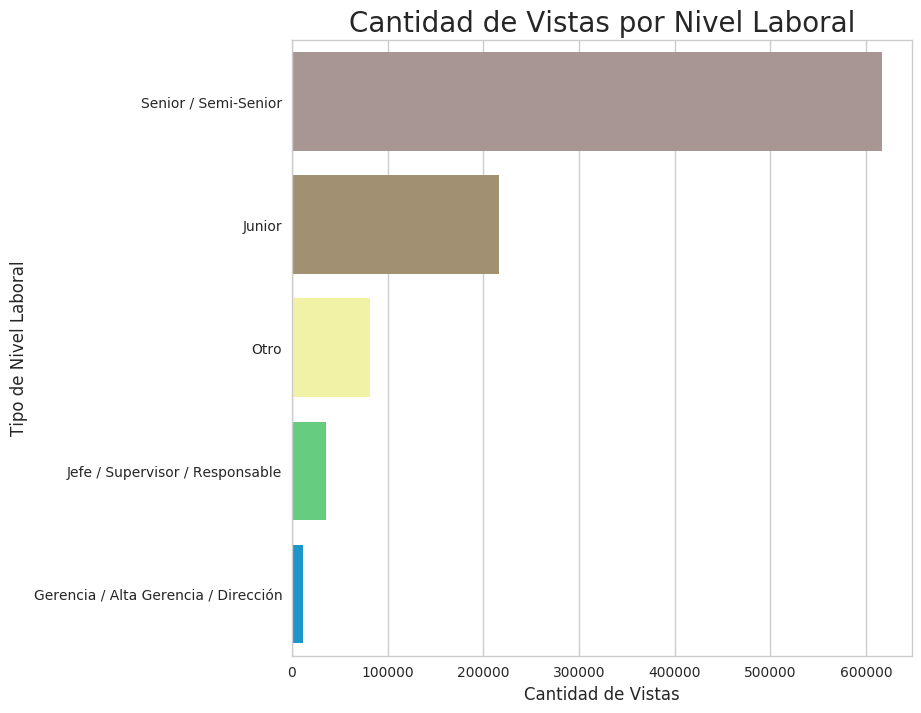

In [128]:
plt.subplots(figsize=(8,8))
grafico_cantidad_nivel_trabajo_vistas=sns.barplot(x=cantidad_nivel_trabajo_vistas.values,y=cantidad_nivel_trabajo_vistas.index,orient='h',palette="terrain_r")
grafico_cantidad_nivel_trabajo_vistas.set_title("Cantidad de Vistas por Nivel Laboral",fontsize=20)
grafico_cantidad_nivel_trabajo_vistas.set_xlabel("Cantidad de Vistas",fontsize=12)
grafico_cantidad_nivel_trabajo_vistas.set_ylabel("Tipo de Nivel Laboral",fontsize=12)

Tanto en la cantidad de Vistas como de Postulaciones no hay ningun tipo de diferencia entre ellos y tampoco en relación con los avisos, en ambos Senior / Semi-Senior lidera con superioridad seguido por Junior pero con una diferencia importante, luego comienza a decrecer pero en ambas la posición de cada Nivel se mantiene

### 5.3) Cantidad de Postulaciones por Nivel Laboral en relación al Genero

In [34]:
postulaciones_nivel_trabajo_femenino=pd.merge(postulaciones_nivel_trabajo,genero_femenino,on='idpostulante',how='inner')
postulaciones_nivel_trabajo_masculino=pd.merge(postulaciones_nivel_trabajo,genero_masculino,on='idpostulante',how='inner')
cantidad_nivel_trabajo_general=postulaciones_nivel_trabajo_femenino['Nivel_Laboral'].value_counts().sort_index().reset_index()
cantidad_nivel_trabajo_masculino=postulaciones_nivel_trabajo_masculino['Nivel_Laboral'].value_counts().sort_index().reset_index()
cantidad_nivel_trabajo_general.rename(columns={'index':'Nivel_Laboral','Nivel_Laboral':'Femenino'},inplace=True)
cantidad_nivel_trabajo_general['Masculino']=cantidad_nivel_trabajo_masculino['Nivel_Laboral']
cantidad_nivel_trabajo_general.set_index('Nivel_Laboral',inplace=True)
cantidad_nivel_trabajo_general

Femenino  Masculino
Nivel_Laboral                                            
Gerencia / Alta Gerencia / Dirección      6860      16557
Jefe / Supervisor / Responsable          26042      57456
Junior                                  370128     311860
Otro                                    131827     122473
Senior / Semi-Senior                   1000619     990902

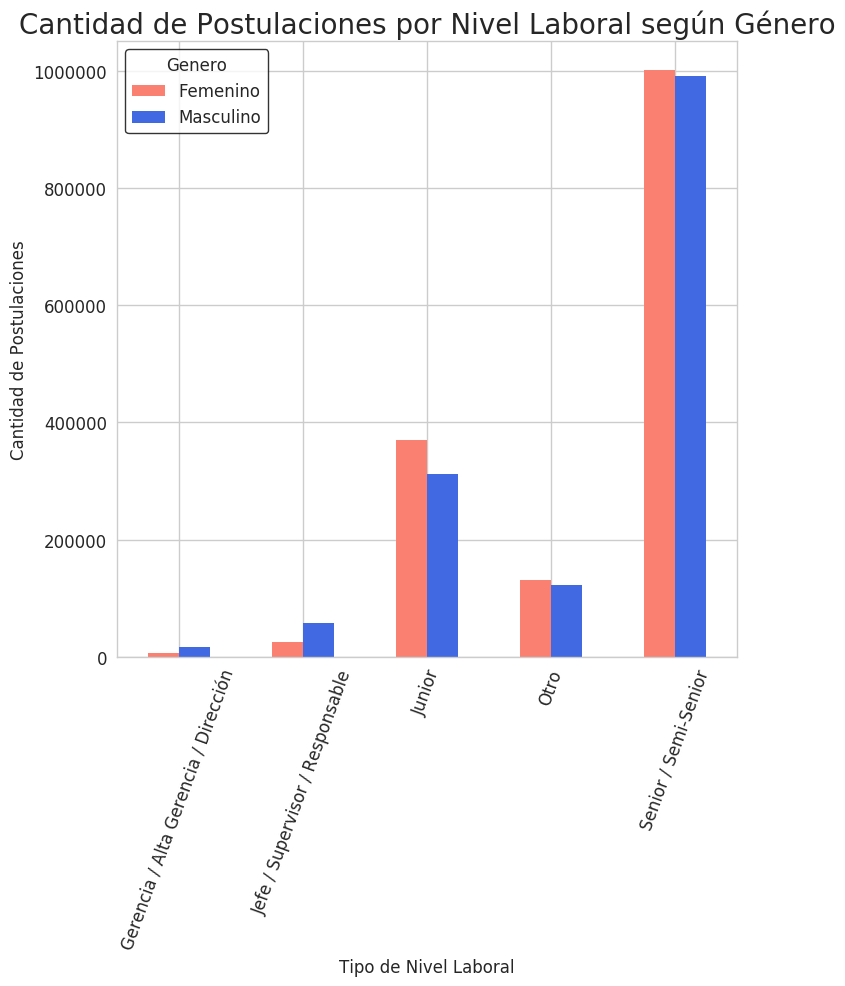

In [35]:
grafico_cantidad_nivel_trabajo_general=cantidad_nivel_trabajo_general.plot(kind='bar',figsize=(8,8),fontsize=12,color=['salmon','royalblue'],rot=70)
grafico_cantidad_nivel_trabajo_general.set_title("Cantidad de Postulaciones por Nivel Laboral según Género",fontsize=20)
grafico_cantidad_nivel_trabajo_general.set_xlabel("Tipo de Nivel Laboral",fontsize=12)
grafico_cantidad_nivel_trabajo_general.set_ylabel("Cantidad de Postulaciones",fontsize=12)
leyenda=plt.legend(["Femenino","Masculino"],fontsize=12,title='Genero',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

Podemos ver que en los niveles de trabajo principales, ya sea Senior / Semi-Senior y Junior son los que lideran en ambos géneros aunque habiendo más mujeres que hombres en relación a la cantidad de postulaciones. Donde se difiere en el Gerencia y Jefe, donde puede observarse una tendencia significativa para el género Masculino, donde lo supera con casi el doble de las postulaciones

### 5.4) Niveles de Trabajo en las Áreas Principales

Debido a la gran cantidad de diferencia que hay entre los principales Niveles Laborales, decidimos dividirlos en dos para poder analizar con mayor profundidad, los dividimos en Principales (Senior / Semi-Senior-Junior-Otro) y en Resto (Jefe / Supervisor / Responsable-Gerencia / Alta Gerencia / Dirección)

### 5.4.A) Principales

In [11]:
postulaciones_nivel_trabajo_top=pd.merge(postulaciones_nivel_trabajo,df_top_post,on='Nombre_Area',how='inner')
postulaciones_nivel_trabajo_top['Valor']=1
postulaciones_nivel_top_trabajo_top=postulaciones_nivel_trabajo_top[(postulaciones_nivel_trabajo_top['Nivel_Laboral']=='Junior') | (postulaciones_nivel_trabajo_top['Nivel_Laboral']=='Otro') | (postulaciones_nivel_trabajo_top['Nivel_Laboral']=='Senior / Semi-Senior')]
pivot_top_nivel_top=postulaciones_nivel_top_trabajo_top.pivot_table(index='Nombre_Area',columns='Nivel_Laboral',values='Valor',aggfunc='sum')
pivot_top_nivel_top

Nivel_Laboral             Junior   Otro  Senior / Semi-Senior
Nombre_Area                                                  
Administración             89792  19206                172923
Atención al Cliente        71054  14141                108420
Call Center                34558  20737                 69473
Comercial                  36354  17592                152878
Mantenimiento y Limpieza   11358  16118                 35568
Producción                 45292  31717                191726
Recepcionista              33759  14144                 89582
Telemarketing              32989   8848                 45590
Tesorería                  23145   5846                 49209
Ventas                     65843  27298                303145

Text(70.7222,0.5,'Área de Trabajo')

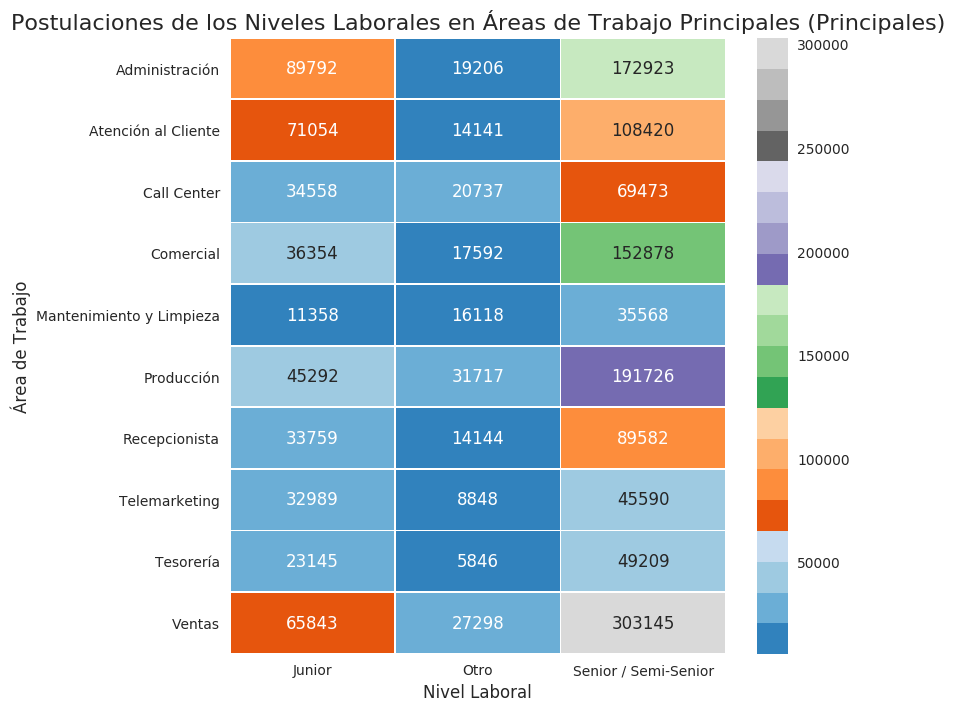

In [131]:
plt.subplots(figsize=(8,8))
grafico_pivot_top_nivel_top=sns.heatmap(pivot_top_nivel_top,linewidths=.5,fmt="d",annot=True,cmap="tab20c")
grafico_pivot_top_nivel_top.set_title("Postulaciones de los Niveles Laborales en Áreas de Trabajo Principales (Principales)",fontsize=16)
grafico_pivot_top_nivel_top.set_xlabel("Nivel Laboral",fontsize=12)
grafico_pivot_top_nivel_top.set_ylabel("Área de Trabajo",fontsize=12)

Podemos ver que en el nivel de Otro es el que menor cantidad de postulaciones hay en todas las áreas de trabajo, si seguimos por Junior, se puede ver que Administración lidera, seguido por Atención al Cliente y por último Ventas, habiendo una gran diferencia entre este último y el resto, siendo el que le sigue por detras con una diferencia de casi 20000 postulaciones. En el sector de Senior / Semi-Senior, Ventas posee una amplia superioridad y una diferencia importante con respecto al segundo, el cuál en este caso es Producción, área que no había aparecido en ninguna de los otros niveles Principales. Luego comienza a decrecer de manera paulatina hasta llegar a las últimas áreas, en este caso conformadas por Mantenimiento y Limpieza (cabe destacar que esta área tiene una poca cantidad en todos los niveles de trabajo, quedando siempre última) Telemarketing y Tesorería,lo curioso es que todas estas categrias se encuentran a lo último en todos lo niveles Principales

### 5.4.B) Resto

In [132]:
postulaciones_nivel_resto_trabajo_top=postulaciones_nivel_trabajo_top[(postulaciones_nivel_trabajo_top['Nivel_Laboral']=='Gerencia / Alta Gerencia / Dirección') | (postulaciones_nivel_trabajo_top['Nivel_Laboral']=='Jefe / Supervisor / Responsable')]
pivot_resto_nivel_top=postulaciones_nivel_resto_trabajo_top.pivot_table(index='Nombre_Area',columns='Nivel_Laboral',values='Valor',aggfunc='sum')
pivot_resto_nivel_top.fillna(0,inplace=True)
pivot_resto_nivel_top

Nivel_Laboral             Gerencia / Alta Gerencia / Dirección  \
Nombre_Area                                                      
Administración                                          3866.0   
Atención al Cliente                                        4.0   
Call Center                                                0.0   
Comercial                                               4619.0   
Mantenimiento y Limpieza                                   0.0   
Producción                                              1135.0   
Telemarketing                                             79.0   
Tesorería                                                  0.0   
Ventas                                                  3391.0   

Nivel_Laboral             Jefe / Supervisor / Responsable  
Nombre_Area                                                
Administración                                     5348.0  
Atención al Cliente                                2017.0  
Call Center                                        1662.0  
Comercial                                          5234.0  
Mantenimiento y Limpieza                            264.0  
Producción                                         7219.0  
Telemarketing                                         0.0  
Tesorería                                           250.0  
Ventas                                             8471.0

[Text(0.5,0,'Gerencia / Alta Gerencia / Dirección'),
 Text(1.5,0,'Jefe / Supervisor / Responsable')]

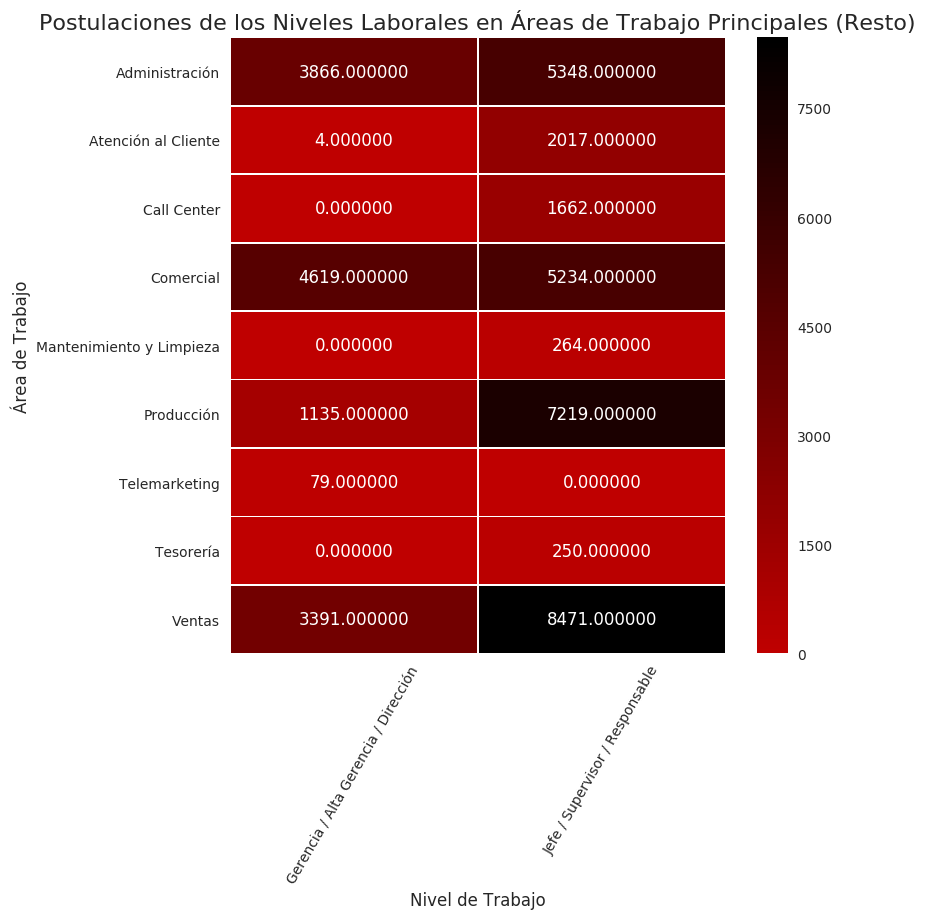

In [134]:
plt.subplots(figsize=(8,8))
grafico_pivot_resto_nivel_top=sns.heatmap(pivot_resto_nivel_top,linewidths=.5,center=0,fmt="f",annot=True,cmap="gist_heat_r")
grafico_pivot_resto_nivel_top.set_title("Postulaciones de los Niveles Laborales en Áreas de Trabajo Principales (Resto)",fontsize=16)
grafico_pivot_resto_nivel_top.set_xlabel("Nivel de Trabajo",fontsize=12)
grafico_pivot_resto_nivel_top.set_ylabel("Área de Trabajo",fontsize=12)
grafico_pivot_resto_nivel_top.set_xticklabels(grafico_pivot_resto_nivel_top.get_xticklabels(),rotation=60)

Mucha diferencia con relación a los niveles principales no hay, las que lideran son generalmente las mismas áreas, en Jefe / Supervisor / Responsable lidera Ventas, seguida por Producción y Administración, en cambio para Gerencia / Alta Gerencia / Dirección, Comercial es la que se encuentra en primer lugar, seguido por Administración y luego Ventas. Lo inusual es la diferencia que hay entre ambos niveles en Producción, mientras que en uno se encuentra segundo, en el otro se encuentra casi en la mitad. En los últimos puestos se encuentran los mismos de siempre, aunque la diferencia es que no hay postulaciones en lo que se refiere a Gerencia / Alta Gerencia / Dirección

### 5.5) Nivel de Trabajo en relación con Tipos de Trabajo

### 5.5.A) Por Avisos

### 5.5.A.1) Full-Time y Part-Time

In [20]:
nivel_laboral_tipo_trabajo=avisos_detalle[['idaviso','Nombre_Area','Tipo_de_Trabajo','Nivel_Laboral']]
nivel_laboral_tipo_trabajo['Valor']=1
nivel_laboral_tipo_trabajo_top=nivel_laboral_tipo_trabajo[(nivel_laboral_tipo_trabajo['Tipo_de_Trabajo']=='Full-time') | (nivel_laboral_tipo_trabajo['Tipo_de_Trabajo']=='Part-time')]
pivot_nivel_laboral_tipo_trabajo_top=nivel_laboral_tipo_trabajo_top.pivot_table(index='Tipo_de_Trabajo',columns='Nivel_Laboral',values='Valor',aggfunc='sum')
pivot_nivel_laboral_tipo_trabajo_top

/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Nivel_Laboral    Gerencia / Alta Gerencia / Dirección  \
Tipo_de_Trabajo                                         
Full-time                                         179   
Part-time                                           1   

Nivel_Laboral    Jefe / Supervisor / Responsable  Junior  Otro  \
Tipo_de_Trabajo                                                  
Full-time                                    745    1777   751   
Part-time                                      7     350   132   

Nivel_Laboral    Senior / Semi-Senior  
Tipo_de_Trabajo                        
Full-time                        8887  
Part-time                         373

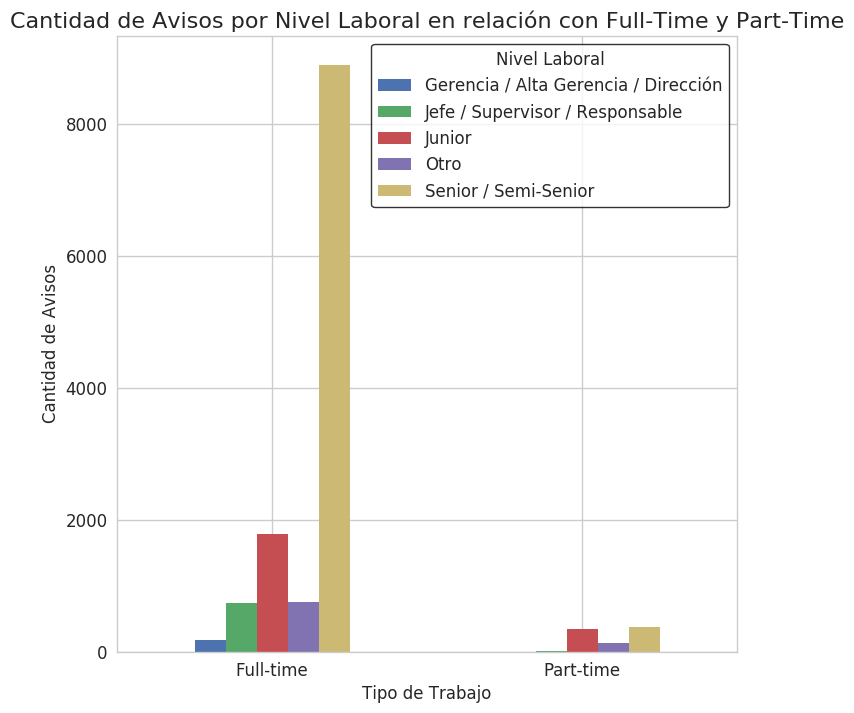

In [13]:
grafico_pivot_nivel_laboral_tipo_trabajo_top=pivot_nivel_laboral_tipo_trabajo_top.plot(kind='bar',figsize=(8,8),fontsize=12,rot=0)
grafico_pivot_nivel_laboral_tipo_trabajo_top.set_title("Cantidad de Avisos por Nivel Laboral en relación con Full-Time y Part-Time",fontsize=16)
grafico_pivot_nivel_laboral_tipo_trabajo_top.set_xlabel("Tipo de Trabajo",fontsize=12)
grafico_pivot_nivel_laboral_tipo_trabajo_top.set_ylabel("Cantidad de Avisos",fontsize=12)
leyenda=plt.legend(["Gerencia / Alta Gerencia / Dirección","Jefe / Supervisor / Responsable","Junior","Otro","Senior / Semi-Senior"],fontsize=12,title='Nivel Laboral',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

Podemos ver en Full-Time que la mayor cantidad de avisos son de tipo Senior / Semi-Senior, seguido por Junior, luego puede verse que Otro y Jefe / Supervisor / Responsable tienen una cantidad muy similar y luego en menor cantidad hay Gerencia / Alta Gerencia / Dirección. En cambio en Part-Time, Senior / Semi-Senior es la que mayor cantidad de avisos tiene pero o hay una diferencia tan marcada como sucede en Full-Time, luego le sigue Otro y en menor cantidad los demas. Si se los compara entre los tipos de trabajo, sin sorpresa alguno Full-Time supera en todos los Niveles a Part-Time, lo cuál tiene sentido ya que, como habíamos visto anteriormente, la cantidad de avisos Full-Time supera por mucho a la cantidad de avisos de Part-Time

### 5.5.A.2) Resto

In [21]:
nivel_laboral_tipo_trabajo_resto=nivel_laboral_tipo_trabajo[(nivel_laboral_tipo_trabajo['Tipo_de_Trabajo'] !='Full-time') & (nivel_laboral_tipo_trabajo['Tipo_de_Trabajo'] !='Part-time')]
pivot_nivel_laboral_tipo_trabajo_resto=nivel_laboral_tipo_trabajo_resto.pivot_table(index='Tipo_de_Trabajo',columns='Nivel_Laboral',values='Valor',aggfunc='sum')
pivot_nivel_laboral_tipo_trabajo_resto.fillna(0,inplace=True)
pivot_nivel_laboral_tipo_trabajo_resto

Nivel_Laboral    Gerencia / Alta Gerencia / Dirección  \
Tipo_de_Trabajo                                         
Fines de Semana                                   0.0   
Pasantia                                          0.0   
Por Contrato                                      0.0   
Por Horas                                         0.0   
Primer empleo                                     0.0   
Teletrabajo                                       1.0   
Temporario                                        0.0   

Nivel_Laboral    Jefe / Supervisor / Responsable  Junior  Otro  \
Tipo_de_Trabajo                                                  
Fines de Semana                              0.0     1.0   3.0   
Pasantia                                     0.0    49.0  10.0   
Por Contrato                                 5.0    10.0   5.0   
Por Horas                                    1.0     8.0  15.0   
Primer empleo                                0.0     2.0   1.0   
Teletrabajo                                 50.0     1.0   1.0   
Temporario                                   1.0    18.0   3.0   

Nivel_Laboral    Senior / Semi-Senior  
Tipo_de_Trabajo                        
Fines de Semana                  10.0  
Pasantia                          4.0  
Por Contrato                     17.0  
Por Horas                        39.0  
Primer empleo                     0.0  
Teletrabajo                      57.0  
Temporario                       20.0

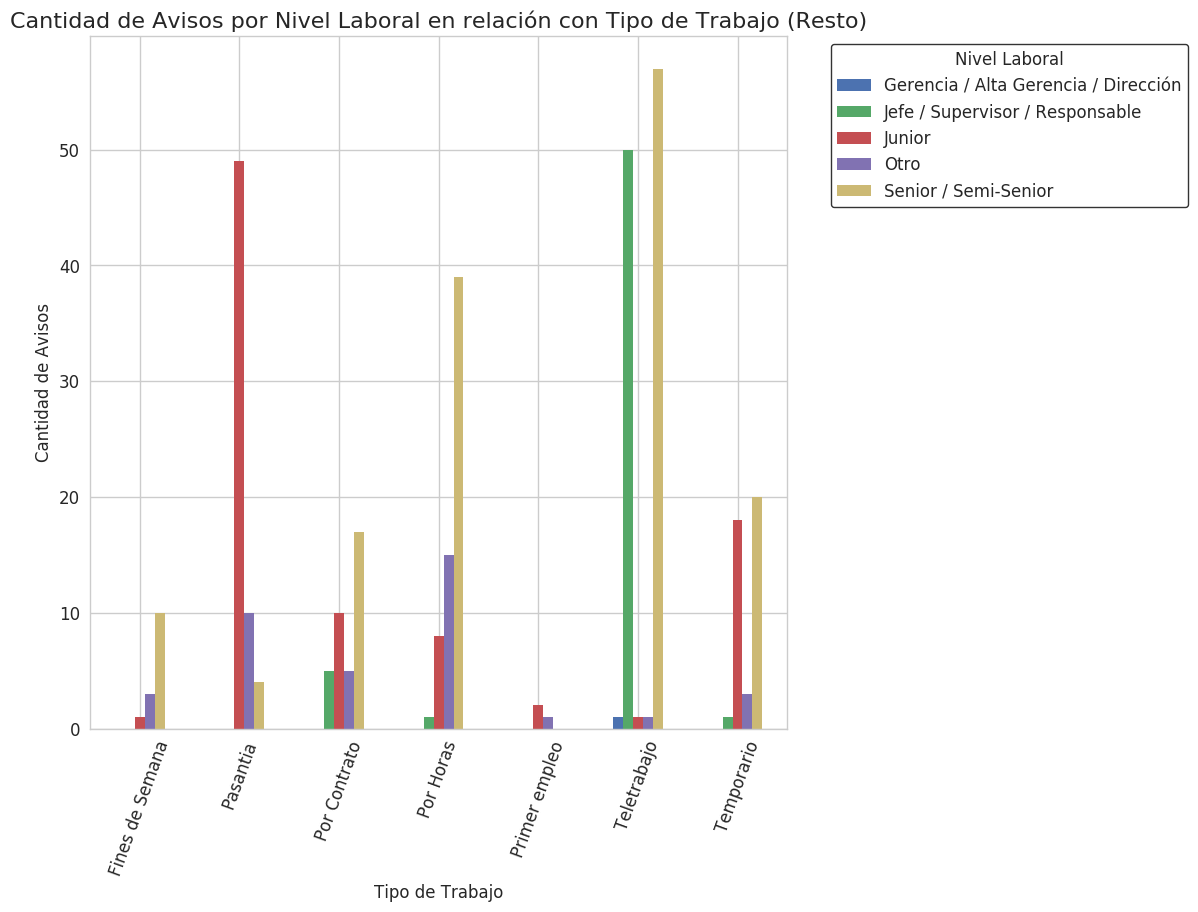

In [22]:
grafico_pivot_nivel_laboral_tipo_trabajo_resto=pivot_nivel_laboral_tipo_trabajo_resto.plot(kind='bar',figsize=(9,9),fontsize=12,rot=70)
grafico_pivot_nivel_laboral_tipo_trabajo_resto.set_title("Cantidad de Avisos por Nivel Laboral en relación con Tipo de Trabajo (Resto)",fontsize=16)
grafico_pivot_nivel_laboral_tipo_trabajo_resto.set_xlabel("Tipo de Trabajo",fontsize=12)
grafico_pivot_nivel_laboral_tipo_trabajo_resto.set_ylabel("Cantidad de Avisos",fontsize=12)
leyenda=plt.legend(["Gerencia / Alta Gerencia / Dirección","Jefe / Supervisor / Responsable","Junior","Otro","Senior / Semi-Senior"],fontsize=12,title='Nivel Laboral',frameon=True,facecolor='white',edgecolor='black',bbox_to_anchor=(1.05, 1))
leyenda.get_frame().set_linewidth(1.0)

Podemos ver que en lo que se refiere a Senior / Semi-Senior, Teletrabajo tiene una amplia mayoria de avisos, seguido Temporario y Por Horas. En cuanto a Junior, Pasantía es el tipo que posee la mayor cantidad por una amplia diferencia en relación con las otras.

### 5.5.B) Por Postulaciones

### 5.5.B.1) Full-Time y Part-Time

In [23]:
postulaciones_nivel_tipo_trabajo=pd.merge(postulaciones,nivel_laboral_tipo_trabajo,on='idaviso',how='inner')
postulaciones_nivel_tipo_trabajo_top=postulaciones_nivel_tipo_trabajo[(postulaciones_nivel_tipo_trabajo['Tipo_de_Trabajo']=='Full-time') | (postulaciones_nivel_tipo_trabajo['Tipo_de_Trabajo']=='Part-time')]
pivot_postulaciones_nivel_tipo_trabajo_top=postulaciones_nivel_tipo_trabajo_top.pivot_table(index='Nivel_Laboral',columns='Tipo_de_Trabajo',values='Valor',aggfunc='sum')
pivot_postulaciones_nivel_tipo_trabajo_top

Tipo_de_Trabajo                       Full-time  Part-time
Nivel_Laboral                                             
Gerencia / Alta Gerencia / Dirección      23604         39
Jefe / Supervisor / Responsable           82598        553
Junior                                   530703     139319
Otro                                     195951      58414
Senior / Semi-Senior                    1800289     196352

Text(70.7222,0.5,'Nivel Laboral')

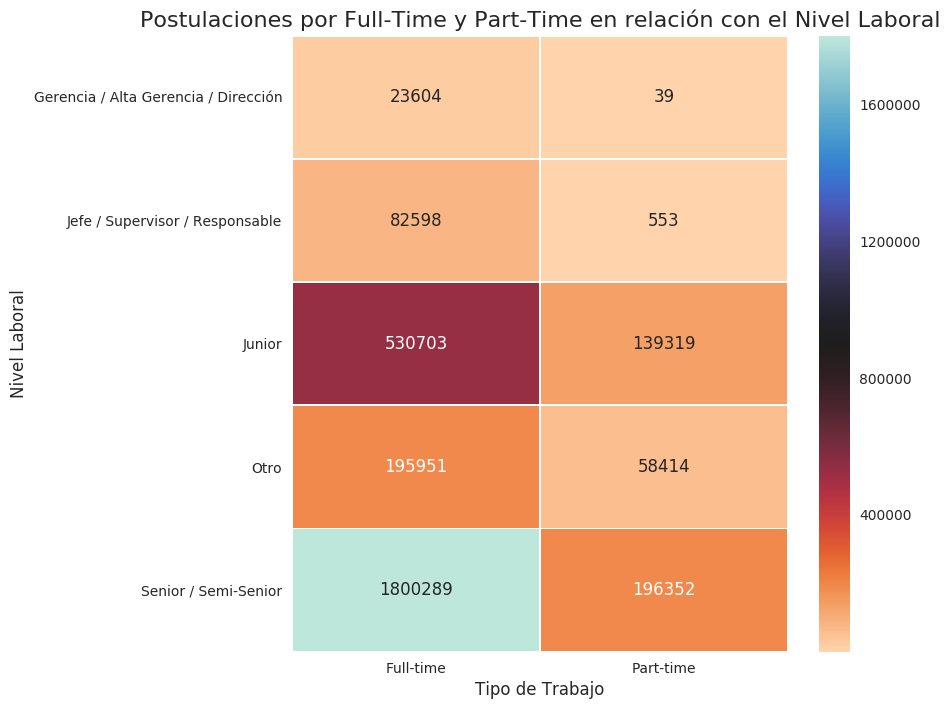

In [12]:
plt.subplots(figsize=(8,8))
grafico_pivot_postulaciones_nivel_tipo_trabajo_top=sns.heatmap(pivot_postulaciones_nivel_tipo_trabajo_top,linewidths=.5,fmt="d",annot=True,cmap="icefire_r")
grafico_pivot_postulaciones_nivel_tipo_trabajo_top.set_title("Postulaciones por Full-Time y Part-Time en relación con el Nivel Laboral",fontsize=16)
grafico_pivot_postulaciones_nivel_tipo_trabajo_top.set_xlabel("Tipo de Trabajo",fontsize=12)
grafico_pivot_postulaciones_nivel_tipo_trabajo_top.set_ylabel("Nivel Laboral",fontsize=12)

Al igual que la cantidad de avisos, Senior / Semi-Senior es el que mayor cantidad de postulaciones tiene en ambos tipos de Trabajo, seguido por Junior y por Otro. 

### 5.5.B.1) Resto

In [13]:
postulaciones_nivel_tipo_trabajo_resto=postulaciones_nivel_tipo_trabajo[(postulaciones_nivel_tipo_trabajo['Tipo_de_Trabajo'] != 'Full-time') & (postulaciones_nivel_tipo_trabajo['Tipo_de_Trabajo'] != 'Part-time')]
pivot_postulaciones_nivel_tipo_trabajo_resto=postulaciones_nivel_tipo_trabajo_resto.pivot_table(index='Nivel_Laboral',columns='Tipo_de_Trabajo',values='Valor',aggfunc='sum')
pivot_postulaciones_nivel_tipo_trabajo_resto.fillna(0,inplace=True)
pivot_postulaciones_nivel_tipo_trabajo_resto

Tipo_de_Trabajo                       Fines de Semana  Pasantia  Por Contrato  \
Nivel_Laboral                                                                   
Gerencia / Alta Gerencia / Dirección              0.0       0.0           0.0   
Jefe / Supervisor / Responsable                   0.0       0.0         269.0   
Junior                                         1384.0   11813.0        1032.0   
Otro                                            276.0    2069.0         138.0   
Senior / Semi-Senior                            240.0    1575.0        2387.0   

Tipo_de_Trabajo                       Por Horas  Primer empleo  Teletrabajo  \
Nivel_Laboral                                                                 
Gerencia / Alta Gerencia / Dirección        0.0            0.0         30.0   
Jefe / Supervisor / Responsable             8.0            0.0        966.0   
Junior                                   4535.0          123.0         18.0   
Otro                                      707.0            0.0         19.0   
Senior / Semi-Senior                     6613.0            0.0       2771.0   

Tipo_de_Trabajo                       Temporario  
Nivel_Laboral                                     
Gerencia / Alta Gerencia / Dirección         0.0  
Jefe / Supervisor / Responsable             75.0  
Junior                                    1705.0  
Otro                                       630.0  
Senior / Semi-Senior                      7001.0

[Text(0.5,0,'Fines de Semana'),
 Text(1.5,0,'Pasantia'),
 Text(2.5,0,'Por Contrato'),
 Text(3.5,0,'Por Horas'),
 Text(4.5,0,'Primer empleo'),
 Text(5.5,0,'Teletrabajo'),
 Text(6.5,0,'Temporario')]

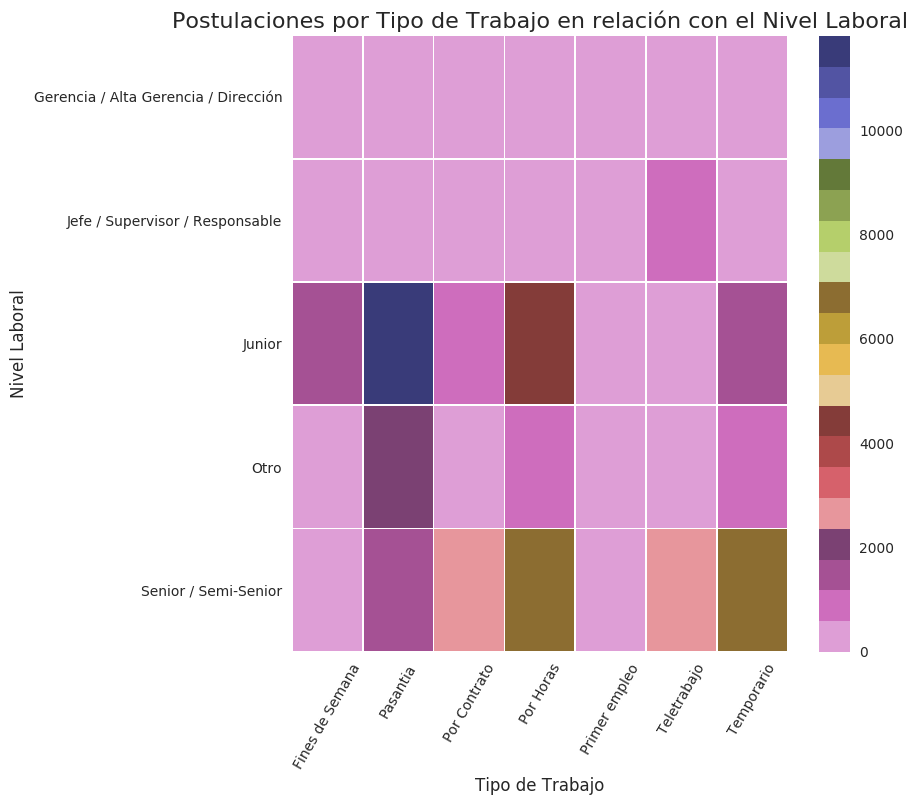

In [16]:
plt.subplots(figsize=(8,8))
grafico_pivot_postulaciones_nivel_tipo_trabajo_resto=sns.heatmap(pivot_postulaciones_nivel_tipo_trabajo_resto,linewidths=.5,cmap="tab20b_r")
grafico_pivot_postulaciones_nivel_tipo_trabajo_resto.set_title("Postulaciones por Tipo de Trabajo en relación con el Nivel Laboral",fontsize=16)
grafico_pivot_postulaciones_nivel_tipo_trabajo_resto.set_xlabel("Tipo de Trabajo",fontsize=12)
grafico_pivot_postulaciones_nivel_tipo_trabajo_resto.set_ylabel("Nivel Laboral",fontsize=12)
grafico_pivot_postulaciones_nivel_tipo_trabajo_resto.set_xticklabels(grafico_pivot_postulaciones_nivel_tipo_trabajo_resto.get_xticklabels(),rotation=60)

Podemos ver que la mayor cantidad de las Postulaciones son en tipo de trabajo Pasantía y en el nivel de Trabajo Junior

### 5.6) Nivel Laboral según la Edad promedio

### 5.6.A)General

In [24]:
postulaciones_nivel_laboral_edad=pd.merge(postulaciones_nivel_tipo_trabajo,edad,on='idpostulante',how='inner')
group_postulaciones_nivel_laboral_edad=postulaciones_nivel_laboral_edad.groupby(['Nivel_Laboral']).agg({'Edad':'mean'})
group_postulaciones_nivel_laboral_edad

Edad
Nivel_Laboral                                  
Gerencia / Alta Gerencia / Dirección  36.379846
Jefe / Supervisor / Responsable       33.810928
Junior                                27.546084
Otro                                  28.047455
Senior / Semi-Senior                  28.968885

(0, 40)

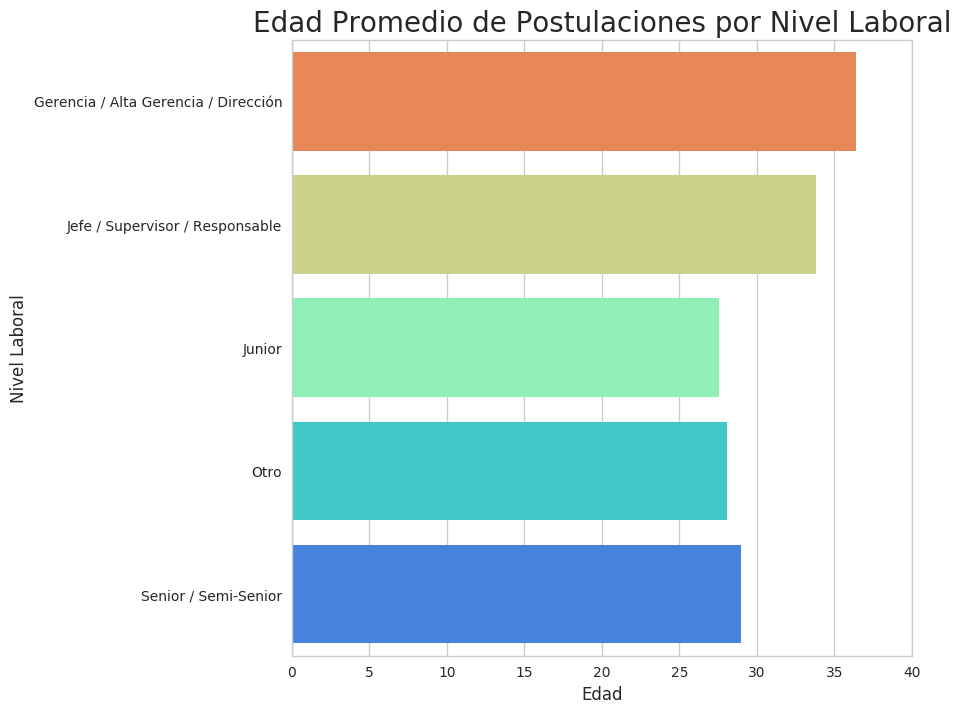

In [25]:
plt.subplots(figsize=(8,8))
grafico_postulaciones_nivel_laboral_edad=sns.barplot(x=group_postulaciones_nivel_laboral_edad['Edad'],y=group_postulaciones_nivel_laboral_edad.index,orient='h',palette="rainbow_r")
grafico_postulaciones_nivel_laboral_edad.set_title("Edad Promedio de Postulaciones por Nivel Laboral",fontsize=20)
grafico_postulaciones_nivel_laboral_edad.set_xlabel("Edad",fontsize=12)
grafico_postulaciones_nivel_laboral_edad.set_ylabel("Nivel Laboral",fontsize=12)
plt.xlim([0,40])

Se puede ver que el nivel con la menor edad promedio es Junior, lo cuál tiene sentido ya que cuando analizamos el nivel de trabajo con el tipo de trabajo, el que más tenía Junior (obviando Full-Time y Part-Time) era Pasantía, la cuál tenía la menor edad promedio de postulaciones.En contraparte, el de mayor promedio es el de Gerencia / Alta Gerencia / Dirección, con un promedio casi de 38 años, 10 años más que el de menor promedio

### 5.6.B) Género Femenino

In [26]:
postulaciones_nivel_laboral_edad_femenino=postulaciones_nivel_laboral_edad[(postulaciones_nivel_laboral_edad['Sexo']=='FEM')]
group_postulaciones_nivel_laboral_edad_femenino=postulaciones_nivel_laboral_edad_femenino.groupby(['Nivel_Laboral']).agg({'Edad':'mean'})
group_postulaciones_nivel_laboral_edad_femenino

Edad
Nivel_Laboral                                  
Gerencia / Alta Gerencia / Dirección  32.313248
Jefe / Supervisor / Responsable       31.075032
Junior                                27.235650
Otro                                  27.611013
Senior / Semi-Senior                  28.108800

(0, 40)

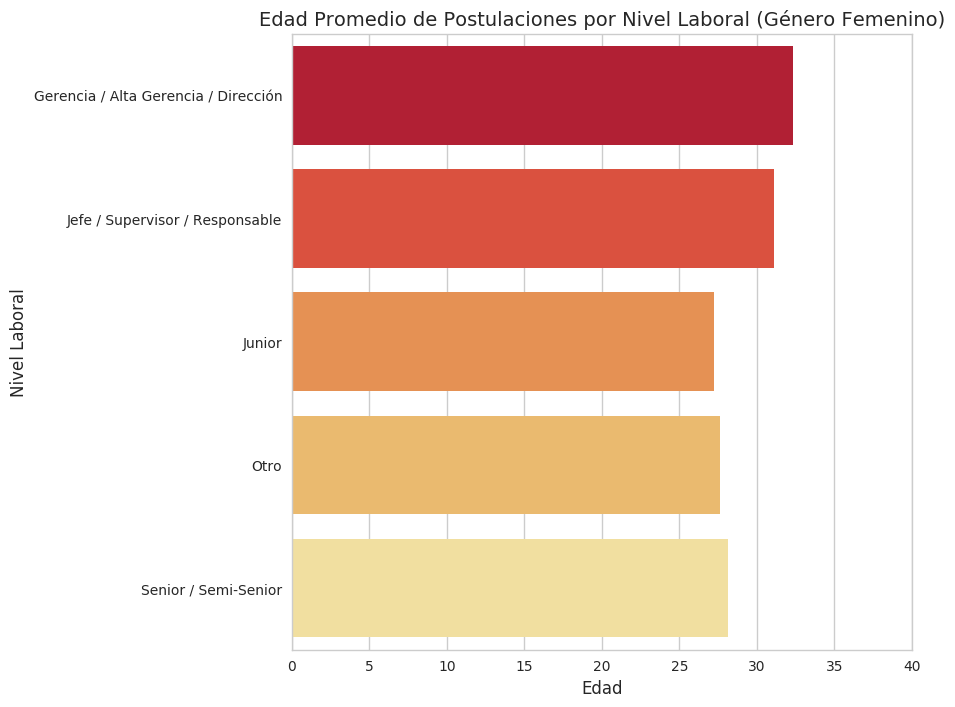

In [27]:
plt.subplots(figsize=(8,8))
grafico_postulaciones_nivel_laboral_edad_femenino=sns.barplot(x=group_postulaciones_nivel_laboral_edad_femenino['Edad'],y=group_postulaciones_nivel_laboral_edad_femenino.index,orient='h',palette="YlOrRd_r")
grafico_postulaciones_nivel_laboral_edad_femenino.set_title("Edad Promedio de Postulaciones por Nivel Laboral (Género Femenino)",fontsize=14)
grafico_postulaciones_nivel_laboral_edad_femenino.set_xlabel("Edad",fontsize=12)
grafico_postulaciones_nivel_laboral_edad_femenino.set_ylabel("Nivel Laboral",fontsize=12)
plt.xlim([0,40])

Si se compara las posiciones de cada Nivel con relación a la edad general, no hay ningún tipo de diferencia alguna, lo que difieren son las edad, mientras que en Gerencia / Alta Gerencia / Dirección la edad general de las mujeres es casi 32, en la general era casi 38, un poco menor, y en la de menor edad también se encuentra la misma tendencia pero con menor diferencia

### 5.6.C) Género Masculino

In [28]:
postulaciones_nivel_laboral_edad_masculino=postulaciones_nivel_laboral_edad[(postulaciones_nivel_laboral_edad['Sexo']=='MASC')]
group_postulaciones_nivel_laboral_edad_masculino=postulaciones_nivel_laboral_edad_masculino.groupby(['Nivel_Laboral']).agg({'Edad':'mean'})
group_postulaciones_nivel_laboral_edad_masculino

Edad
Nivel_Laboral                                  
Gerencia / Alta Gerencia / Dirección  38.067450
Jefe / Supervisor / Responsable       35.051432
Junior                                27.914680
Otro                                  28.517633
Senior / Semi-Senior                  29.837834

(0, 40)

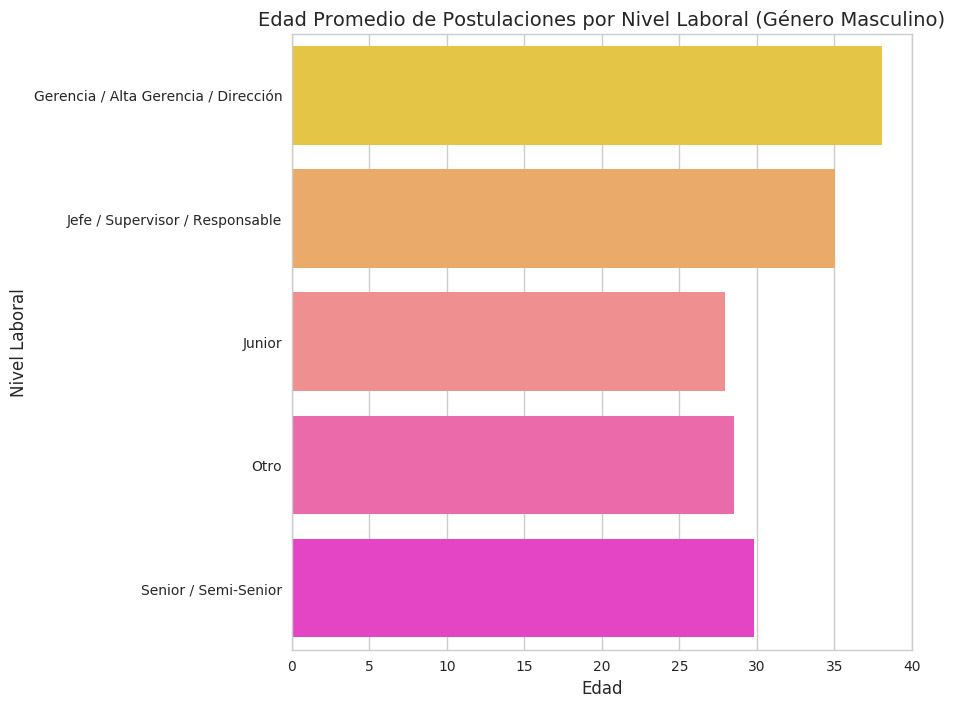

In [29]:
plt.subplots(figsize=(8,8))
grafico_postulaciones_nivel_laboral_edad_masculino=sns.barplot(x=group_postulaciones_nivel_laboral_edad_masculino['Edad'],y=group_postulaciones_nivel_laboral_edad_masculino.index,orient='h',palette="spring_r")
grafico_postulaciones_nivel_laboral_edad_masculino.set_title("Edad Promedio de Postulaciones por Nivel Laboral (Género Masculino)",fontsize=14)
grafico_postulaciones_nivel_laboral_edad_masculino.set_xlabel("Edad",fontsize=12)
grafico_postulaciones_nivel_laboral_edad_masculino.set_ylabel("Nivel Laboral",fontsize=12)
plt.xlim([0,40])

En cuanto a los hombres, la diferencia es mayor, como sucedió anteriomente con el género femenino, en el másculino el order no sufrió alteraciones pero el promedio de las edades si, en este caso, el menor en todos los casos (Junior) aquí presenta el promedio más alto aunque no hay tanta diferencia como si sucede con el de mayor promedio( Gerencia / Alta Gerencia / Dirección) teniendo el masculino un promedio de casi 39 años

### 5.7) Nivel Laboral por Educacion

### 5.7.A) Graduados

In [16]:
postulaciones_nivel_trabajo_graduados=pd.merge(postulaciones_nivel_trabajo,educacion_graduados,on='idpostulante',how='inner')
postulaciones_nivel_trabajo_graduados['Valor']=1
pivot_postulaciones_nivel_trabajo_graduados=postulaciones_nivel_trabajo_graduados.pivot_table(index='Nivel_Laboral',columns='Nivel',values='Valor',aggfunc='sum')
pivot_postulaciones_nivel_trabajo_graduados

Nivel                                 Doctorado  Master    Otro  Posgrado  \
Nivel_Laboral                                                               
Gerencia / Alta Gerencia / Dirección         49    1656    2550      2967   
Jefe / Supervisor / Responsable             133    2659    9058      5979   
Junior                                      184    3948   77965     10922   
Otro                                         56    1244   29104      3223   
Senior / Semi-Senior                        898   18995  230756     47148   

Nivel                                 Secundario  Terciario/Técnico  \
Nivel_Laboral                                                         
Gerencia / Alta Gerencia / Dirección        7557               4060   
Jefe / Supervisor / Responsable            32700              14364   
Junior                                    403171              94727   
Otro                                      165823              31366   
Senior / Semi-Senior                     1153016             293242   

Nivel                                 Universitario  
Nivel_Laboral                                        
Gerencia / Alta Gerencia / Dirección          12500  
Jefe / Supervisor / Responsable               38302  
Junior                                       119300  
Otro                                          28552  
Senior / Semi-Senior                         405104

[Text(0.5,0,'Doctorado'),
 Text(1.5,0,'Master'),
 Text(2.5,0,'Otro'),
 Text(3.5,0,'Posgrado'),
 Text(4.5,0,'Secundario'),
 Text(5.5,0,'Terciario/Técnico'),
 Text(6.5,0,'Universitario')]

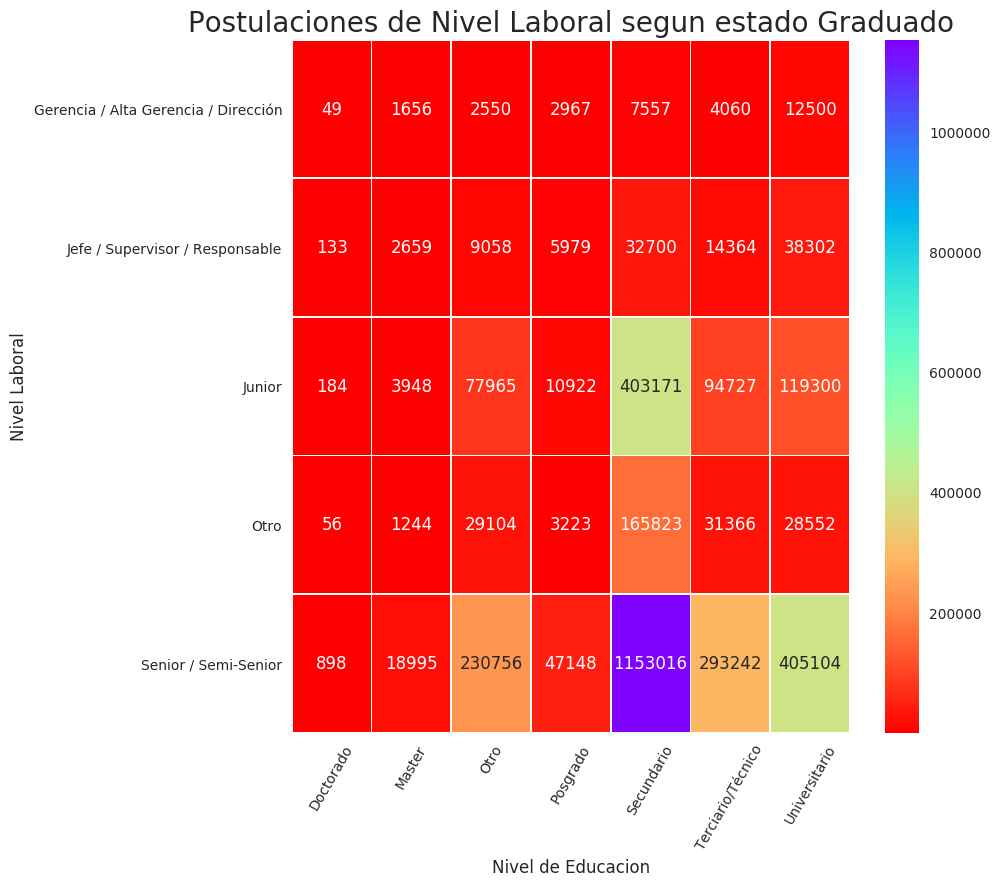

In [19]:
plt.subplots(figsize=(9,9))
grafico_pivot_postulaciones_nivel_trabajo_graduados=sns.heatmap(pivot_postulaciones_nivel_trabajo_graduados,linewidths=.5,fmt="d",annot=True,cmap="rainbow_r")
grafico_pivot_postulaciones_nivel_trabajo_graduados.set_title("Postulaciones de Nivel Laboral segun estado Graduado",fontsize=20)
grafico_pivot_postulaciones_nivel_trabajo_graduados.set_xlabel("Nivel de Educacion",fontsize=12)
grafico_pivot_postulaciones_nivel_trabajo_graduados.set_ylabel("Nivel Laboral",fontsize=12)
grafico_pivot_postulaciones_nivel_trabajo_graduados.set_xticklabels(grafico_pivot_postulaciones_nivel_trabajo_graduados.get_xticklabels(),rotation=60)

Podemos ver que en los niveles principales (Senior / Semi-Senior y Junior) la mayor cantidad de las postulaciones son graduados en el Nivel Secundario y una gran cantidad del Universitario. Así mismo, también hay una gran cantidad de postulaciones de graduados en Posgrado y máster.

### 5.7.B) En Curso

In [55]:
postulaciones_nivel_trabajo_cursando=pd.merge(postulaciones_nivel_trabajo,educacion_cursando,on='idpostulante',how='inner')
postulaciones_nivel_trabajo_cursando['Valor']=1
pivot_postulaciones_nivel_trabajo_cursando=postulaciones_nivel_trabajo_cursando.pivot_table(index='Nivel_Laboral',columns='Nivel',values='Valor',aggfunc='sum')
pivot_postulaciones_nivel_trabajo_cursando

Nivel                                 Doctorado  Master   Otro  Posgrado  \
Nivel_Laboral                                                              
Gerencia / Alta Gerencia / Dirección         44     796    619       704   
Jefe / Supervisor / Responsable             119    1850   2098      2131   
Junior                                      314    3709  21828      5853   
Otro                                        100     832   7268      1529   
Senior / Semi-Senior                       1061   15020  61237     20958   

Nivel                                 Secundario  Terciario/Técnico  \
Nivel_Laboral                                                         
Gerencia / Alta Gerencia / Dirección         133               1105   
Jefe / Supervisor / Responsable              695               4616   
Junior                                     11610              62388   
Otro                                        6250              21481   
Senior / Semi-Senior                       35512             165806   

Nivel                                 Universitario  
Nivel_Laboral                                        
Gerencia / Alta Gerencia / Dirección           4631  
Jefe / Supervisor / Responsable               18138  
Junior                                       240230  
Otro                                          65519  
Senior / Semi-Senior                         559124

[Text(0.5,0,'Doctorado'),
 Text(1.5,0,'Master'),
 Text(2.5,0,'Otro'),
 Text(3.5,0,'Posgrado'),
 Text(4.5,0,'Secundario'),
 Text(5.5,0,'Terciario/Técnico'),
 Text(6.5,0,'Universitario')]

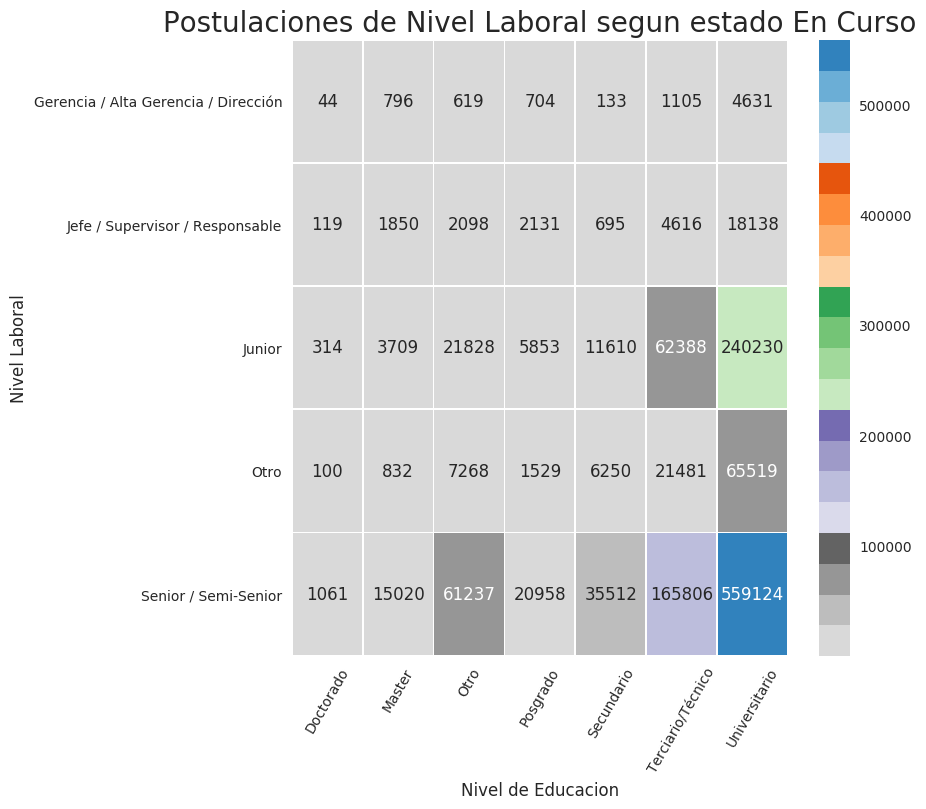

In [57]:
plt.subplots(figsize=(8,8))
grafico_pivot_postulaciones_nivel_trabajo_cursando=sns.heatmap(pivot_postulaciones_nivel_trabajo_cursando,linewidths=.5,fmt="d",annot=True,cmap="tab20c_r")
grafico_pivot_postulaciones_nivel_trabajo_cursando.set_title("Postulaciones de Nivel Laboral segun estado En Curso",fontsize=20)
grafico_pivot_postulaciones_nivel_trabajo_cursando.set_xlabel("Nivel de Educacion",fontsize=12)
grafico_pivot_postulaciones_nivel_trabajo_cursando.set_ylabel("Nivel Laboral",fontsize=12)
grafico_pivot_postulaciones_nivel_trabajo_cursando.set_xticklabels(grafico_pivot_postulaciones_nivel_trabajo_cursando.get_xticklabels(),rotation=60)

Analizando el gráfico se puede observar que, en todos los niveles laborales, la mayor cantidad de postulaciones provienen están cursando una carrera Universitaria y Terciario / Técnico. Otra curiosidad es la gran cantidad de postulaciones que está cursando en el nivel Otro en Senior / Semi-Senior.

### 5.8) Conclusión General

Pudimos ver que la gran cantidad de avisos, postulaciones y vistas predominan los niveles de Senior / Semi-Senior y Junior, mientras que los niveles de mayor importancia se encontraban a lo último. En relación a las áreas de trabajo, no hubo mucha variación en lo que venimos analizando, las principales áreas son las que tenían mayor cantidad de postulaciones en los principales niveles. Con los tipos de trabajo, tanto en avisos como postulaciones, se siguió la misma tendencia, Full-Time con Senior / Semi-Senior era los que tenían mayor presencia seguido por Junior, la mayor curiosidad es la alta cantidad de avisos y postulaciones en el nivel de Jefe / Supervisor / Responsable en Teletrabajo. En cuanto a las edades, si bien varían un poco los valores según el género, las tendencias son las mismasY por último, en lo visto con la educación, la mayor cantidad de las postulaciones son graduados en Secundario y de los de cursando en universitario, lo cual no generó ningún tipo de diferencia con lo visto en los anteriores análisis.

## 6) Zona Laboral

### 6.1) ¿En que zonas hay la mayo cantidad de avisos?

In [21]:
zona_avisos=avisos_detalle['Zona'].value_counts().head(2)
zona_avisos

Gran Buenos Aires    12654
Capital Federal        876
Name: Zona, dtype: int64

Text(0,0.5,'')

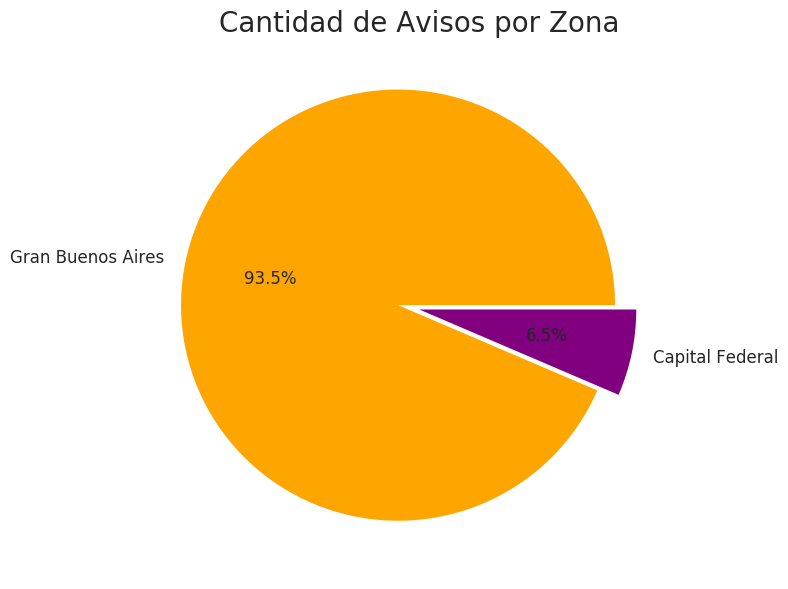

In [22]:
grafico_zona_avisos=zona_avisos.plot(kind='pie',autopct='%1.1f%%',figsize=(7,7),fontsize=12,colors=['orange','purple'],explode=(0.1, 0))
grafico_zona_avisos.set_title("Cantidad de Avisos por Zona",fontsize=20)
grafico_zona_avisos.set_ylabel("")

Podemos ver que el Gran Buenos Aires es el que presenta la mayor cantidad de avisos con una cantidad realmente abrumadora, más aún comparado con la cantidad de avisos que se encuentran en Capital Federal

### 6.2) Cantidad de Postulaciones por Zona

In [5]:
avisos_zona=avisos_detalle[['idaviso','Zona']]
postulaciones_zona=pd.merge(postulaciones,avisos_zona,on='idaviso',how='inner')
cantidad_postulaciones_zona=postulaciones_zona['Zona'].value_counts().head(2)
cantidad_postulaciones_zona

Gran Buenos Aires    2868709
Capital Federal       205266
Name: Zona, dtype: int64

Text(0,0.5,'Zona')

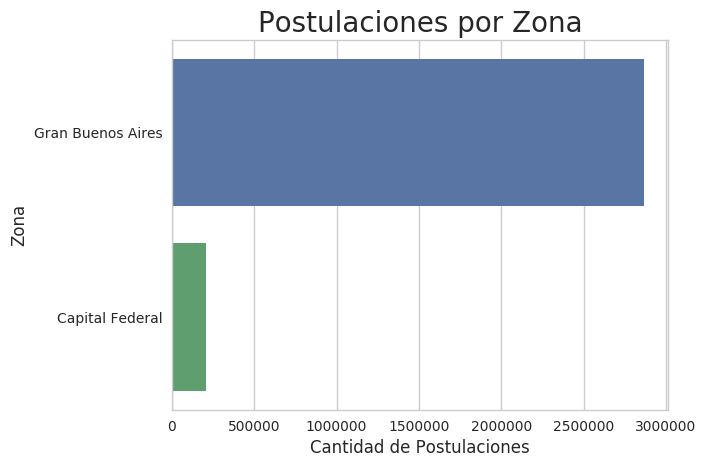

In [21]:
grafico_cantidad_postulaciones_zona=sns.barplot(x=cantidad_postulaciones_zona.values,y=cantidad_postulaciones_zona.index,orient='h')
grafico_cantidad_postulaciones_zona.set_title("Postulaciones por Zona",fontsize=20)
grafico_cantidad_postulaciones_zona.set_xlabel("Cantidad de Postulaciones",fontsize=12)
grafico_cantidad_postulaciones_zona.set_ylabel("Zona",fontsize=12)

La gran mayoría de las postulaciones se hacen en la zona del Gran Buenos Aires, mientras que en muy menor medida se encuentra Capital Federal

### 6.3) Cantidad de Postulaciones por Zona según Área de Trabajo

In [32]:
zona_area_trabajo=avisos_detalle[['idaviso','Zona','Nombre_Area']]
postulaciones_zona_area=pd.merge(postulaciones,zona_area_trabajo,on='idaviso',how='inner')
postulaciones_zona_area_top=pd.merge(postulaciones_zona_area,df_top_post,on='Nombre_Area',how='inner')
postulaciones_zona_area_top['Valor']=1
pivot_postulaciones_zona_area_top=postulaciones_zona_area_top.pivot_table(index='Nombre_Area',columns='Zona',values='Valor',aggfunc='sum')
pivot_postulaciones_zona_area_top

Zona                      Capital Federal  Gran Buenos Aires
Nombre_Area                                                 
Administración                      23321             267814
Atención al Cliente                 11112             184524
Call Center                          9674             116756
Comercial                            8802             207875
Mantenimiento y Limpieza             4447              58861
Producción                          12312             264777
Recepcionista                       11250             126235
Telemarketing                       13879              73627
Tesorería                            3979              74471
Ventas                              21087             387061

Text(70.7222,0.5,'Área de Trabajo')

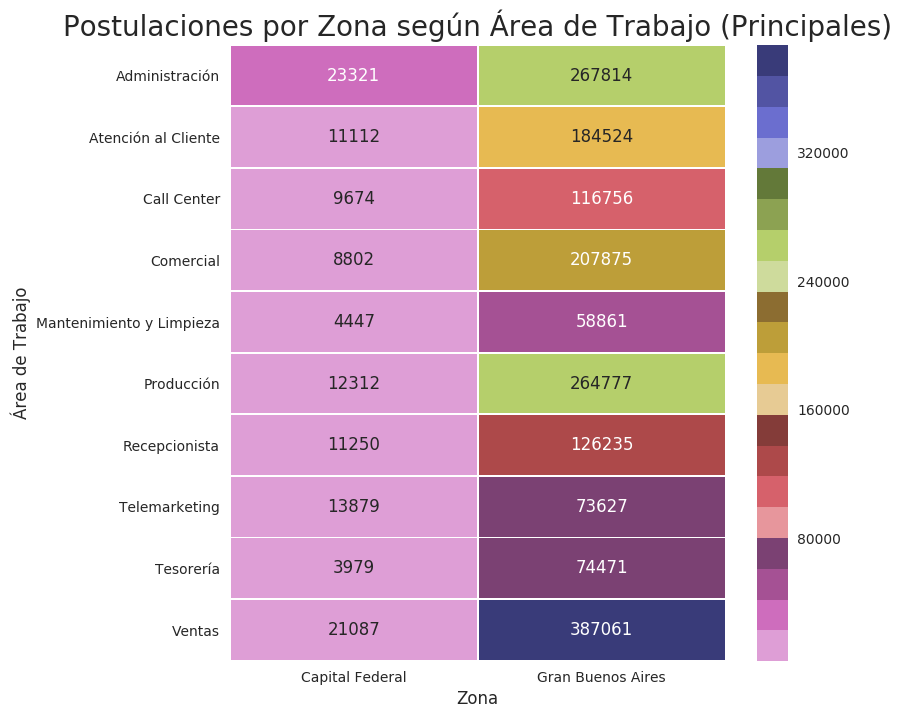

In [23]:
plt.subplots(figsize=(8,8))
grafico_postulaciones_zona_area_top=sns.heatmap(pivot_postulaciones_zona_area_top,linewidths=.5,fmt="d",annot=True,cmap="tab20b_r")
grafico_postulaciones_zona_area_top.set_title("Postulaciones por Zona según Área de Trabajo (Principales)",fontsize=20)
grafico_postulaciones_zona_area_top.set_xlabel("Zona",fontsize=12)
grafico_postulaciones_zona_area_top.set_ylabel("Área de Trabajo",fontsize=12)

Claramente sucede lo mismo que viene sucediendo, la diferencia entre ambas zonas en muy grande, a favor del Gran Buenos Aires claro está.

### 6.4) Postulaciones por Zona según Género

In [18]:
postulaciones_zona_genero=pd.merge(postulaciones_zona_area,genero,on='idpostulante',how='inner')
postulaciones_zona_genero['Valor']=1
postulaciones_zona_declarado=postulaciones_zona_genero[(postulaciones_zona_genero['Sexo'] != 'NO_DECLARA')]
postulaciones_zona_top_genero=postulaciones_zona_declarado[(postulaciones_zona_declarado['Zona'] != 'GBA Oeste')]
pivot_postulaciones_zona_genero=postulaciones_zona_top_genero.pivot_table(index='Zona',columns='Sexo',values='Valor',aggfunc='sum')
pivot_postulaciones_zona_genero

Sexo                   FEM     MASC
Zona                               
Capital Federal     106435    96277
Gran Buenos Aires  1428887  1402895

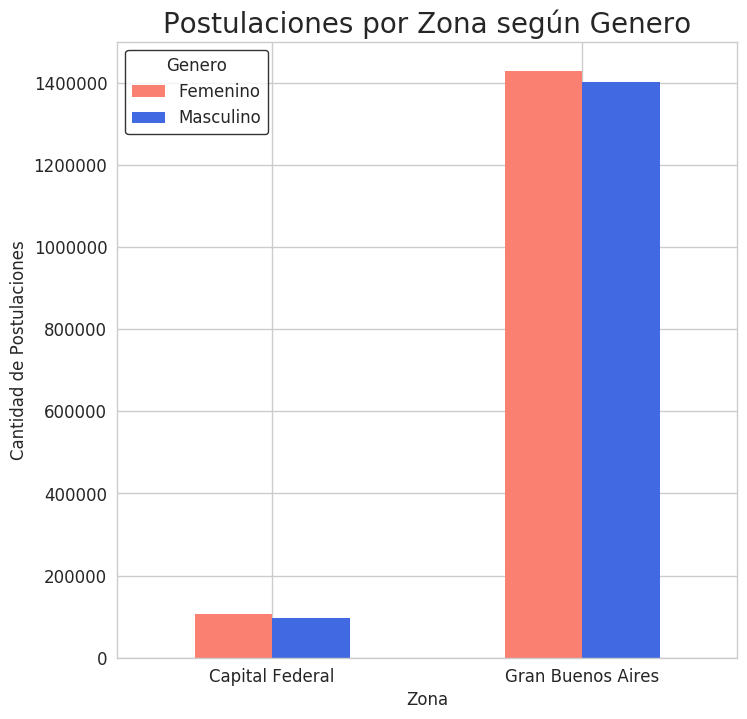

In [19]:
grafico_pivot_postulaciones_zona_genero=pivot_postulaciones_zona_genero.plot(kind='bar',figsize=(8,8),fontsize=12,color=['salmon','royalblue'],rot=0)
grafico_pivot_postulaciones_zona_genero.set_title("Postulaciones por Zona según Genero",fontsize=20)
grafico_pivot_postulaciones_zona_genero.set_xlabel("Zona",fontsize=12)
grafico_pivot_postulaciones_zona_genero.set_ylabel("Cantidad de Postulaciones",fontsize=12)
leyenda=plt.legend(['Femenino','Masculino'],fontsize=12,title='Genero',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

Sigue sin haber ningún tipo de sorpresa, ambos géneros se postulan en la zona del Gran Buenos Aires y la diferencia con Capital Federal es extremadamente grande.

### 6.5) Postulaciones por Zona según la Edad

In [33]:
postulaciones_zona_edad=pd.merge(postulaciones_zona_area,edad,on='idpostulante',how='inner')
postulaciones_zona_top_edad=postulaciones_zona_edad[(postulaciones_zona_edad['Zona'] != 'GBA Oeste')]
postulaciones_zona_edad_general=postulaciones_zona_top_edad.groupby(['Zona']).agg({'Edad':'mean'})
postulaciones_zona_edad_genero=postulaciones_zona_top_edad.pivot_table(index='Zona',columns='Sexo',values='Edad',aggfunc='mean')
postulaciones_zona_edad_genero['General']=postulaciones_zona_edad_general['Edad']
postulaciones_zona_edad_genero

Sexo                     FEM       MASC    General
Zona                                              
Capital Federal    27.893342  29.085357  28.459240
Gran Buenos Aires  27.927001  29.657481  28.784089

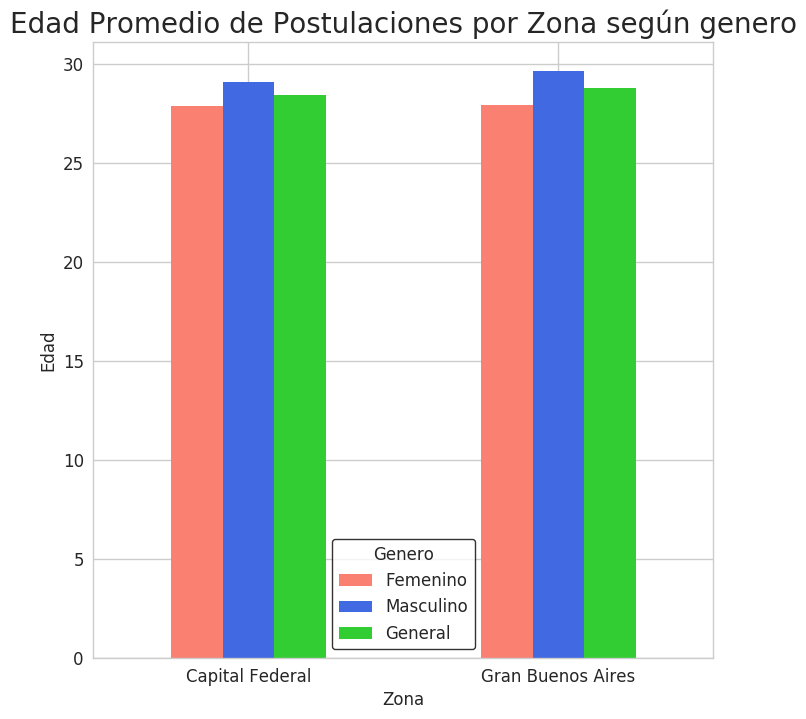

In [34]:
grafico_postulaciones_zona_edad_genero=postulaciones_zona_edad_genero.plot(kind='bar',figsize=(8,8),fontsize=12,rot=0,color=['salmon','royalblue','limegreen'])
grafico_postulaciones_zona_edad_genero.set_title("Edad Promedio de Postulaciones por Zona según genero",fontsize=20)
grafico_postulaciones_zona_edad_genero.set_xlabel("Zona",fontsize=12)
grafico_postulaciones_zona_edad_genero.set_ylabel("Edad",fontsize=12)
leyenda=plt.legend(['Femenino','Masculino','General'],fontsize=12,title='Genero',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

A simple vista se puede ver que el promedio es más joven en Capital Federal que en el Gran Buenos Aires ya sea en los géneros masculinos y femeninos o en general,y ,si bien el promedio es favorable a Capital Federal, la diferencia es realmente muy pequeña.

### 6.6) Postulaciones por Zona por Tipo de Trabajo

### 6.6.A) Principales (Full-Time y Part-Time)

In [6]:
tipo_nivel_zona=avisos_detalle[['idaviso','Zona','Tipo_de_Trabajo','Nivel_Laboral']]
postulaciones_zona_tipo_nivel=pd.merge(postulaciones,tipo_nivel_zona,on='idaviso',how='inner')
postulaciones_zona_tipo_nivel['Valor']=1
postulaciones_zona_top_tipo_nivel=postulaciones_zona_tipo_nivel[(postulaciones_zona_tipo_nivel['Zona'] != 'GBA Oeste')]
postulaciones_zona_top_tipo_top=postulaciones_zona_top_tipo_nivel[(postulaciones_zona_top_tipo_nivel['Tipo_de_Trabajo']=='Full-time') | (postulaciones_zona_top_tipo_nivel['Tipo_de_Trabajo']=='Part-time')]
pivot_postulaciones_zona_top_tipo_top=postulaciones_zona_top_tipo_top.pivot_table(index='Zona',columns='Tipo_de_Trabajo',values='Valor',aggfunc='sum')
pivot_postulaciones_zona_top_tipo_top

Tipo_de_Trabajo    Full-time  Part-time
Zona                                   
Capital Federal       156057      44261
Gran Buenos Aires    2477088     350185

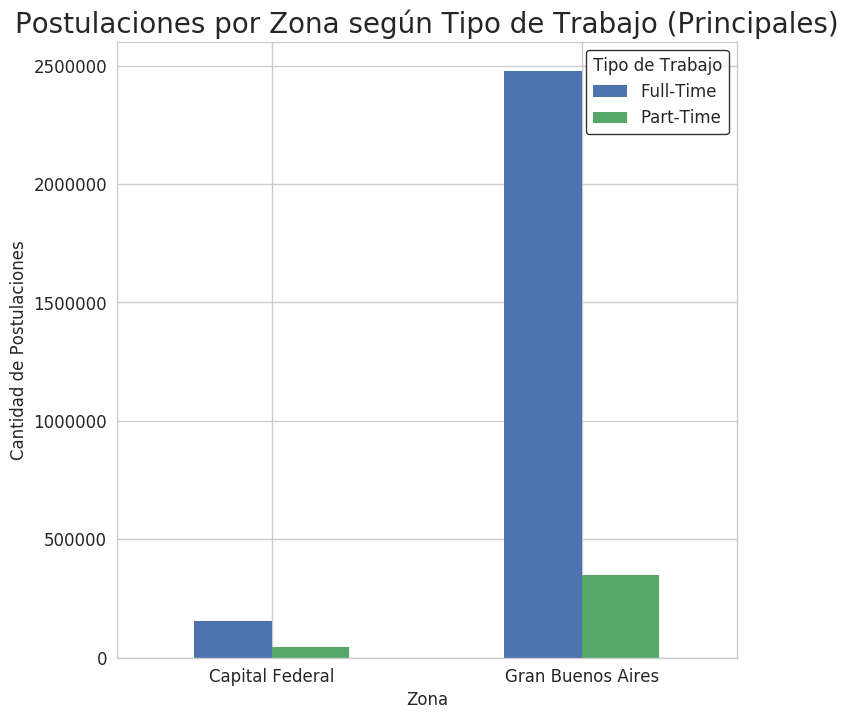

In [25]:
grafico_pivot_postulaciones_zona_top_tipo_top=pivot_postulaciones_zona_top_tipo_top.plot(kind='bar',figsize=(8,8),fontsize=12,rot=0)
grafico_pivot_postulaciones_zona_top_tipo_top.set_title("Postulaciones por Zona según Tipo de Trabajo (Principales)",fontsize=20)
grafico_pivot_postulaciones_zona_top_tipo_top.set_xlabel("Zona",fontsize=12)
grafico_pivot_postulaciones_zona_top_tipo_top.set_ylabel("Cantidad de Postulaciones",fontsize=12)
leyenda=plt.legend(['Full-Time','Part-Time'],fontsize=12,title='Tipo de Trabajo',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

Aquí podemos ver que, si bien en Full-Time continúa con la tendencia vista en los otros apartados, osea una gran cantidad de postulaciones se realizan en el Gran Buenos Aires y una muy pequeña en Capital Federal, en el Part-Time hay una gran diferencia, si bien sigue liderando las postulaciones en el Gran Buenos Aires, la diferencia con Capital Federal ya no es tan abultada como se había visto anteriormente

### 6.6.B) Resto

In [7]:
postulaciones_zona_top_tipo_resto=postulaciones_zona_top_tipo_nivel[(postulaciones_zona_top_tipo_nivel['Tipo_de_Trabajo'] != 'Full-time') & (postulaciones_zona_top_tipo_nivel['Tipo_de_Trabajo'] != 'Part-time')]
pivot_postulaciones_zona_top_tipo_resto=postulaciones_zona_top_tipo_resto.pivot_table(index='Zona',columns='Tipo_de_Trabajo',values='Valor',aggfunc='sum')
pivot_postulaciones_zona_top_tipo_resto

Tipo_de_Trabajo    Fines de Semana  Pasantia  Por Contrato  Por Horas  \
Zona                                                                    
Capital Federal               50.0    2678.0         402.0      421.0   
Gran Buenos Aires           1850.0   12779.0        3424.0    11442.0   

Tipo_de_Trabajo    Primer empleo  Teletrabajo  Temporario  
Zona                                                       
Capital Federal              NaN         19.0      1378.0  
Gran Buenos Aires          123.0       3785.0      8033.0

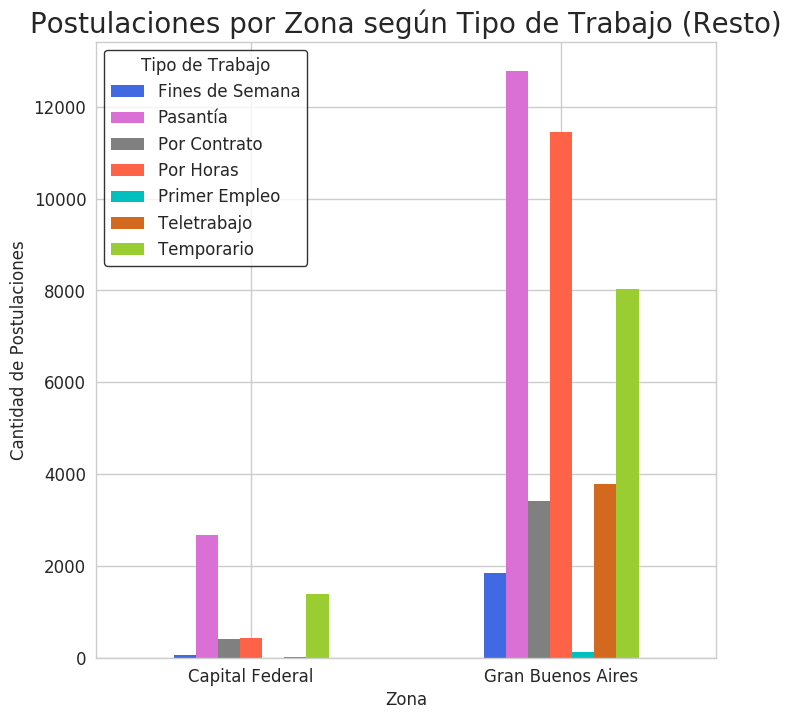

In [12]:
grafico_pivot_postulaciones_zona_top_tipo_resto=pivot_postulaciones_zona_top_tipo_resto.plot(kind='bar',figsize=(8,8),color=['royalblue','orchid','gray','tomato','c','chocolate','yellowgreen'],fontsize=12,rot=0)
grafico_pivot_postulaciones_zona_top_tipo_resto.set_title("Postulaciones por Zona según Tipo de Trabajo (Resto)",fontsize=20)
grafico_pivot_postulaciones_zona_top_tipo_resto.set_xlabel("Zona",fontsize=12)
grafico_pivot_postulaciones_zona_top_tipo_resto.set_ylabel("Cantidad de Postulaciones",fontsize=12)
leyenda=plt.legend(['Fines de Semana','Pasantía','Por Contrato','Por Horas','Primer Empleo','Teletrabajo','Temporario'],fontsize=12,title='Tipo de Trabajo',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

Como viene sucediendo durante todo el apartado, la mayor cantidad de postulaciones en todos los tipos de trabajo restantes suceden en el Gran Buenos Aires donde Pasantía lidera en ambas zonas y en la zona del Gran Buenos Aires le sigue Temporario mientras que en Capital Federal continúa Por Horas. 

### 6.7) Postulaciones por Zona según Nivel Laboral

In [29]:
pivot_postulaciones_zona_top_nivel=postulaciones_zona_top_tipo_nivel.pivot_table(index='Zona',columns='Nivel_Laboral',values='Valor',aggfunc='sum')
pivot_postulaciones_zona_top_nivel

Nivel_Laboral      Gerencia / Alta Gerencia / Dirección  \
Zona                                                      
Capital Federal                                     991   
Gran Buenos Aires                                 22682   

Nivel_Laboral      Jefe / Supervisor / Responsable  Junior    Otro  \
Zona                                                                 
Capital Federal                               5250   69991   28343   
Gran Buenos Aires                            79219  620641  229861   

Nivel_Laboral      Senior / Semi-Senior  
Zona                                     
Capital Federal                  100691  
Gran Buenos Aires               1916306

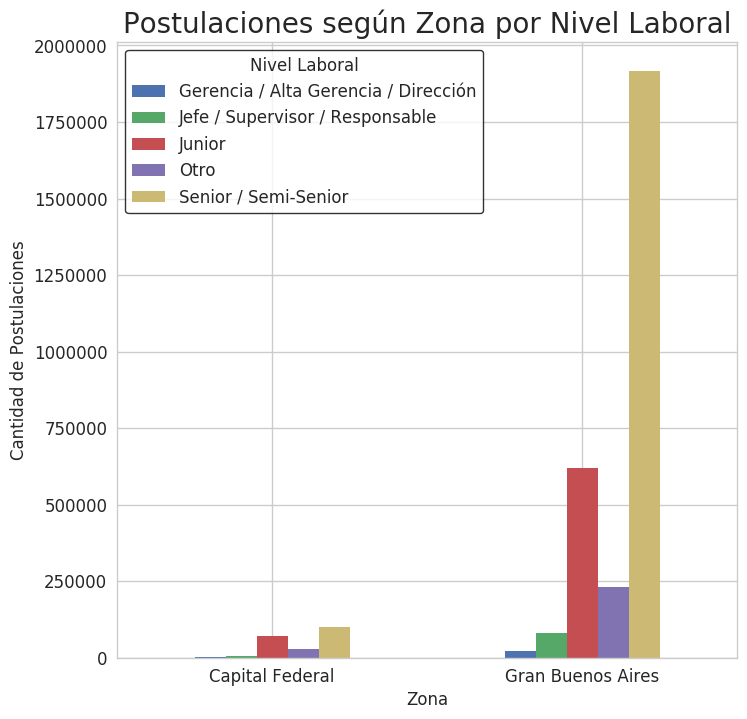

In [41]:
grafico_postulaciones_zona_top_nivel=pivot_postulaciones_zona_top_nivel.plot(kind='bar',figsize=(8,8),fontsize=12,rot=0)
grafico_postulaciones_zona_top_nivel.set_title("Postulaciones según Zona por Nivel Laboral",fontsize=20)
grafico_postulaciones_zona_top_nivel.set_xlabel("Zona",fontsize=12)
grafico_postulaciones_zona_top_nivel.set_ylabel("Cantidad de Postulaciones",fontsize=12)
leyenda=plt.legend(['Gerencia / Alta Gerencia / Dirección','Jefe / Supervisor / Responsable','Junior','Otro','Senior / Semi-Senior'],fontsize=12,title='Nivel Laboral',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

Sin ningún tipo de irregularidad, continua con lo mismo que se vio anteriormente, en la zona de Gran Buenos Aires es donde hay mayor cantidad de postulaciones en todos los niveles, siendo Senior / Semi-Senior el de mayor cantidad en ambas zonas.

### 6.8) Conclusión General

En este apartado pudimos observar que la zona de Gran Buenos Aires es la que presenta mayor cantidad de avisos y, por consiguiente, mayor cantidad de postulaciones y una gran diferencia en relación a la segunda zona en cuestión, Capital Federal. La misma tendencia se siguió observando durante todo este análisis, superando en absolutamente en todos los campos lo relaciones con Gran Buenos Aires, ya sea por cantidad de postulaciones por género, tipo de nivel laboral y por tipo de trabajo. En el único momento donde no se notó una diferencia más grande fue en el sector de la edad promedio, en donde en ambas zonas en todos los niveles se mantuvo medianamente estable

## 7) Analisis General

### 7.1) Genero de Registrados

In [25]:
genero_usuarios=genero_edad['Sexo'].value_counts()
genero_usuarios

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: Sexo, dtype: int64

Text(0,0.5,'')

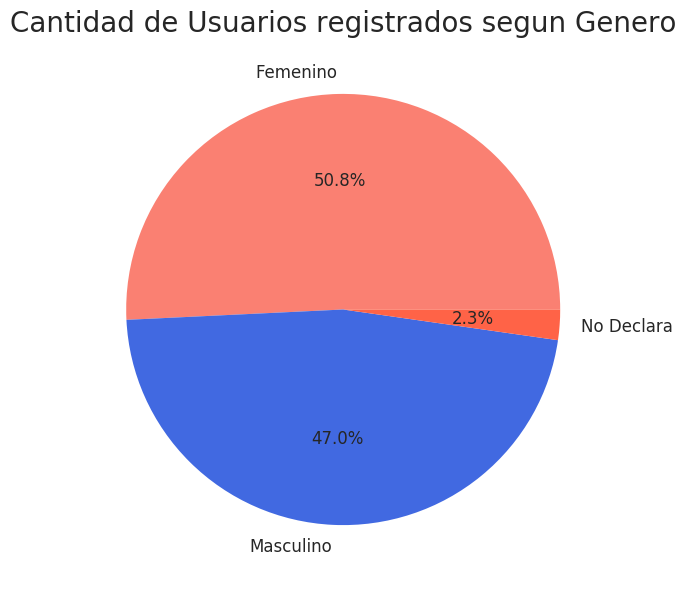

In [29]:
generos = ['Femenino', 'Masculino','No Declara']
grafico_genero_usuarios=genero_usuarios.plot(kind='pie',labels=generos,figsize=(7,7),fontsize=12,colors=['salmon','royalblue','tomato'],autopct='%1.1f%%')
grafico_genero_usuarios.set_title("Cantidad de Usuarios registrados segun Genero",fontsize=20)
grafico_genero_usuarios.set_ylabel("")

Como se puede observar en el gráfico, podemos ver que hay mayor cantidad de usuarios registrados de género Femenino y la diferencia entre los dos géneros principales no varía mucho

### 7.2) Cantidad de Postulaciones según el Género

In [12]:
postulaciones_genero=pd.merge(postulaciones,genero_edad,on='idpostulante',how='inner')
cantidad_postulaciones_genero=postulaciones_genero['Sexo'].value_counts()
cantidad_postulaciones_genero.rename(index={'FEM':'Femenino','MASC':'Masculino','NO_DECLARA':'No Declara'},inplace=True)
cantidad_postulaciones_genero

Femenino      1688939
Masculino     1668601
No Declara      44083
Name: Sexo, dtype: int64

Text(0,0.5,'Cantidad de Postulaciones')

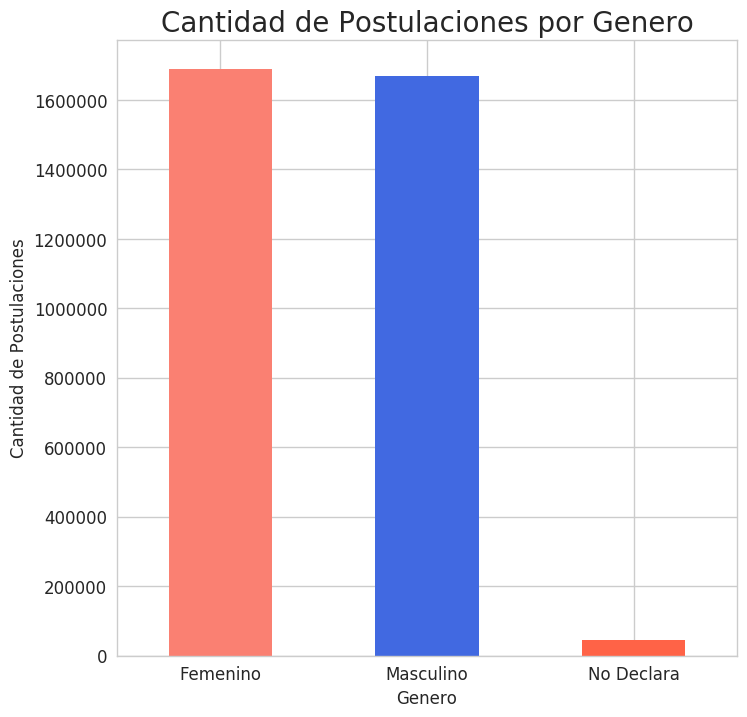

In [41]:
pivot_cantidad_postulaciones_genero=cantidad_postulaciones_genero.plot(kind='bar',figsize=(8,8),color=['salmon','royalblue','tomato'],fontsize=12,rot=0)
pivot_cantidad_postulaciones_genero.set_title("Cantidad de Postulaciones por Genero",fontsize=20)
pivot_cantidad_postulaciones_genero.set_xlabel("Genero",fontsize=12)
pivot_cantidad_postulaciones_genero.set_ylabel("Cantidad de Postulaciones",fontsize=12)

La tendencia vista en los usuarios registrados sigue sucediendo en las postulaciones, sigue liderando el género Femenino con relación al Masculino y, así mismo podríamos decir que la diferencia sigue siendo muy parecida a la vista anteriormente. 

### 7.3) Edad General de Todas Postulaciones

In [14]:
postulaciones_edad_filtado=postulaciones_genero[(postulaciones_genero['Edad']>=18) & (postulaciones_genero['Edad']<=66)]
group_postulaciones_edad_filtado=postulaciones_edad_filtado.groupby(['Sexo']).agg({'Edad':'mean'})
group_postulaciones_edad_filtado.rename(index={'FEM':'Femenino','MASC':'Masculino','NO_DECLARA':'No Declara'},inplace=True)
group_postulaciones_edad_filtado

Edad
Sexo                 
Femenino    27.927732
Masculino   29.597194
No Declara  28.641900

Text(0,0.5,'Genero')

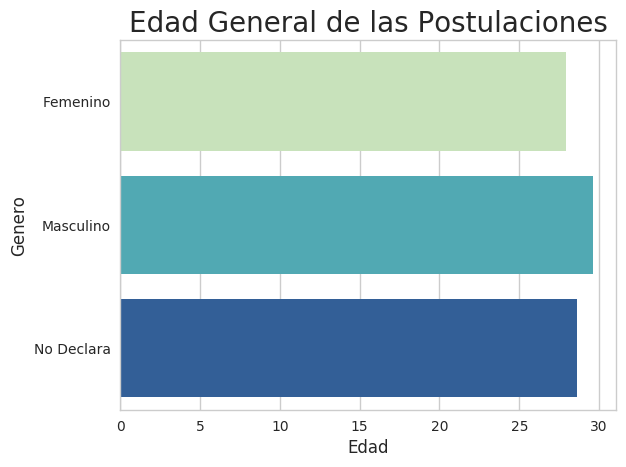

In [15]:
grafico_postulaciones_edad_filtado=sns.barplot(x=group_postulaciones_edad_filtado['Edad'],y=group_postulaciones_edad_filtado.index,palette="YlGnBu")
grafico_postulaciones_edad_filtado.set_title("Edad General de las Postulaciones",fontsize=20)
grafico_postulaciones_edad_filtado.set_xlabel("Edad",fontsize=12)
grafico_postulaciones_edad_filtado.set_ylabel("Genero",fontsize=12)

A raíz de esta figura se puede deducir que el menor promedio de edad lo tiene el género Femenino,luego los que No Declaran y el de mayor promedio es el Masculino.Los promedios vistos, a nuestro criterio, no generan ningún tipo de duda en lo que concierne a los géneros principales.

### 7.4) Edades por Género

### 7.4.A) Femenino

In [16]:
edad_fem=edad[(edad['Sexo']=='FEM')]
edad_masc=edad[(edad['Sexo']=='MASC')]
cantidad_edad_fem=edad_fem['Edad'].value_counts().sort_index()
cantidad_edad_masc=edad_masc['Edad'].value_counts().sort_index()

Text(0,0.5,'Cantidad de Usuarios')

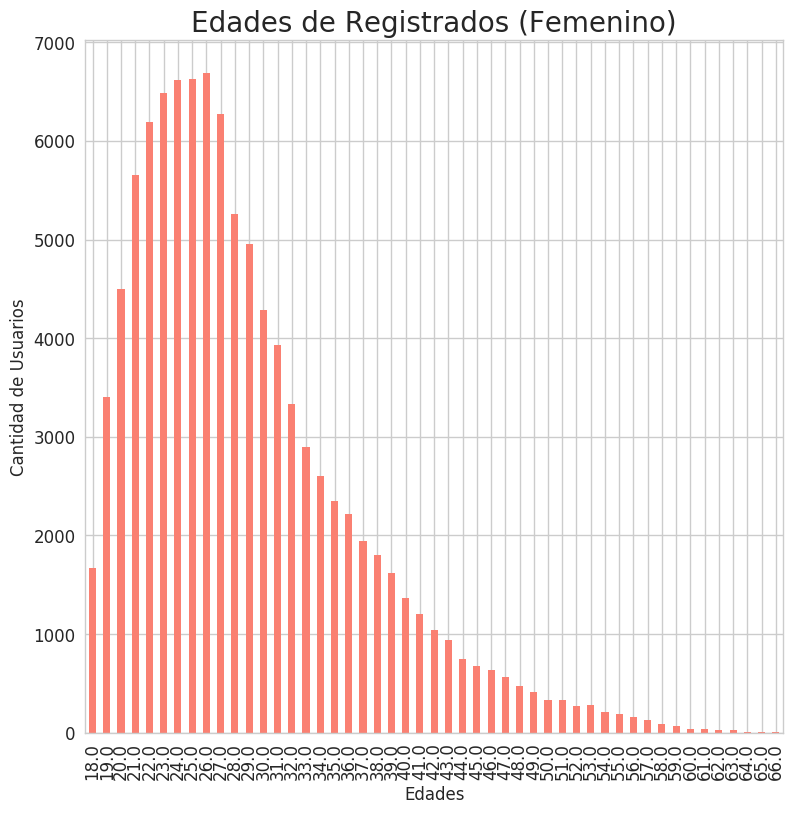

In [17]:
grafico_cantidad_edad_fem=cantidad_edad_fem.plot(kind='bar',figsize=(9,9),fontsize=12,color='salmon')
grafico_cantidad_edad_fem.set_title("Edades de Registrados (Femenino)",fontsize=20)
grafico_cantidad_edad_fem.set_xlabel("Edades",fontsize=12)
grafico_cantidad_edad_fem.set_ylabel("Cantidad de Usuarios",fontsize=12)

Podemos ver que lo visto en este gráfico tiene sentido,porque si se lo compara con el gráfico anterior,la mayor cantidad de edad usuarios tienen entre 22 y 27 años, superando los 6.000 usuarios con un pico de usuarios a los 26 años, luego comienza a decrecer de manera gradual, observándose que luego de los 54 años, decrece de una manera importante.

### 7.4.B) Masculino

Text(0,0.5,'Cantidad de Usuarios')

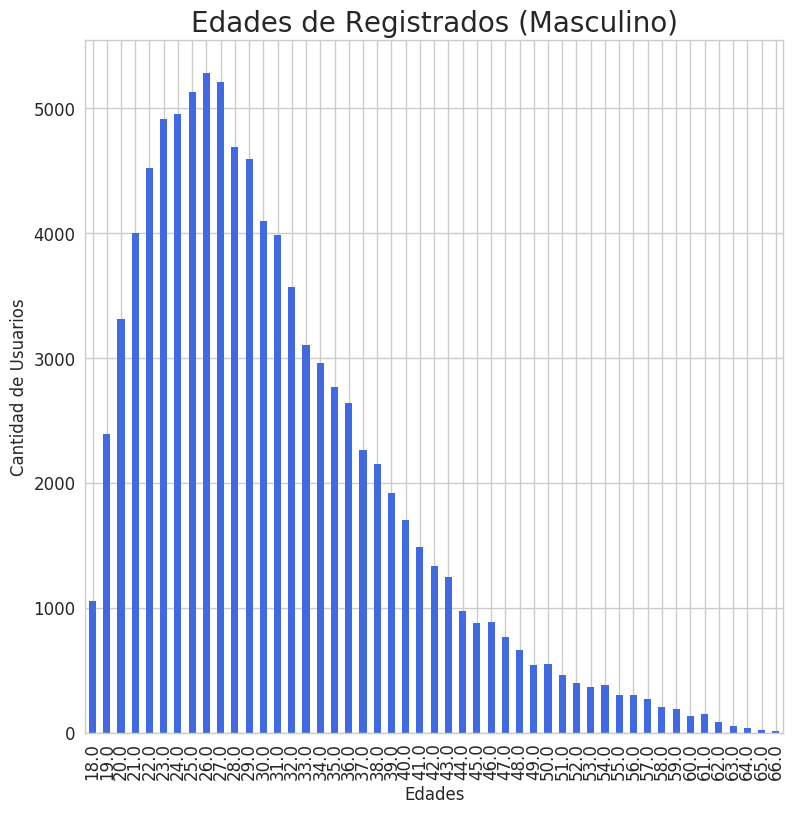

In [18]:
grafico_cantidad_edad_masc=cantidad_edad_masc.plot(kind='bar',figsize=(9,9),fontsize=12,color='royalblue')
grafico_cantidad_edad_masc.set_title("Edades de Registrados (Masculino)",fontsize=20)
grafico_cantidad_edad_masc.set_xlabel("Edades",fontsize=12)
grafico_cantidad_edad_masc.set_ylabel("Cantidad de Usuarios",fontsize=12)

El pico de edades en este caso es de 26 años, aunque desde los 25 hasta los 27 años se supera la cantidad de 5.000 usuarios,aunque, lo más curioso es que en ambos casos los picos son a los 26 años.

### 7.5) Educación

In [27]:
educacion['Valor']=1
pivot_educacion=educacion.pivot_table(index='Nivel',columns='Estado',values='Valor',aggfunc='sum')
pivot_educacion

Estado             Abandonado  En Curso  Graduado
Nivel                                            
Doctorado                  15        94       105
Master                    144      1519      1935
Otro                      947      4919     18882
Posgrado                  317      2239      4831
Secundario               3156      3995    103105
Terciario/Técnico        5692     15032     27009
Universitario           14955     50733     38607

Text(70.7222,0.5,'Nivel')

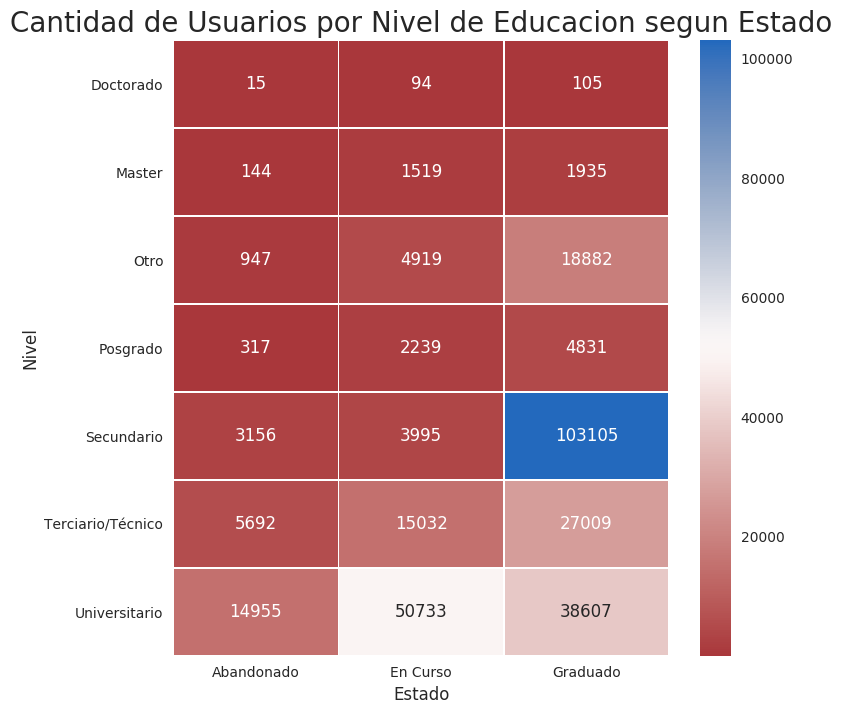

In [99]:
plt.subplots(figsize=(8,8))
grafico_pivot_educacion=sns.heatmap(pivot_educacion,linewidths=.5,fmt="d",annot=True,cmap="vlag_r")
grafico_pivot_educacion.set_title("Cantidad de Usuarios por Nivel de Educacion segun Estado",fontsize=20)
grafico_pivot_educacion.set_xlabel("Estado",fontsize=12)
grafico_pivot_educacion.set_ylabel("Nivel",fontsize=12)

La gran mayoria se encuenta graduado del Secundario y se encuentra cursando actualmente una carrer Universitaria

### 7.5.A) Según Género

### 7.5.A.1) Femenino

In [37]:
educacion_fem=pd.merge(educacion,edad_fem,on='idpostulante',how='inner')
educacion_masc=pd.merge(educacion,edad_masc,on='idpostulante',how='inner')
pivot_educacion_fem=educacion_fem.pivot_table(index='Nivel',columns='Estado',values='Valor',aggfunc='sum')
pivot_educacion_masc=educacion_masc.pivot_table(index='Nivel',columns='Estado',values='Valor',aggfunc='sum')
pivot_educacion_fem

Estado             Abandonado  En Curso  Graduado
Nivel                                            
Doctorado                   6        48        52
Master                     53       639       716
Otro                      464      3234     10551
Posgrado                  164      1187      2175
Secundario                839      1594     51453
Terciario/Técnico        3246      9218     14517
Universitario            7731     29118     19619

Text(70.7222,0.5,'Nivel')

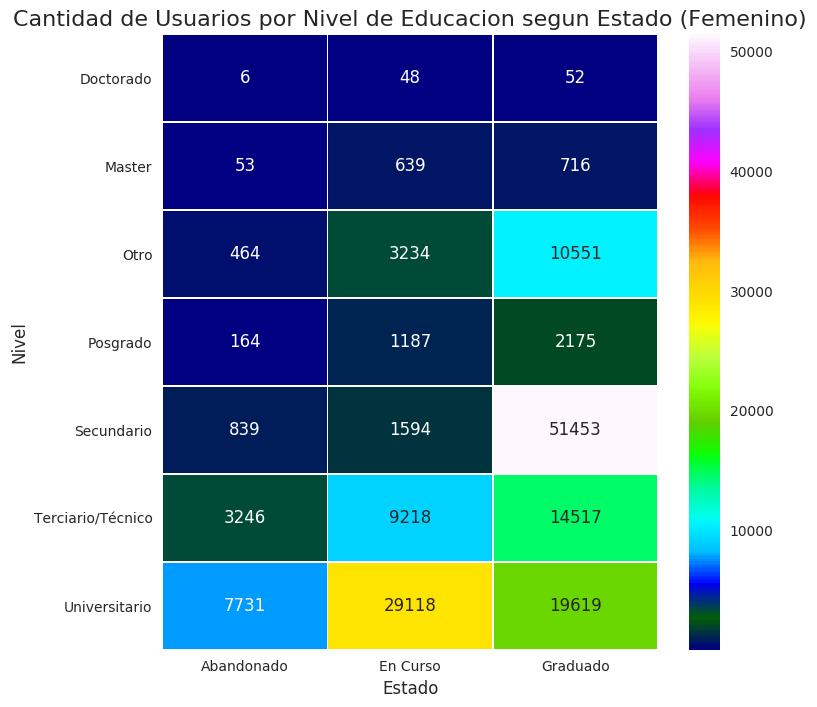

In [100]:
plt.subplots(figsize=(8,8))
grafico_pivot_educacion_fem=sns.heatmap(pivot_educacion_fem,linewidths=.5,fmt="d",annot=True,cmap="gist_ncar")
grafico_pivot_educacion_fem.set_title("Cantidad de Usuarios por Nivel de Educacion segun Estado (Femenino)",fontsize=16)
grafico_pivot_educacion_fem.set_xlabel("Estado",fontsize=12)
grafico_pivot_educacion_fem.set_ylabel("Nivel",fontsize=12)

Sigue con las tendencias vistas en el gráfico general

### 7.5.A.2) Masculino

In [75]:
pivot_educacion_masc

Estado             Abandonado  En Curso  Graduado
Nivel                                            
Doctorado                   9        43        52
Master                     90       870      1190
Otro                      477      1650      8189
Posgrado                  151      1037      2605
Secundario               2231      2283     49937
Terciario/Técnico        2382      5630     12156
Universitario            7045     20841     18520

Text(70.7222,0.5,'Nivel')

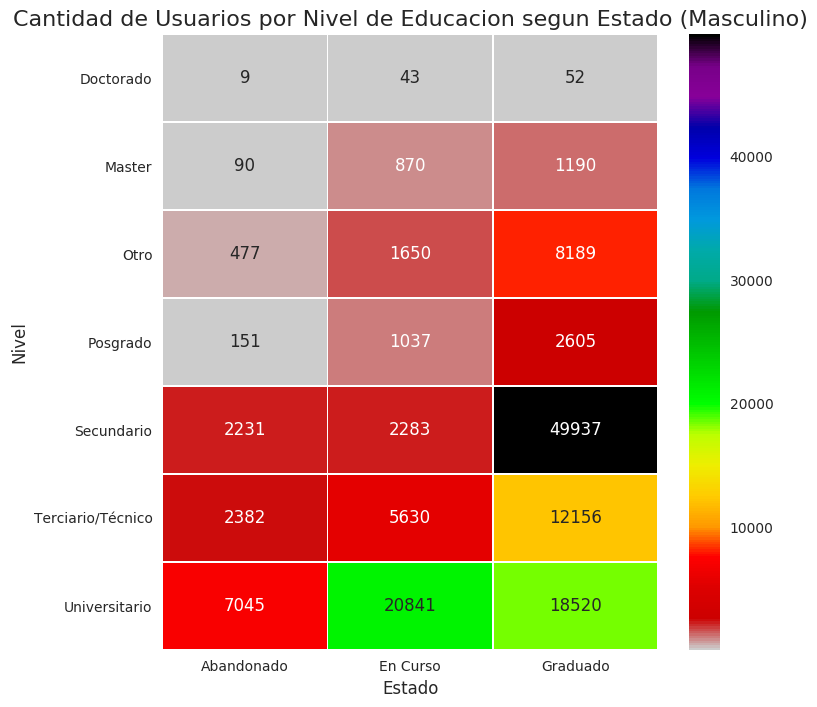

In [38]:
plt.subplots(figsize=(8,8))
grafico_pivot_educacion_masc=sns.heatmap(pivot_educacion_masc,linewidths=.5,fmt="d",annot=True,cmap="nipy_spectral_r")
grafico_pivot_educacion_masc.set_title("Cantidad de Usuarios por Nivel de Educacion segun Estado (Masculino)",fontsize=16)
grafico_pivot_educacion_masc.set_xlabel("Estado",fontsize=12)
grafico_pivot_educacion_masc.set_ylabel("Nivel",fontsize=12)

Sigue con las tendencias vistas en el gráfico general

### 7.6) Educación según Edad

In [19]:
educacion_edad=pd.merge(educacion,edad,on='idpostulante',how='inner')
pivot_educacion_edad=educacion_edad.pivot_table(index='Sexo',columns='Estado',values='Edad',aggfunc='mean')
pivot_educacion_edad.rename(index={'FEM':'Femenino','MASC':'Masculino'},inplace=True)
pivot_educacion_edad

Estado     Abandonado   En Curso   Graduado
Sexo                                       
Femenino    31.463163  26.624142  29.147720
Masculino   33.561763  27.962792  31.152355

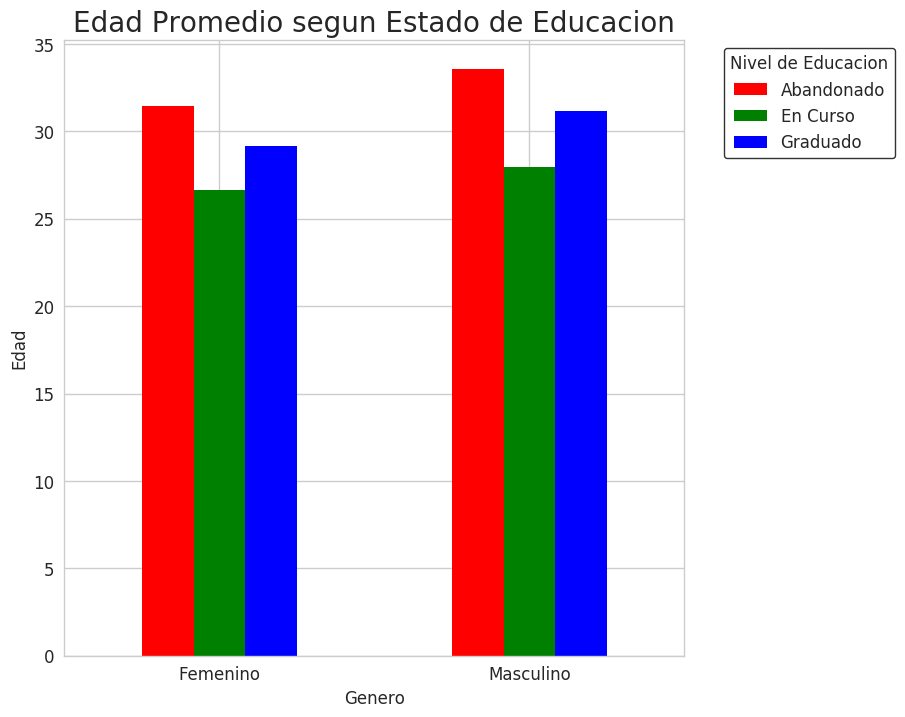

In [20]:
grafico_pivot_educacion_edad=pivot_educacion_edad.plot(kind='bar',figsize=(8,8),fontsize=12,color=['red','green','blue'],rot=0)
grafico_pivot_educacion_edad.set_title("Edad Promedio segun Estado de Educacion",fontsize=20)
grafico_pivot_educacion_edad.set_xlabel("Genero",fontsize=12)
grafico_pivot_educacion_edad.set_ylabel("Edad",fontsize=12)
leyenda=plt.legend(["Abandonado","En Curso","Graduado"],fontsize=12,title='Nivel de Educacion',frameon=True,facecolor='white',edgecolor='black',bbox_to_anchor=(1.05, 1))
leyenda.get_frame().set_linewidth(1.0)

Podemos ver que en el género Masculino la edad promedio es mayor a la del Femenino en todos los niveles pero creemos que la mayor diferencia se encuentra en que hay una mayor diferencia entre la edad de Cursando y Graduado en el género Masculino que en el femenino. 

### 7.7) Cantidad de Usuarios por Educación según Genero

### 7.7.A) Graduados

In [94]:
genero_filtrado=genero[(genero['Sexo'] != 'NO_DECLARA')]
educacion_genero=pd.merge(educacion,genero_filtrado,on='idpostulante',how='inner')
educacion_genero_graduado=educacion_genero[(educacion_genero['Estado']=='Graduado')]
educacion_genero_cursando=educacion_genero[(educacion_genero['Estado']=='En Curso')]
pivot_educacion_genero_graduado=educacion_genero_graduado.pivot_table(index='Nivel',columns='Sexo',values='idpostulante',aggfunc='count')
pivot_educacion_genero_cursando=educacion_genero_cursando.pivot_table(index='Nivel',columns='Sexo',values='idpostulante',aggfunc='count')
pivot_educacion_genero_graduado

Sexo                 FEM   MASC
Nivel                          
Doctorado             52     53
Master               718   1197
Otro               10566   8199
Posgrado            2178   2618
Secundario         51605  50114
Terciario/Técnico  14543  12200
Universitario      19653  18574

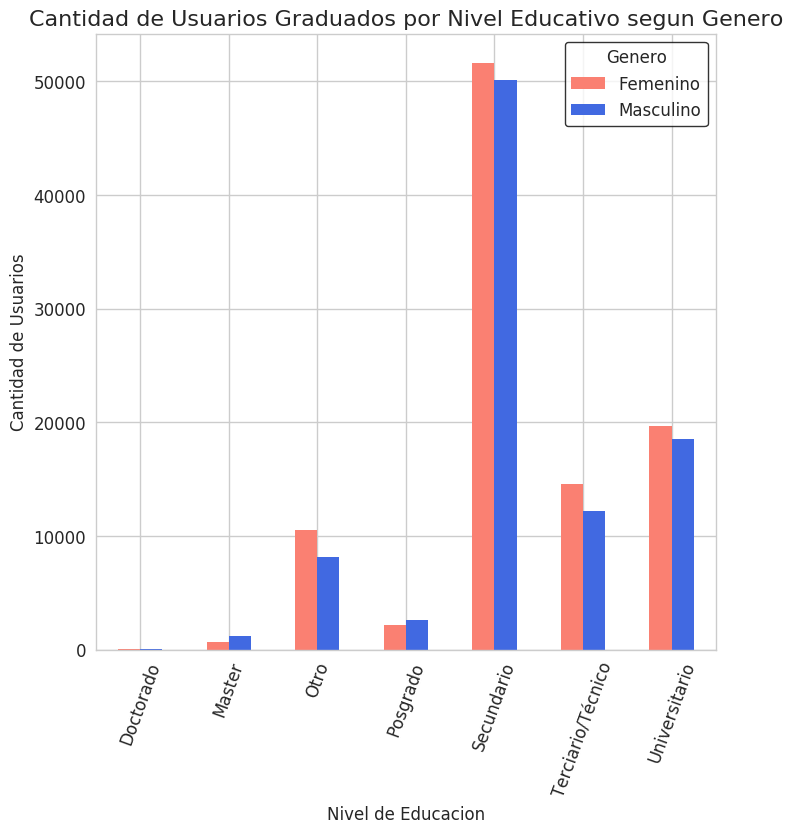

In [96]:
grafico_pivot_educacion_genero_graduado=pivot_educacion_genero_graduado.plot(kind='bar',figsize=(8,8),fontsize=12,color=['salmon','royalblue'],rot=70)
grafico_pivot_educacion_genero_graduado.set_title("Cantidad de Usuarios Graduados por Nivel Educativo segun Genero",fontsize=16)
grafico_pivot_educacion_genero_graduado.set_xlabel("Nivel de Educacion",fontsize=12)
grafico_pivot_educacion_genero_graduado.set_ylabel("Cantidad de Usuarios",fontsize=12)
leyenda=plt.legend(['Femenino','Masculino'],fontsize=12,title='Genero',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

Se puede ver que en ambos géneros se repite la misma tendencia, osea, los mismos Niveles son los que tienen más cantidad de Graduados y a medida que decrece se mantienen los mismo niveles. 

### 7.7.B) En Curso

In [97]:
pivot_educacion_genero_cursando

Sexo                 FEM   MASC
Nivel                          
Doctorado             48     43
Master               640    870
Otro                3240   1654
Posgrado            1190   1039
Secundario          1601   2300
Terciario/Técnico   9230   5644
Universitario      29175  20889

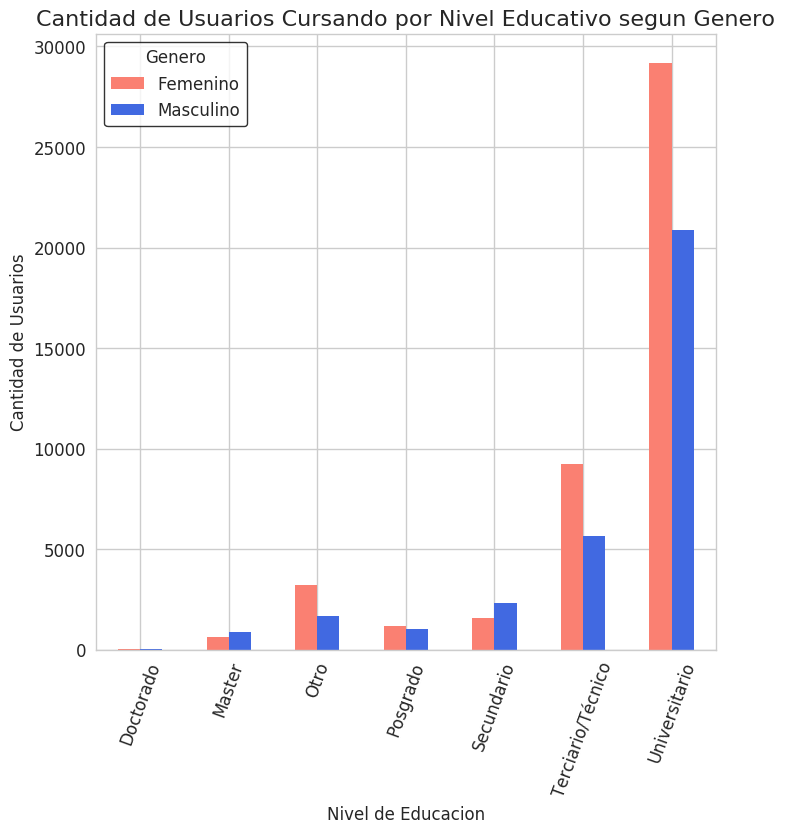

In [98]:
grafico_pivot_educacion_genero_cursando=pivot_educacion_genero_cursando.plot(kind='bar',figsize=(8,8),fontsize=12,color=['salmon','royalblue'],rot=70)
grafico_pivot_educacion_genero_cursando.set_title("Cantidad de Usuarios Cursando por Nivel Educativo segun Genero",fontsize=16)
grafico_pivot_educacion_genero_cursando.set_xlabel("Nivel de Educacion",fontsize=12)
grafico_pivot_educacion_genero_cursando.set_ylabel("Cantidad de Usuarios",fontsize=12)
leyenda=plt.legend(['Femenino','Masculino'],fontsize=12,title='Genero',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

En esta figura se pueden notar que hay diferencias entre los géneros, si bien al principio, en ambos géneros la mayor cantidad de Usuarios se encuentra en el nivel Universitario, luego sigue el Terciario/Técnico y después se produce el cambio, mientras que en el género Femenino sigue por el nivel Otro, en el Masculino sigue por el Secundario

### 7.8) Conclusión General

En el apartado anterior se pudo observar que hay mayor cantidad de mujeres que de hombres registrados y tambien
más postulaciones del mismo. También pudimos ver que el menor promedio de edad lo tiene el género femenino. Luego analizamos el nivel de educación, ya sea general o por género, y se llegó a las mismas conclusiones, la gran mayoría se encuentra graduado en el nivel Secundario y actualmente se encuentran Cursando una carrera Universitaria. Otra cosa que pudimos observar es que el mayor promedio de edad en cuanto al estado de educación, en ambos géneros, es el de Abandono, mientras que en de menor promedio es en el estado Cursando, el graduado se mantiene entre medio de los otros dos estados.